# **Algorhythm**

## **Exploratory Data Analysis (EDA)**

This notebook is dedicated to a thorough exploratory data analysis (EDA) of the **_Algorhythm_** dataset. The aim is to reveal underlying patterns, distributions, and relationships within the data, as well as to identify outliers, anomalies, or biases. These insights will inform data preprocessing, feature engineering, and the development of robust music recommendation models.

The results of this analysis will be essential for optimizing subsequent modeling and ensuring the effectiveness of the recommendation system.

`Simón Correa Marín`  
`Luis Felipe Ospina Giraldo`


### **1. Import Libraries and Configurations**


In [108]:
import sys
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import pyarrow as pa
import matplotlib.pyplot as plt
import warnings

from sklearn.metrics import accuracy_score, classification_report

In [48]:
# ==== Clean Notebook Warnings & Display Settings ====
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Pandas display options (show more columns, nicer output)
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 3)
pd.set_option("display.float_format", "{:.2f}".format)

plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12

In [49]:
# print library version for reproducibility

print("Python version: ", sys.version)
print("Pandas version: ", pd.__version__)

Python version:  3.11.12 (main, Apr  9 2025, 03:49:53) [Clang 20.1.0 ]
Pandas version:  2.2.3


### **2. Load Data**


In [50]:
DATA_DIR = Path("../../data/02_intermediate")

# Load the Algorhythm dataset (parquet)
algorhythm_df = pd.read_parquet(DATA_DIR / "algorhythm_fixed.parquet")

### **3. Data Description**


In [51]:
ordinal_categorical_cols = [
    "chart_position"
]

# Nominal categorical columns
nominal_categorical_cols = [
    "album_name",
    "artist_genres",
    "artist_name",
    "gender",
    "location",
    "music_profile",
    "track_name",
    "chart_chart_name",
    "chart_genres",
    "chart_track_name"
]

# Ordinal and Nominal Categorical columns
categorical_cols = ordinal_categorical_cols + nominal_categorical_cols
algorhythm_df[categorical_cols] = algorhythm_df[categorical_cols].astype("category")


In [52]:
algorhythm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   age                 2332 non-null   float64 
 1   album_name          2332 non-null   category
 2   album_popularity    2332 non-null   float64 
 3   artist_genres       1118 non-null   category
 4   artist_name         2332 non-null   category
 5   artist_popularity   2332 non-null   float64 
 6   chart_chart_name    473 non-null    category
 7   chart_genres        387 non-null    category
 8   chart_track_name    473 non-null    category
 9   chart_popularity    473 non-null    float64 
 10  chart_position      473 non-null    category
 11  gender              2332 non-null   category
 12  is_liked            2805 non-null   bool    
 13  is_recent_play      2805 non-null   bool    
 14  is_top_track        2805 non-null   bool    
 15  location            2332 non-null   ca

In [53]:
algorhythm_df.shape

(2805, 25)

In [54]:
algorhythm_df.sample(3)

age album_name  album_popularity  \
128 21.00     CINEMA              0.00   
524 21.00   Monolith              0.00   
235 21.00       CRUZ              0.00   

                                         artist_genres  artist_name  \
128                                        bedroom pop   The Marías   
524  darkwave, post-punk, cold wave, gothic rock, d...  Twin Tribes   
235                                     argentine trap       Trueno   

     artist_popularity chart_chart_name chart_genres chart_track_name  \
128              86.00              NaN          NaN              NaN   
524              55.00              NaN          NaN              NaN   
235              78.00              NaN          NaN              NaN   

     chart_popularity chart_position gender  is_liked  is_recent_play  \
128               NaN            NaN   male     False            True   
524               NaN            NaN   male      True           False   
235               NaN            NaN   male      True           False   

     is_top_track  location  \
128         False  Colombia   
524         False  Colombia   
235         False  Colombia   

                                         music_profile  \
128  reggaeton, country, urbano latino, latin pop, ...   
524  reggaeton, country, urbano latino, latin pop, ...   
235  reggaeton, country, urbano latino, latin pop, ...   

                   track_name  track_popularity  album_age_days  \
128  All I Really Want Is You             68.00         1438.00   
524                  Monolith             63.00          577.00   
235                      CRUZ             75.00          123.00   

     chart_age_days  track_age_days  played_day_of_week  played_hour  \
128             NaN         1438.00                2.00         7.00   
524             NaN          577.00                2.00         7.00   
235             NaN          123.00                2.00         7.00   

     is_recommended  
128            True  
524            True  
235            True

In [55]:
# Number of missing values
algorhythm_df.isnull().sum()

age                    473
album_name             473
album_popularity       473
artist_genres         1687
artist_name            473
artist_popularity      473
chart_chart_name      2332
chart_genres          2418
chart_track_name      2332
chart_popularity      2332
chart_position        2332
gender                 473
is_liked                 0
is_recent_play           0
is_top_track             0
location               473
music_profile          473
track_name             473
track_popularity       473
album_age_days         504
chart_age_days        2332
track_age_days         504
played_day_of_week     473
played_hour            473
is_recommended           0
dtype: int64

**Target =** is_recommended


#### **Numerical Variables**


In [56]:
algorhythm_df.describe()

age  album_popularity  artist_popularity  chart_popularity  \
count 2332.00           2332.00            2332.00            473.00   
mean    21.00              1.78              80.76             64.59   
std      0.00             11.93              16.70             22.65   
min     21.00              0.00               0.00              0.00   
25%     21.00              0.00              77.00             59.00   
50%     21.00              0.00              86.00             70.00   
75%     21.00              0.00              91.00             80.00   
max     21.00             93.00             100.00             97.00   

       track_popularity  album_age_days  chart_age_days  track_age_days  \
count           2332.00         2301.00          473.00         2301.00   
mean              61.82         2477.79          465.22         2477.79   
std               24.70         1938.83          411.94         1938.83   
min                0.00           24.00            4.00           24.00   
25%               56.00         1407.00           44.00         1407.00   
50%               70.00         2166.00          388.00         2166.00   
75%               77.25         2986.00          743.00         2986.00   
max              100.00        23436.00         1539.00        23436.00   

       played_day_of_week  played_hour  
count             2332.00      2332.00  
mean                 2.00         7.00  
std                  0.00         0.00  
min                  2.00         7.00  
25%                  2.00         7.00  
50%                  2.00         7.00  
75%                  2.00         7.00  
max                  2.00         7.00

#### **Categorical Variables**


In [57]:
# categorical columns description
algorhythm_df.describe(include="category")

album_name artist_genres   artist_name chart_chart_name  \
count               2332          1118          2332              473   
unique              1326           171           608                3   
top     The Secret of Us           pop  Taylor Swift    Top 50 Global   
freq                  34           100           145              243   

       chart_genres chart_track_name  chart_position gender  location  \
count           387              473          473.00   2332      2332   
unique           65              440          243.00      1         1   
top         country          Hey Mor            1.00   male  Colombia   
freq             66                3            3.00   2332      2332   

                                            music_profile  track_name  
count                                                2332        2332  
unique                                                  1        1886  
top     reggaeton, country, urbano latino, latin pop, ...  WILDFLOWER  
freq                                                 2332          13

#### **Boolean Variables**


In [58]:
# boolean columns description
algorhythm_df.describe(include="boolean")

is_liked is_recent_play is_top_track is_recommended
count      2805           2805         2805           2805
unique        2              2            2              2
top        True          False        False           True
freq       2493           2132         2220           2332

### **4. Univariate Analysis**


#### **Target Variable**


<Axes: title={'center': 'Recommendation Distribution'}, xlabel='is_recommended'>

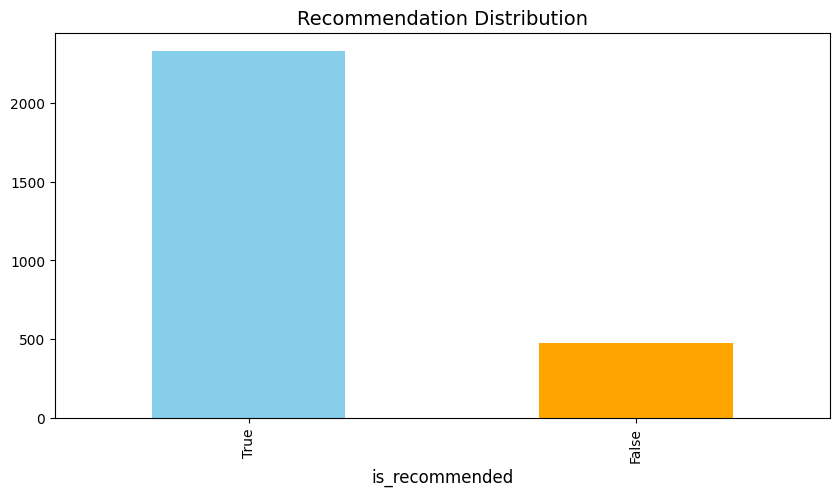

In [59]:
algorhythm_df["is_recommended"].value_counts().plot(
    kind="bar", color=["skyblue", "orange"], title="Recommendation Distribution"
)

#### **Numerical Variables**


In [60]:
# list of the numerical columns
numerical_columns = list(algorhythm_df.select_dtypes(include=["number"]).columns)
numerical_columns


['age',
 'album_popularity',
 'artist_popularity',
 'chart_popularity',
 'track_popularity',
 'album_age_days',
 'chart_age_days',
 'track_age_days',
 'played_day_of_week',
 'played_hour']

In [61]:
def univariate_analysis_num(column, hist_bins=20, discrete_threshold=15):
    """
    Plots univariate analysis for numerical columns.
    If the column is discrete (few unique values), it uses countplot/barplot.
    If the column is continuous, it uses a density plot.
    """
    import seaborn as sns

    col_data = algorhythm_df[column]
    num_unique = col_data.nunique(dropna=True)

    # Stats
    stats = col_data.describe().to_frame()
    unique_values = pd.DataFrame({"Unique Values": [num_unique]})
    missing_values = pd.DataFrame({"Missing Values": [col_data.isnull().sum()]})

    display(stats)
    display(unique_values)
    display(missing_values)

    # Detect discrete (few unique) or continuous
    is_discrete = (col_data.dtype.name in ['category', 'object', 'bool']) or (num_unique <= discrete_threshold)

    plt.figure(figsize=(14, 5))
    plt.suptitle(f"Univariate Analysis - {column}", fontsize=14, fontweight="bold")

    # Histogram
    plt.subplot(1, 3, 1)
    plt.hist(col_data.dropna(), bins=hist_bins, edgecolor="black")
    plt.title("Histogram")

    # Density or Barplot
    plt.subplot(1, 3, 2)
    if is_discrete:
        # For discrete/categorical data, use countplot/barplot
        if col_data.dtype.name == "category" or col_data.dtype.name == "object":
            value_counts = col_data.value_counts().sort_index()
        else:
            value_counts = col_data.value_counts().sort_index()
        value_counts.plot(kind="bar")
        plt.title("Bar Plot (Discrete)")
        plt.xlabel(column)
        plt.ylabel("Count")
    else:
        # For continuous data, use density plot
        col_data.plot(kind="density")
        plt.title("Density Plot")

    # Boxplot
    plt.subplot(1, 3, 3)
    col_data.plot(kind="box")
    plt.title("Boxplot")

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    return None

**age**


age
count 2332.00
mean    21.00
std      0.00
min     21.00
25%     21.00
50%     21.00
75%     21.00
max     21.00

Unique Values
0              1

Missing Values
0             473

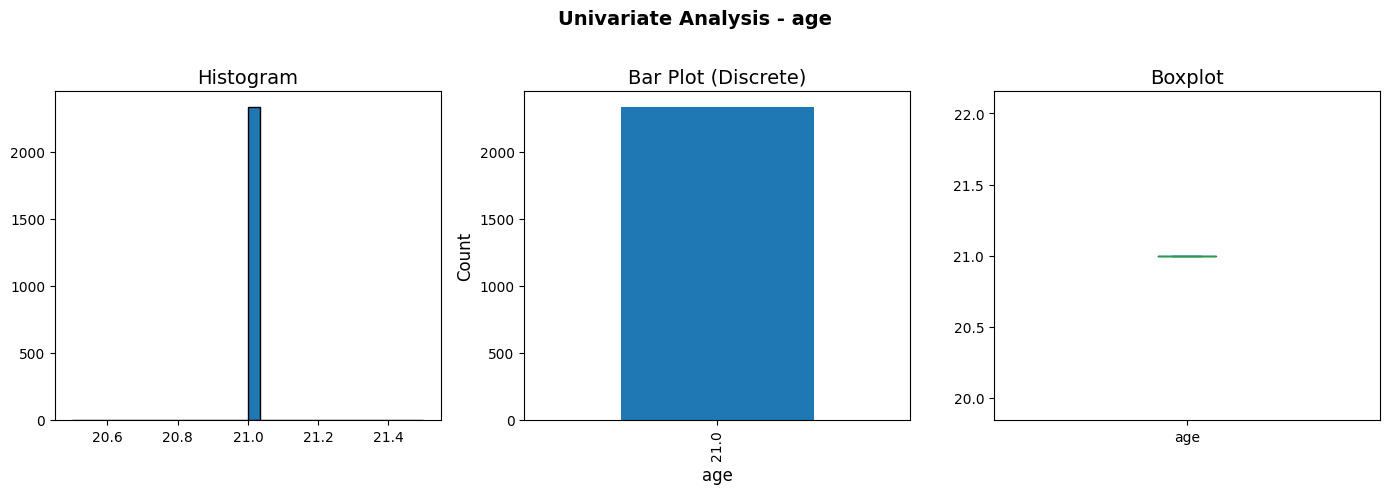

In [62]:
univariate_analysis_num("age", 30)

**album_popularity**


album_popularity
count           2332.00
mean               1.78
std               11.93
min                0.00
25%                0.00
50%                0.00
75%                0.00
max               93.00

Unique Values
0             14

Missing Values
0             473

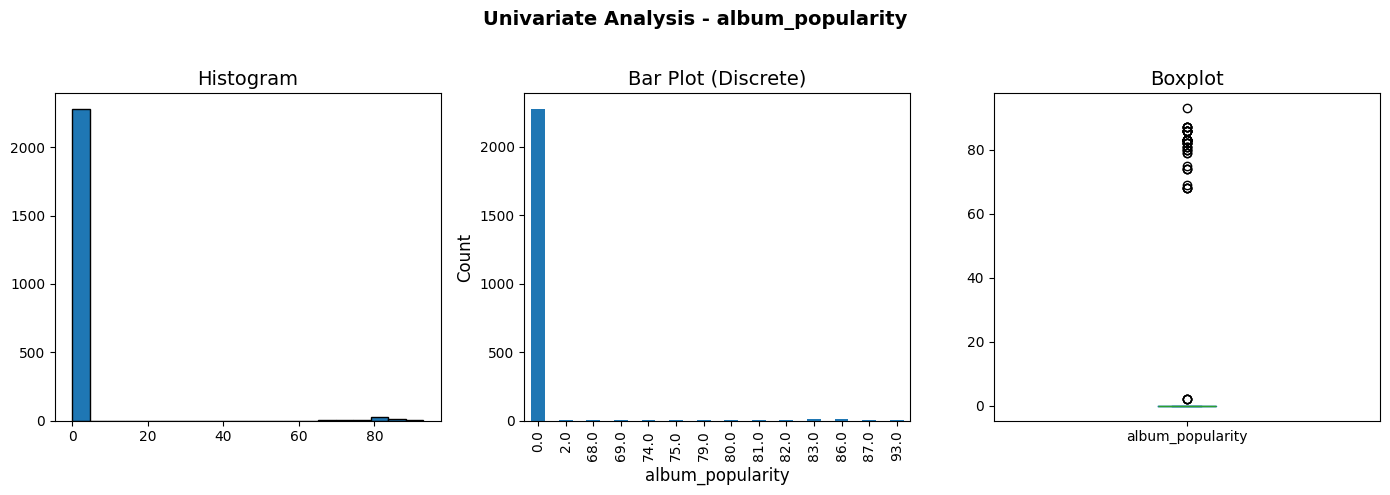

In [63]:
univariate_analysis_num("album_popularity", 20)

**artist_popularity**


artist_popularity
count            2332.00
mean               80.76
std                16.70
min                 0.00
25%                77.00
50%                86.00
75%                91.00
max               100.00

Unique Values
0             91

Missing Values
0             473

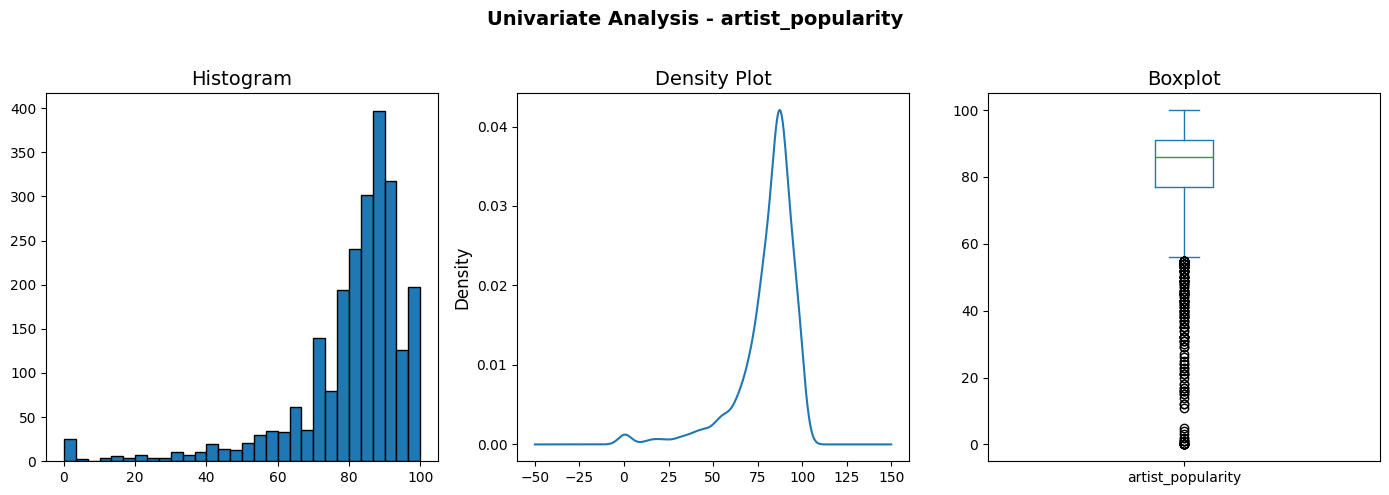

In [64]:
univariate_analysis_num("artist_popularity", 30)

**chart_popularity**


chart_popularity
count            473.00
mean              64.59
std               22.65
min                0.00
25%               59.00
50%               70.00
75%               80.00
max               97.00

Unique Values
0             83

Missing Values
0            2332

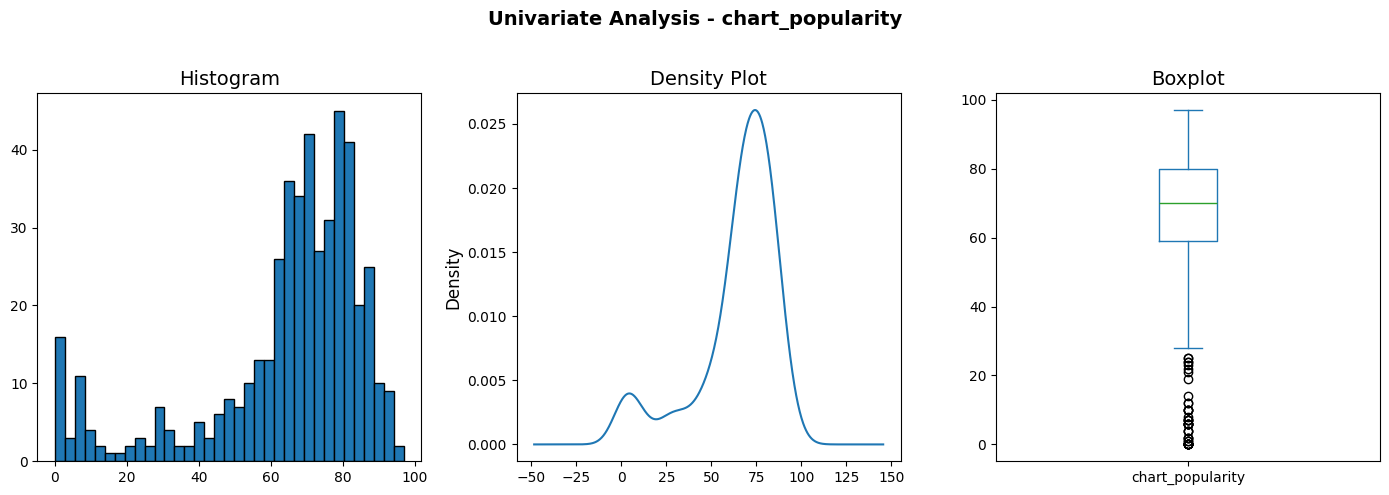

In [65]:
univariate_analysis_num("chart_popularity", 35)

**track_popularity**


track_popularity
count           2332.00
mean              61.82
std               24.70
min                0.00
25%               56.00
50%               70.00
75%               77.25
max              100.00

Unique Values
0             97

Missing Values
0             473

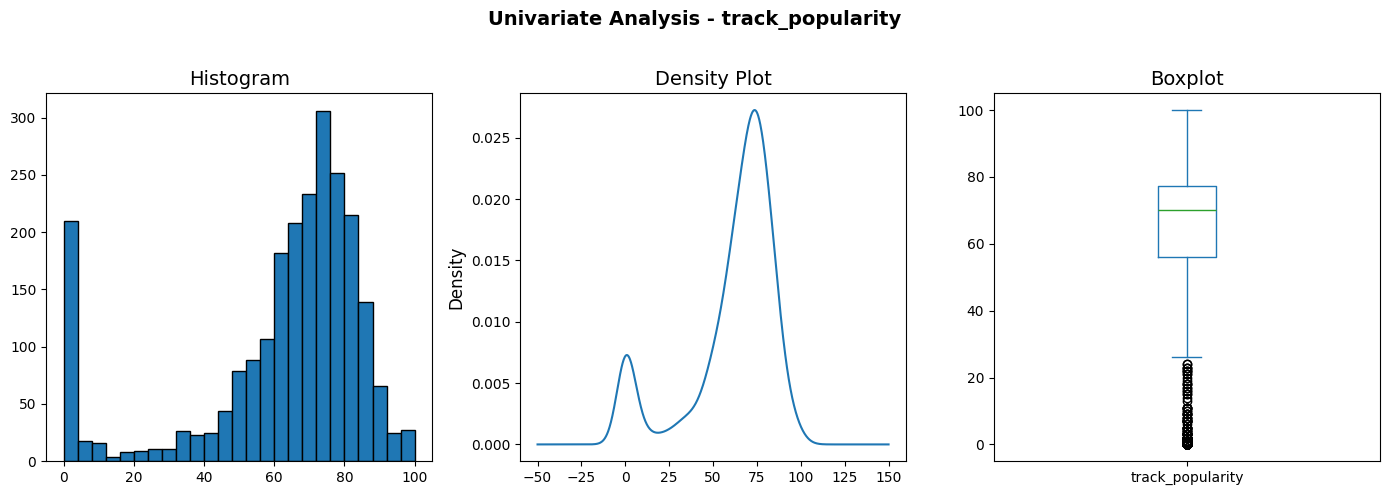

In [66]:
univariate_analysis_num("track_popularity", 25)

**album_age_days**


album_age_days
count         2301.00
mean          2477.79
std           1938.83
min             24.00
25%           1407.00
50%           2166.00
75%           2986.00
max          23436.00

Unique Values
0            875

Missing Values
0             504

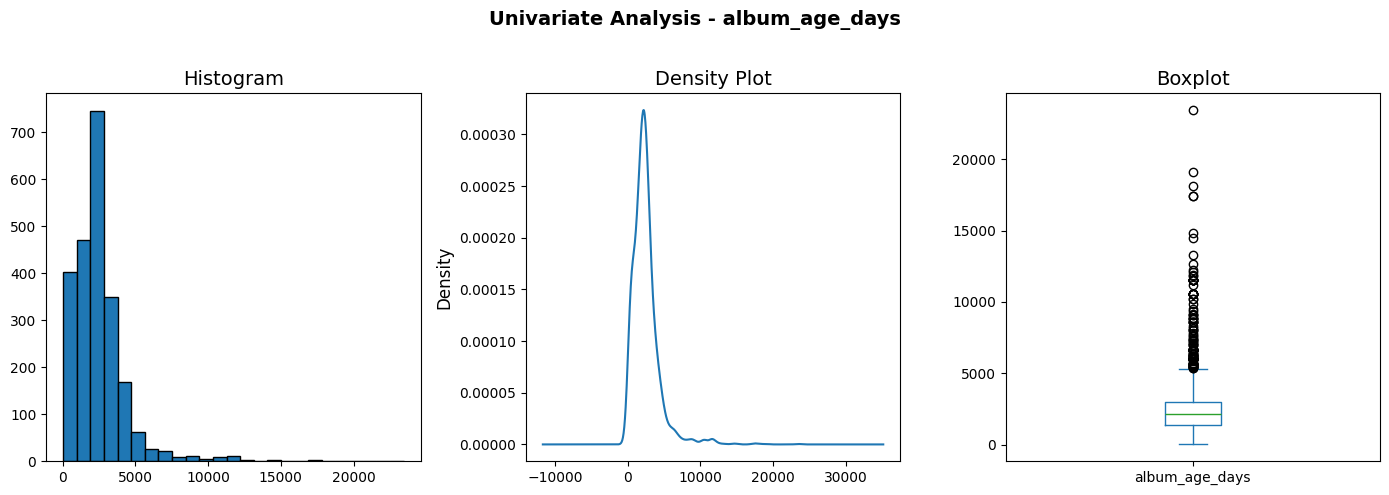

In [67]:
univariate_analysis_num("album_age_days", 25)

**chart_age_days**


chart_age_days
count          473.00
mean           465.22
std            411.94
min              4.00
25%             44.00
50%            388.00
75%            743.00
max           1539.00

Unique Values
0            120

Missing Values
0            2332

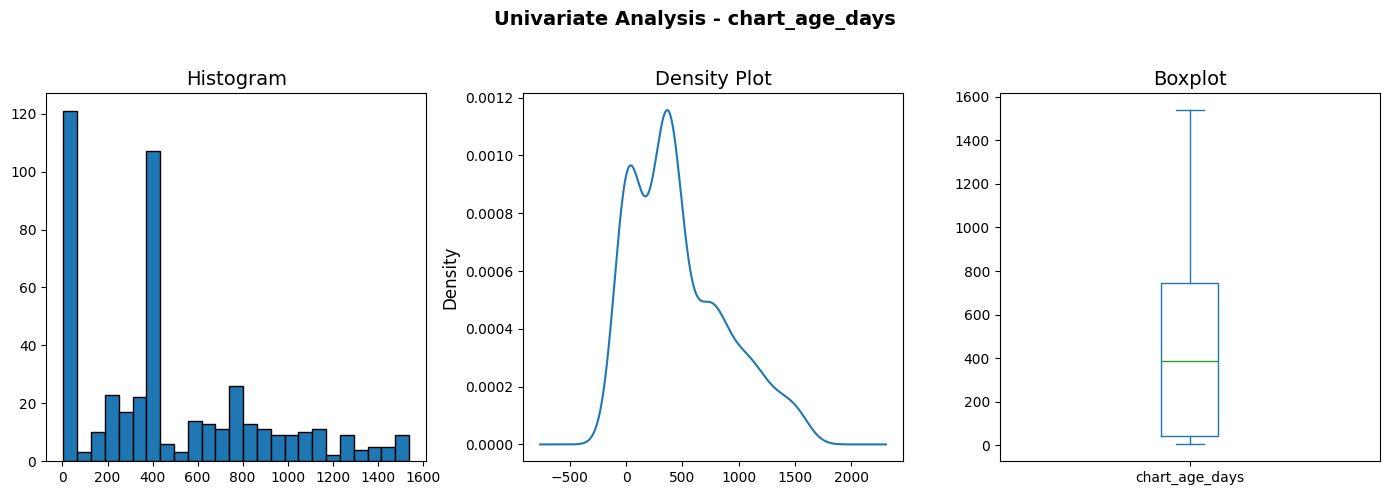

In [68]:
univariate_analysis_num("chart_age_days", 25)

**track_age_days**


track_age_days
count         2301.00
mean          2477.79
std           1938.83
min             24.00
25%           1407.00
50%           2166.00
75%           2986.00
max          23436.00

Unique Values
0            875

Missing Values
0             504

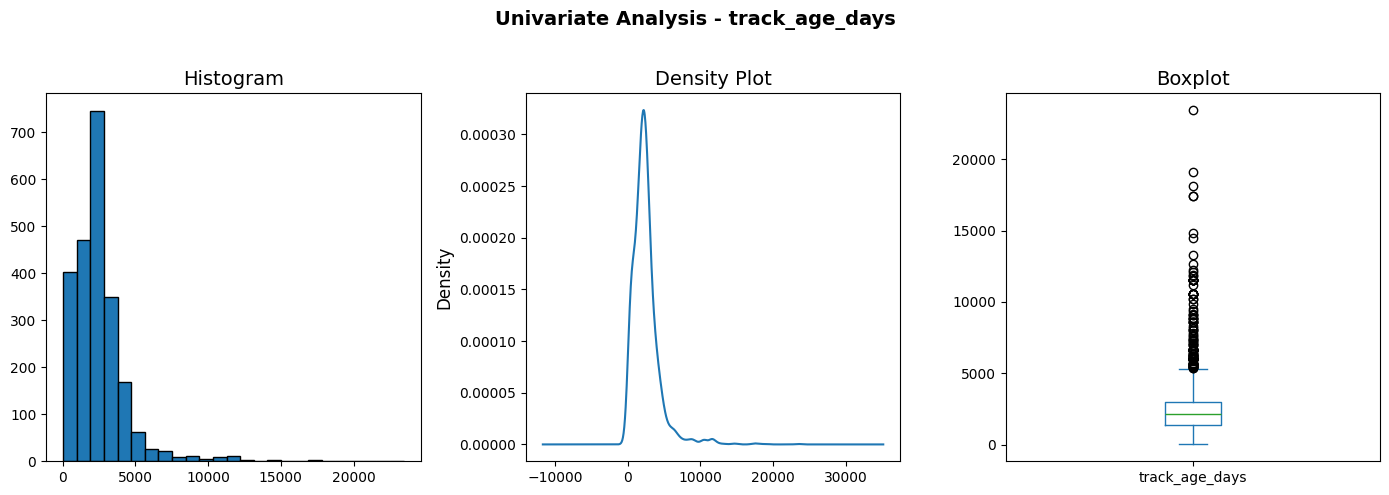

In [69]:
univariate_analysis_num("track_age_days", 25)

**played_day_of_week**


played_day_of_week
count             2332.00
mean                 2.00
std                  0.00
min                  2.00
25%                  2.00
50%                  2.00
75%                  2.00
max                  2.00

Unique Values
0              1

Missing Values
0             473

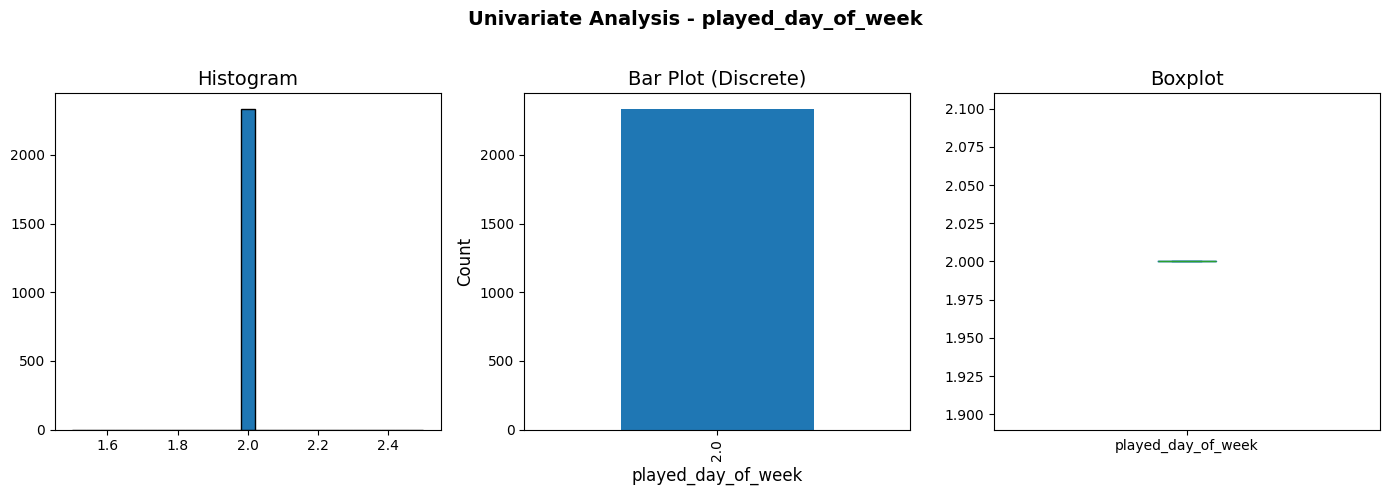

In [70]:
univariate_analysis_num("played_day_of_week", 25)

**played_hour**


played_hour
count      2332.00
mean          7.00
std           0.00
min           7.00
25%           7.00
50%           7.00
75%           7.00
max           7.00

Unique Values
0              1

Missing Values
0             473

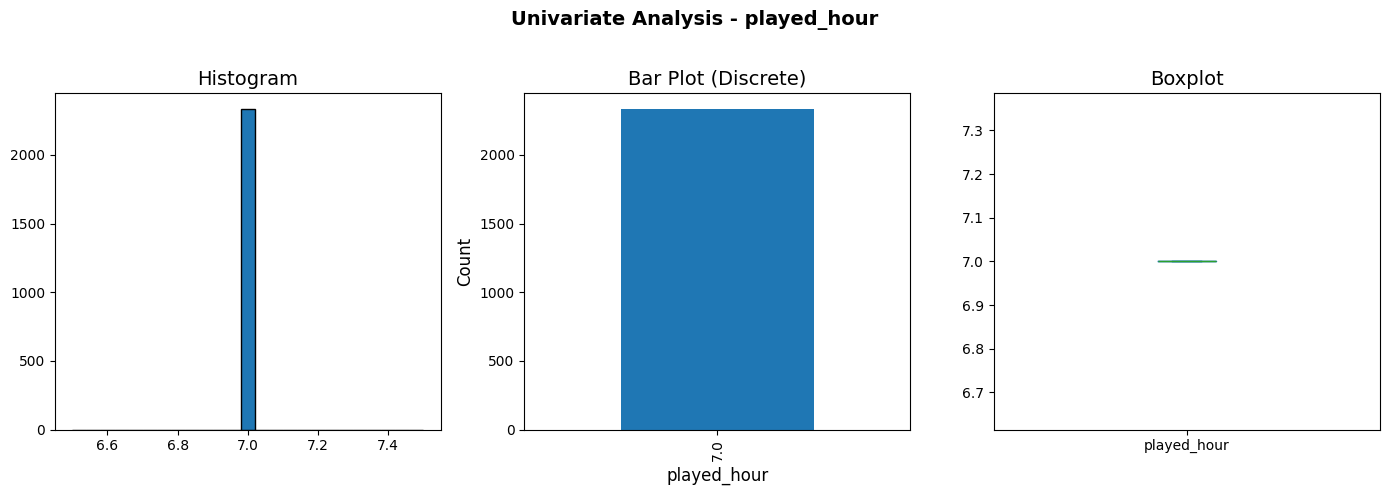

In [71]:
univariate_analysis_num("played_hour", 25)

#### **Categorical and Boolean Variables**


In [72]:
# list of the categorical columns
categorical_columns = list(algorhythm_df.select_dtypes(include=["category", "boolean"]).columns)
categorical_columns


['album_name',
 'artist_genres',
 'artist_name',
 'chart_chart_name',
 'chart_genres',
 'chart_track_name',
 'chart_position',
 'gender',
 'is_liked',
 'is_recent_play',
 'is_top_track',
 'location',
 'music_profile',
 'track_name',
 'is_recommended']

In [73]:
def univariate_analysis_cat(column):
    """
    Function to plot univariate analysis for categorical columns
    """

    # Statistics
    stats = algorhythm_df[column].describe().to_frame() # Convert stats to DataFrame
    unique_values = pd.DataFrame({"Unique Values": [algorhythm_df[column].nunique()]})
    missing_values = pd.DataFrame({"Missing Values": [algorhythm_df[column].isnull().sum()]})
    freq_table = algorhythm_df[column].value_counts().to_frame().reset_index()
    freq_table.columns = [column, "Count"]  # Rename columns for clarity

    # Display tables properly formatted
    display(stats)
    display(unique_values)
    display(missing_values)
    display(freq_table)

    # Title
    plt.suptitle(f"Univariate Analysis - {column}", fontsize=14, fontweight="bold")

    # Bar plot
    plt.bar(algorhythm_df[column].value_counts().index, algorhythm_df[column].value_counts().values, 
            color=["skyblue", "orange", "green"])
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.title("Value Counts")

    # Layout
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    return None


**chart_chart_name**


chart_chart_name
count               473
unique                3
top       Top 50 Global
freq                243

Unique Values
0              3

Missing Values
0            2332

chart_chart_name  Count
0     Top 50 Global    243
1  Today's Top Hits    130
2   Top 50 Colombia    100

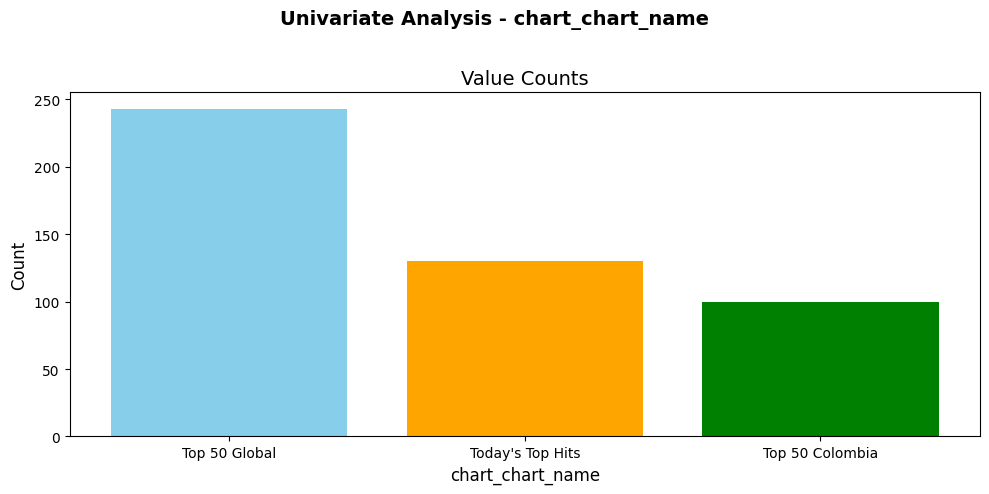

In [74]:
univariate_analysis_cat("chart_chart_name")

**is_liked**


is_liked
count      2805
unique        2
top        True
freq       2493

Unique Values
0              2

Missing Values
0               0

is_liked  Count
0      True   2493
1     False    312

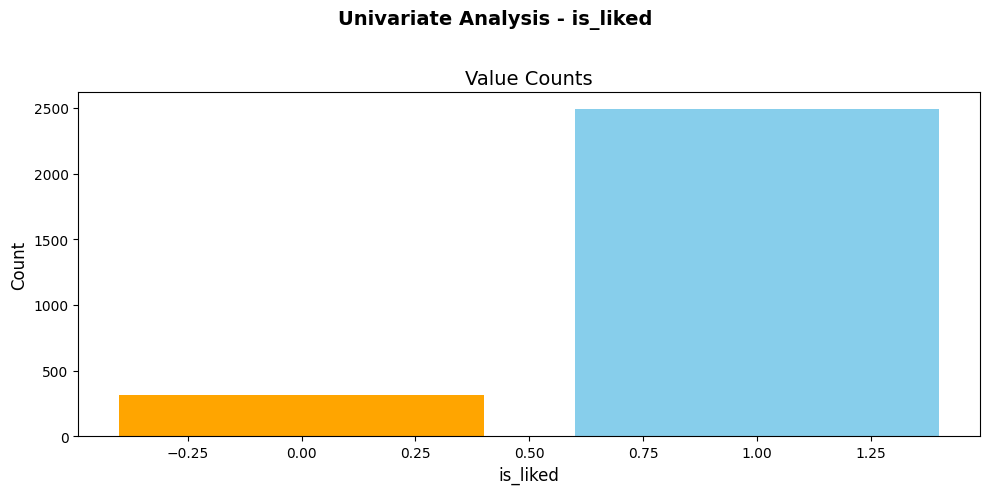

In [75]:
univariate_analysis_cat("is_liked")

**is_recent_play**


is_recent_play
count            2805
unique              2
top             False
freq             2132

Unique Values
0              2

Missing Values
0               0

is_recent_play  Count
0           False   2132
1            True    673

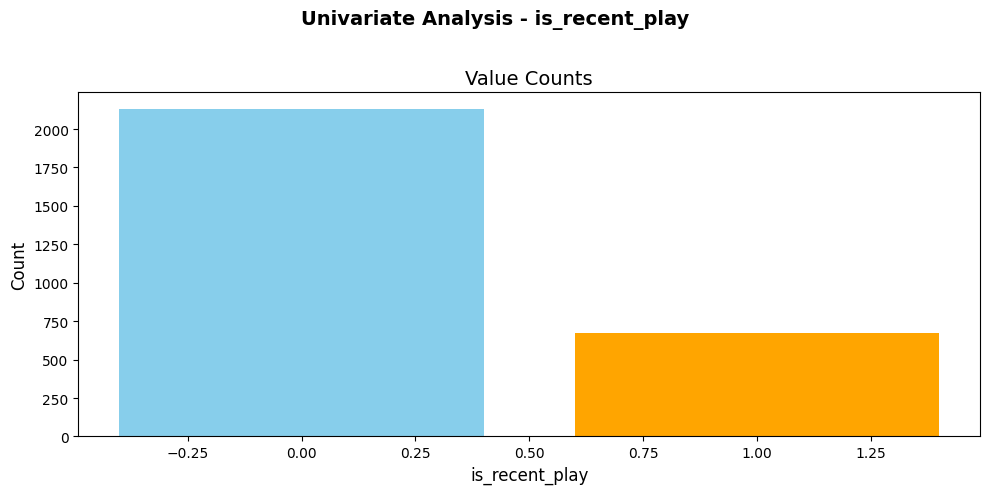

In [76]:
univariate_analysis_cat("is_recent_play")

**is_top_track**


is_top_track
count          2805
unique            2
top           False
freq           2220

Unique Values
0              2

Missing Values
0               0

is_top_track  Count
0         False   2220
1          True    585

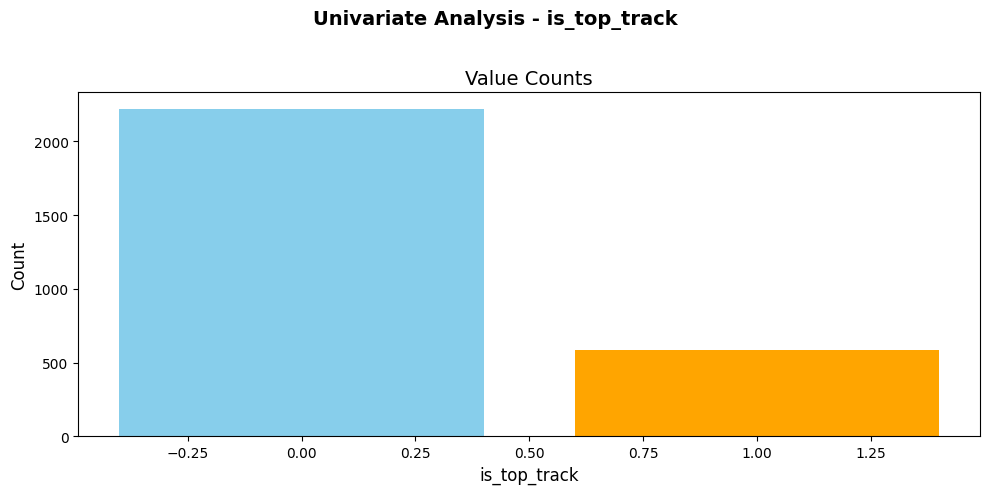

In [77]:
univariate_analysis_cat("is_top_track")

**is_recommended**


is_recommended
count            2805
unique              2
top              True
freq             2332

Unique Values
0              2

Missing Values
0               0

is_recommended  Count
0            True   2332
1           False    473

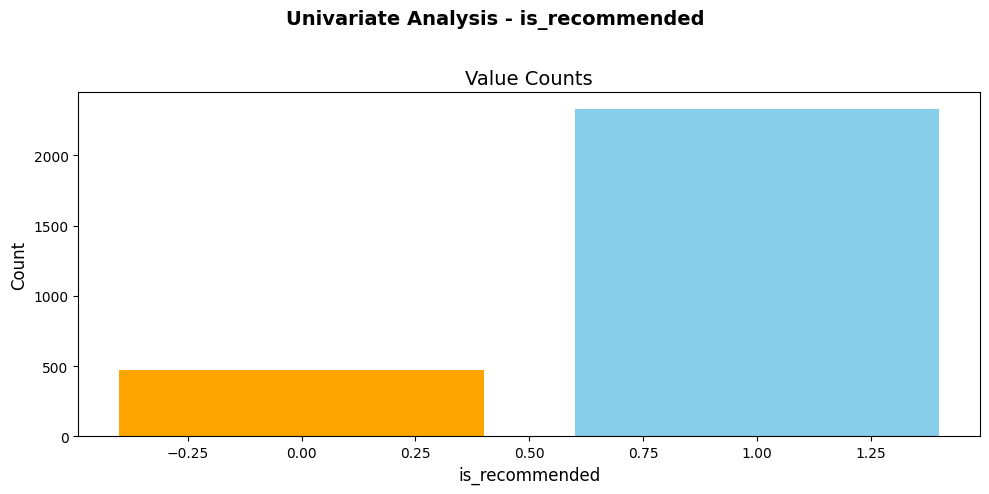

In [78]:
univariate_analysis_cat("is_recommended")

### **5. Bivariate Analysis**

Relationships between the target variables and the features.


#### **Target vs Numerical Variables**


In [81]:
def bivariate_analysis_num(column):
    """
    Function to plot bivariate analysis for numerical columns vs is_recommended.
    Handles warnings and degenerate cases.
    """

    # Replace infinite values with NaN to avoid plotting errors
    df_plot = algorhythm_df.replace([np.inf, -np.inf], np.nan)
    
    plt.figure(figsize=(13, 5))
    plt.suptitle(f"is_recommended vs {column}", fontsize=14, fontweight="bold")

    # Boxplot (shows distribution per recommendation class)
    plt.subplot(1, 3, 1)
    sns.boxplot(x="is_recommended", y=column, data=df_plot)
    plt.title("Boxplot")

    # Density plot (only plots if variance exists in the group)
    plt.subplot(1, 3, 2)
    plotted = 0
    for val, label in zip([1, 0], ["Is recommended", "Is not recommended"]):
        group = df_plot[df_plot["is_recommended"] == val][column].dropna()
        if group.nunique() > 1:
            sns.kdeplot(group, label=label, fill=True, warn_singular=False)
            plotted += 1
    plt.title("Density Plot")
    if plotted > 0:
        plt.legend(fontsize=8)

    # Histogram (only add kde if both groups have enough variance)
    plt.subplot(1, 3, 3)
    has_variance = all(
        df_plot[df_plot["is_recommended"] == val][column].dropna().nunique() > 1
        for val in [1, 0]
    )
    sns.histplot(
        df_plot, 
        x=column, 
        hue="is_recommended", 
        kde=has_variance,   # only plot kde if safe!
        bins=20
    )
    plt.title("Histogram")

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

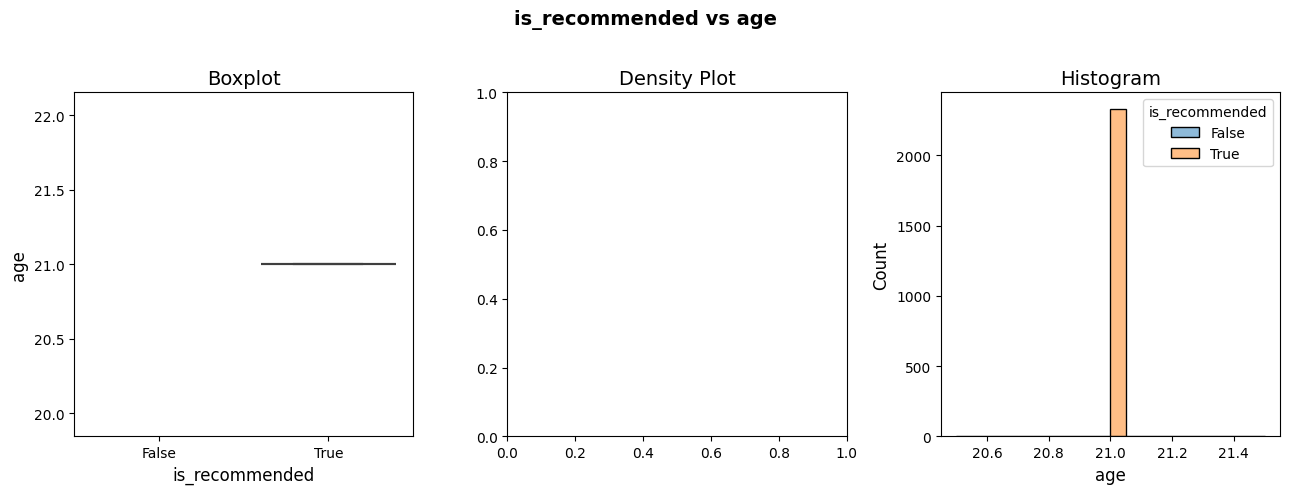

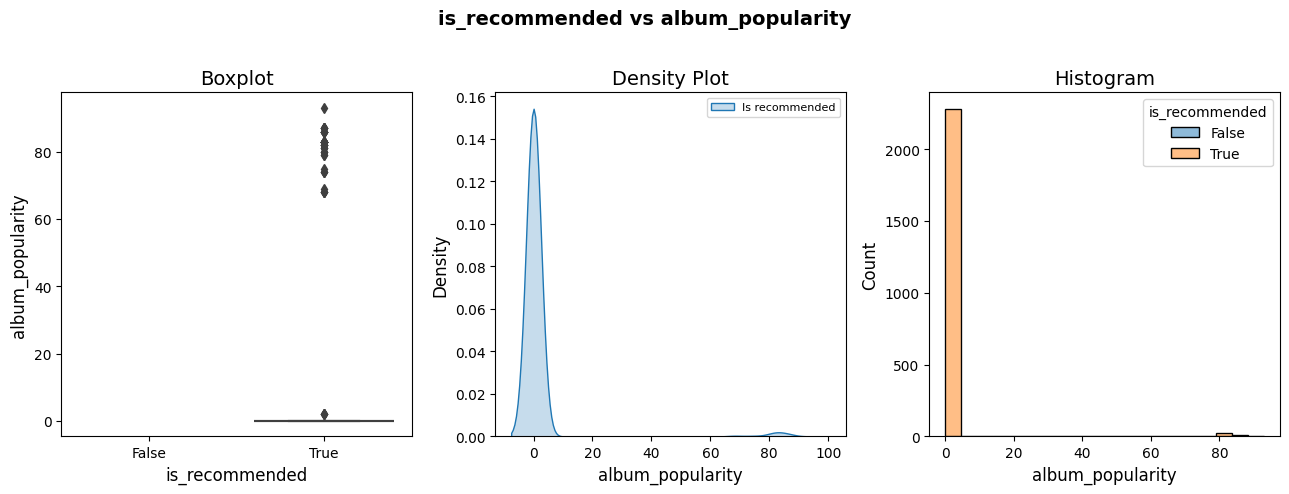

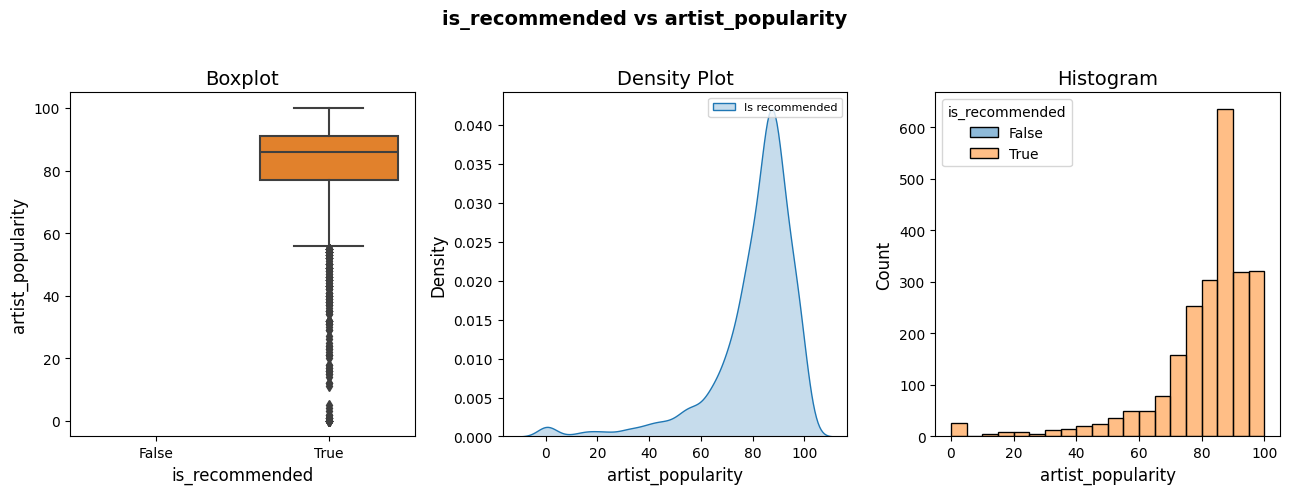

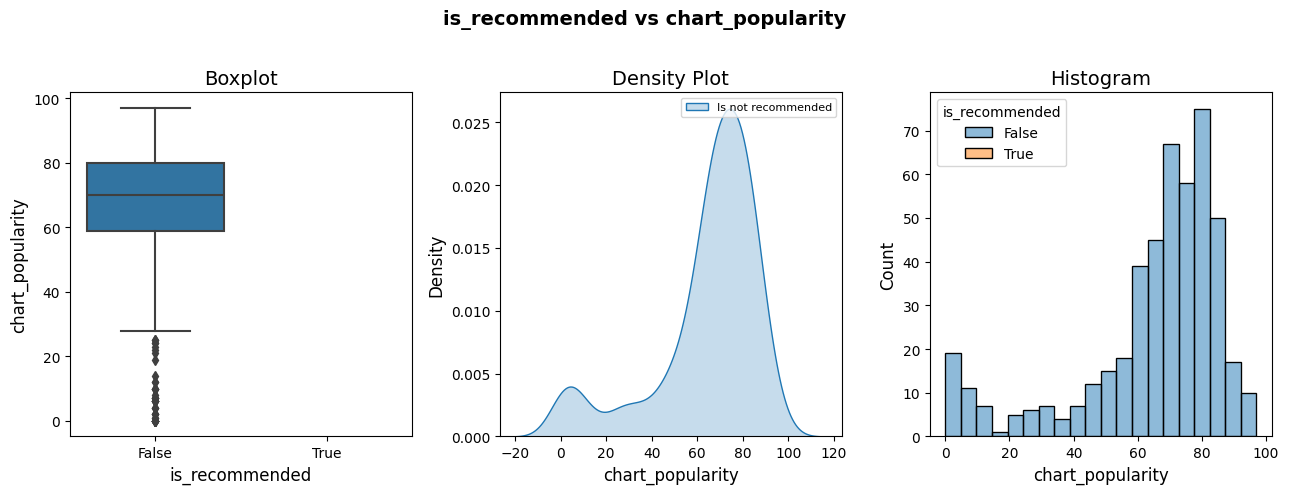

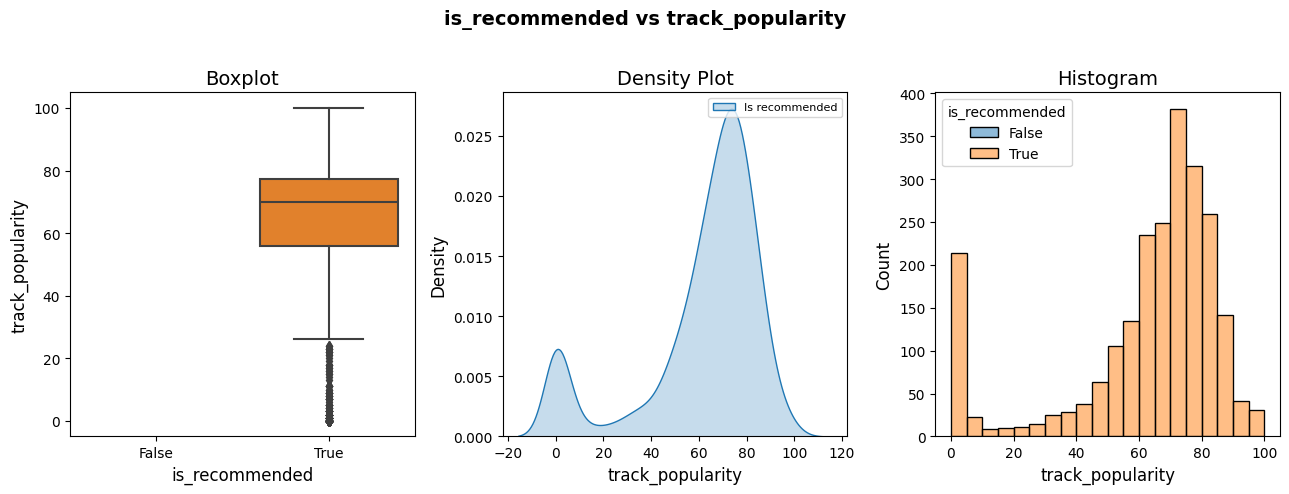

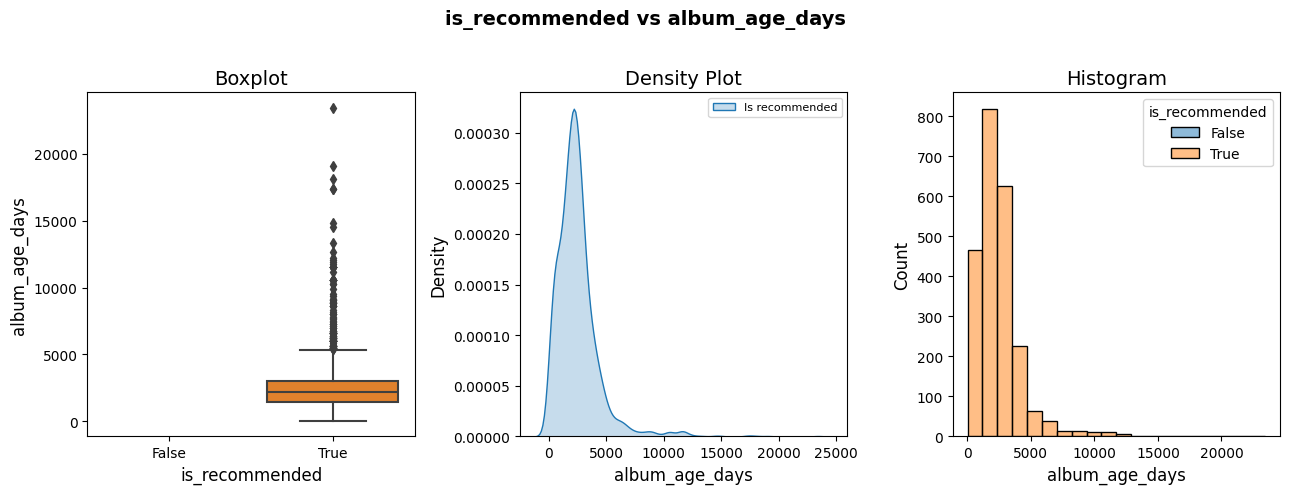

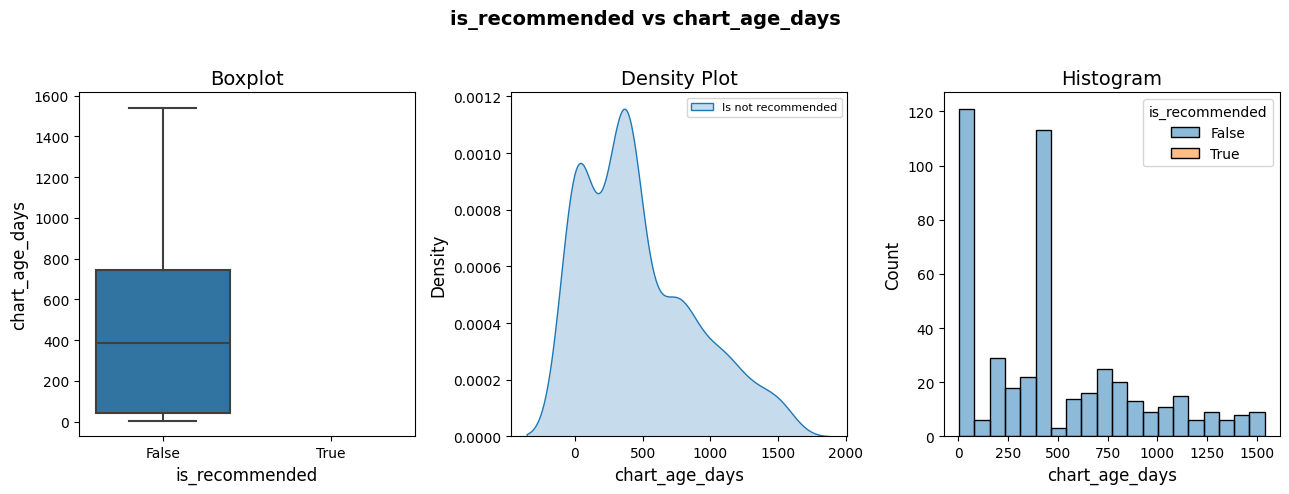

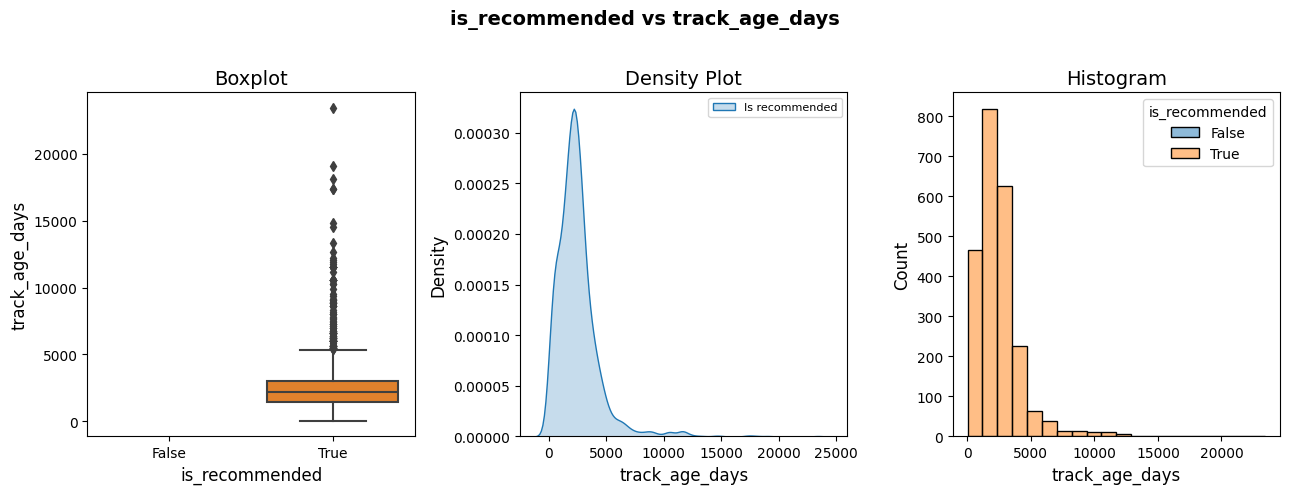

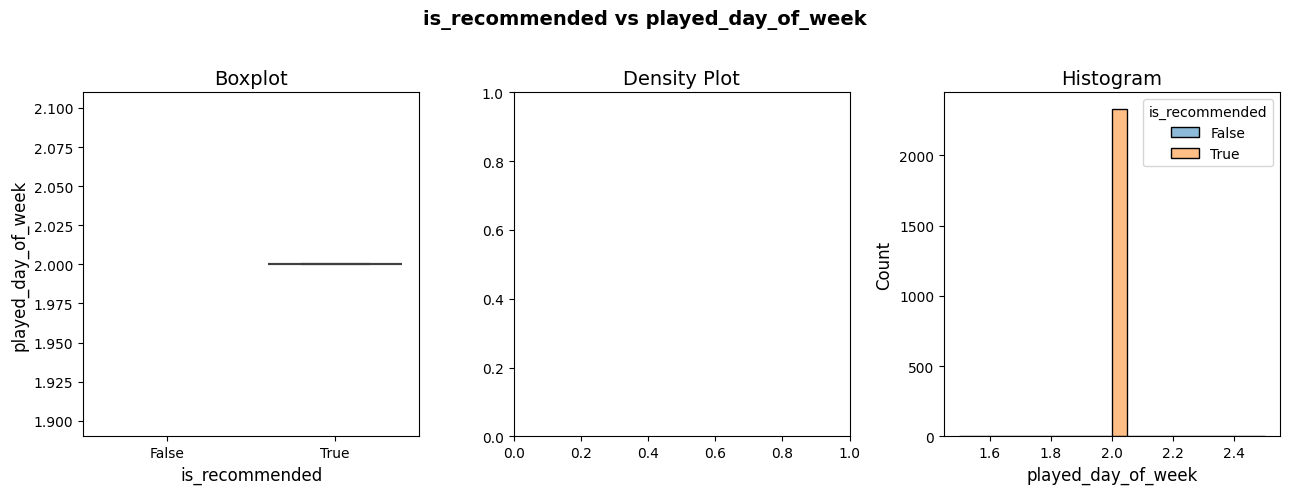

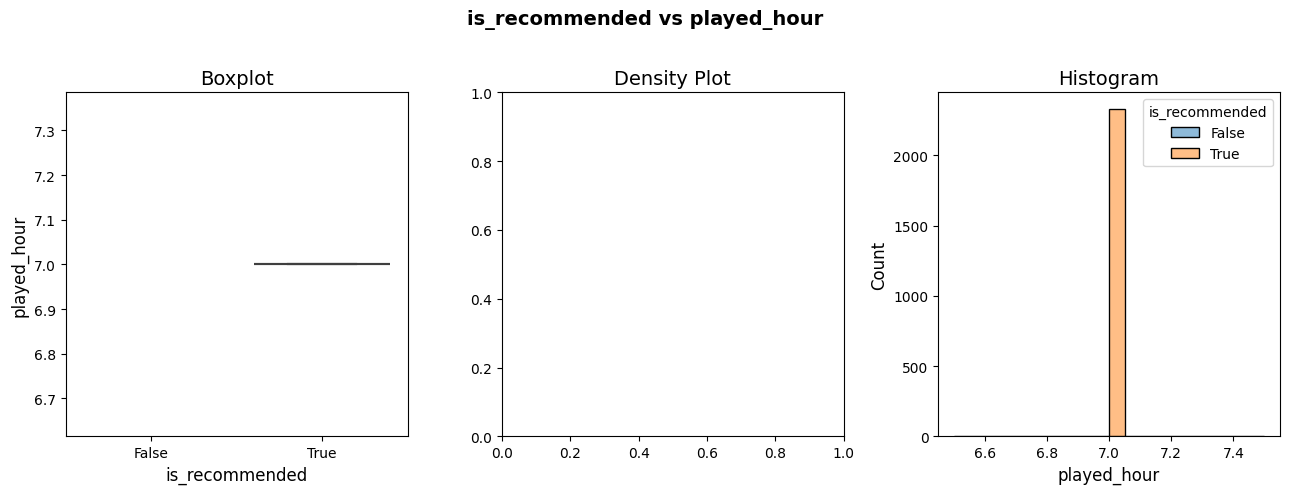

In [82]:
# Bivariate analysis for numerical columns
for col in numerical_columns:
    bivariate_analysis_num(col)

#### **Target vs Categorical Variables**


In [88]:
def bivariate_analysis_cat(column):
    """
    Function to plot bivariate analysis for categorical columns vs is_recommended.
    Skips all analysis (crosstabs and plots) if the column has more than 10 unique categories.
    """

    unique_cats = algorhythm_df[column].nunique(dropna=False)
    print(f"Column '{column}' has {unique_cats} unique categories.")

    if unique_cats > 10:
        print(f"Skipping all analysis for '{column}' due to high cardinality (>10 categories).")
        return None

    # Crosstab table (with totals)
    crosstab_table = pd.crosstab(algorhythm_df[column], algorhythm_df["is_recommended"], margins=True, dropna=False)
    styled_table = crosstab_table.style.background_gradient(cmap="coolwarm").set_caption(f"Crosstab: Is Recommended vs {column}")
    display(styled_table)

    # Compute percentage of 'is_recommended' for each category
    is_recommended_percentage = algorhythm_df.groupby(column, observed=True)["is_recommended"].mean() * 100
    is_recommended_percentage_df = is_recommended_percentage.to_frame(name="Percentage with Is Recommended")
    display(is_recommended_percentage_df.style.format("{:.2f}%").set_caption(f"Percentage of Cases with Is Recommended by {column}"))

    # Plotting section for columns with 10 or fewer categories
    plt.figure(figsize=(12, 5))
    plt.suptitle(f"Is Recommended vs {column}", fontsize=14, fontweight="bold")

    # Prepare plot DataFrame removing 'All' summary rows/cols
    plot_df = crosstab_table.copy()
    if 'All' in plot_df.index:
        plot_df = plot_df.drop(index='All')
    if 'All' in plot_df.columns:
        plot_df = plot_df.drop(columns='All')

    # Stacked Barplot
    plt.subplot(1, 2, 1)
    plot_df.plot(kind="bar", stacked=True, colormap="coolwarm", ax=plt.gca())
    plt.title("Stacked Barplot")
    plt.xlabel(column)
    plt.ylabel("Count")

    # Regular Barplot
    plt.subplot(1, 2, 2)
    plot_df.plot(kind="bar", colormap="viridis", ax=plt.gca())
    plt.title("Barplot")
    plt.xlabel(column)
    plt.ylabel("Count")

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    return None

Column 'album_name' has 1327 unique categories.
Skipping all analysis for 'album_name' due to high cardinality (>10 categories).
Column 'artist_genres' has 172 unique categories.
Skipping all analysis for 'artist_genres' due to high cardinality (>10 categories).
Column 'artist_name' has 609 unique categories.
Skipping all analysis for 'artist_name' due to high cardinality (>10 categories).
Column 'chart_chart_name' has 4 unique categories.


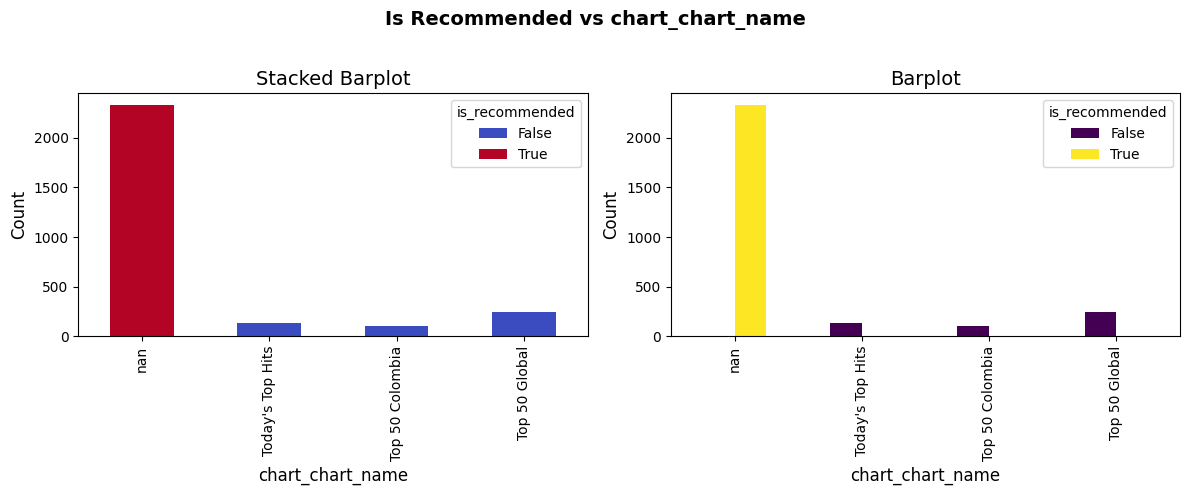

Column 'chart_genres' has 66 unique categories.
Skipping all analysis for 'chart_genres' due to high cardinality (>10 categories).
Column 'chart_track_name' has 441 unique categories.
Skipping all analysis for 'chart_track_name' due to high cardinality (>10 categories).
Column 'chart_position' has 244 unique categories.
Skipping all analysis for 'chart_position' due to high cardinality (>10 categories).
Column 'gender' has 2 unique categories.


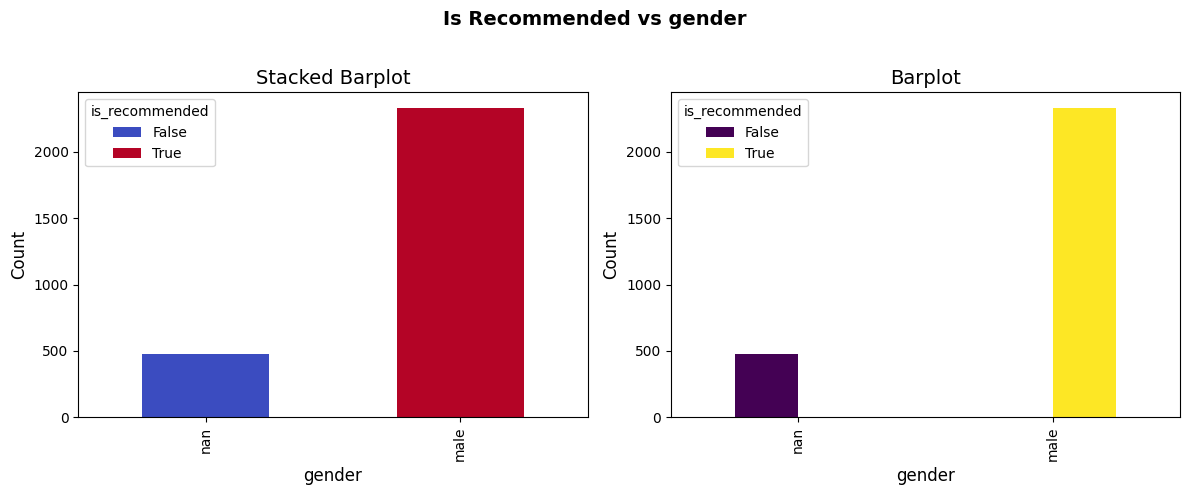

Column 'is_liked' has 2 unique categories.


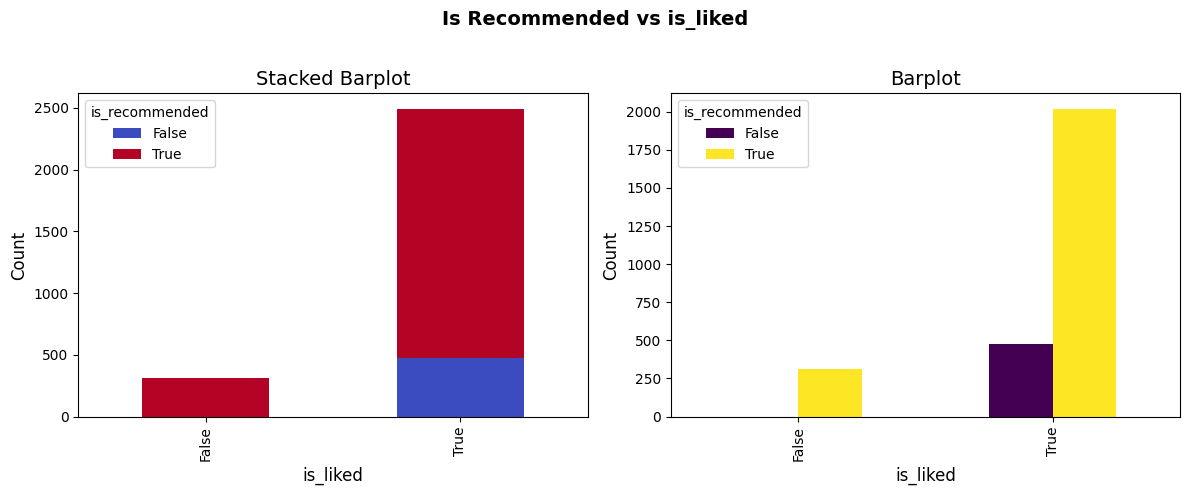

Column 'is_recent_play' has 2 unique categories.


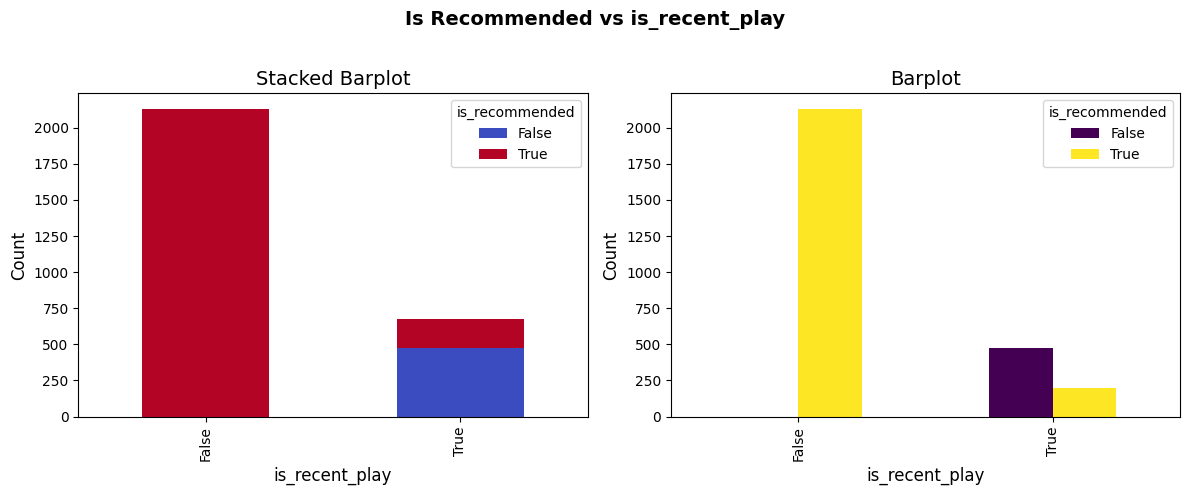

Column 'is_top_track' has 2 unique categories.


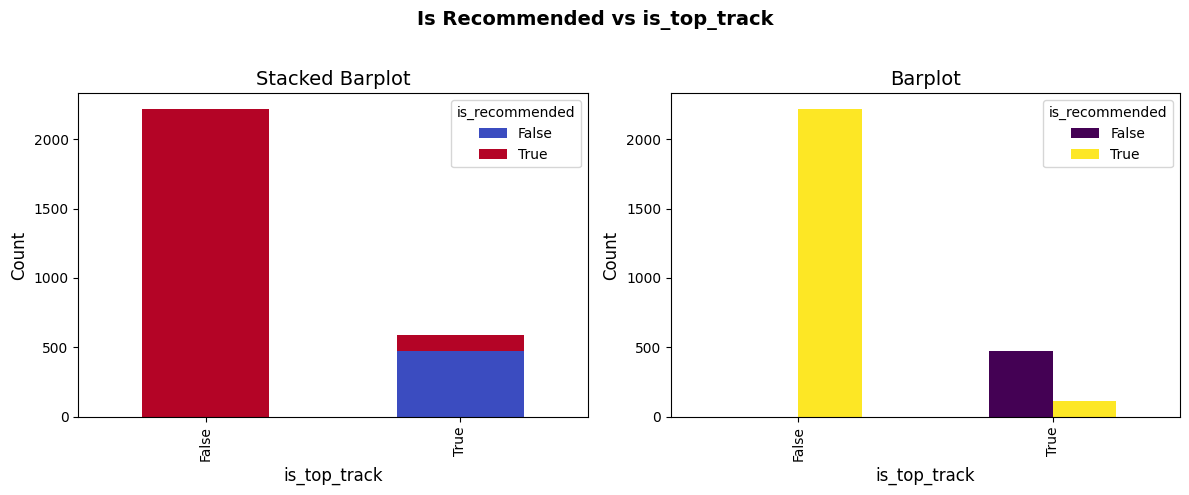

Column 'location' has 2 unique categories.


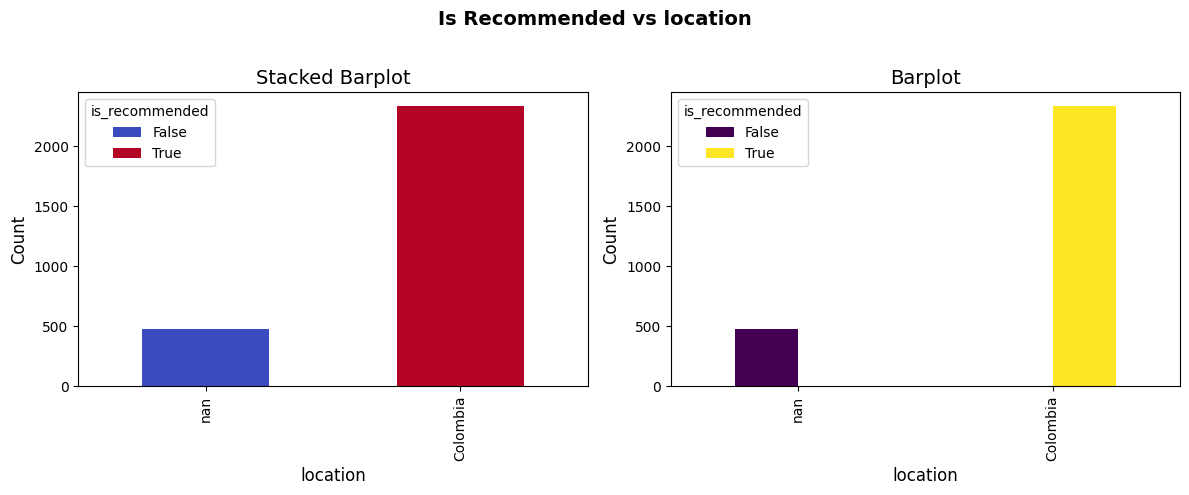

Column 'music_profile' has 2 unique categories.


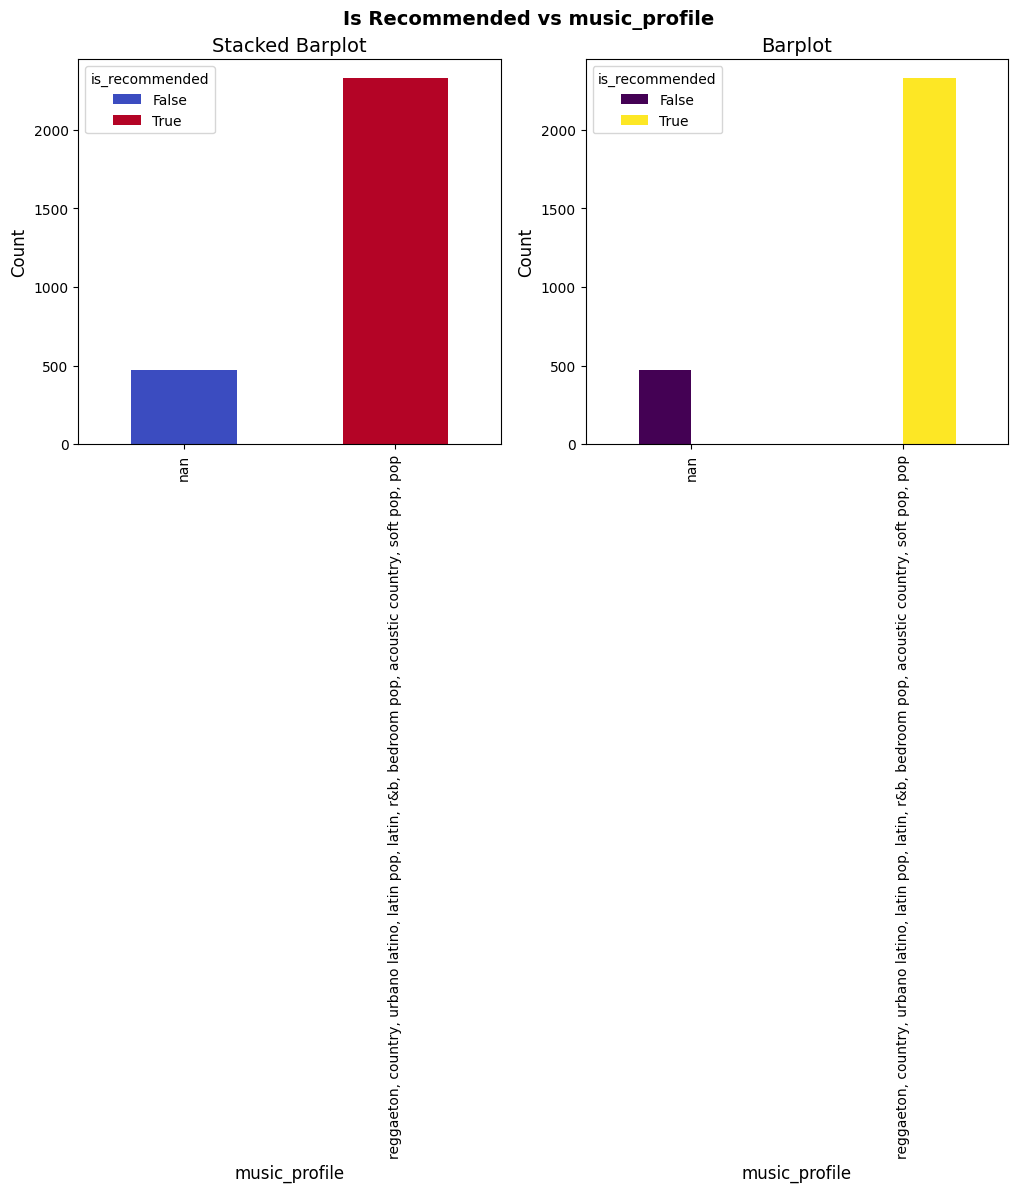

Column 'track_name' has 1887 unique categories.
Skipping all analysis for 'track_name' due to high cardinality (>10 categories).


In [89]:
# Bivariate analysis for categorical columns
for col in [c for c in categorical_columns if c != "is_recommended"]:
    bivariate_analysis_cat(col)

#### **Numerical vs Numerical Variables**


In [92]:
def bivariate_analysis_num_vs_num(target, numerical_columns, sample_size=1000):
    """
    Scatter plots of a numerical column against other numerical columns with better visibility.
    
    Parameters:
    - target: The numerical column to compare against others.
    - numerical_columns: List of numerical column names.
    - sample_size: Number of points to sample for plotting (default 1000).
    """

    nums = [col for col in numerical_columns if col != target]  # Exclude target column
    n_plots = len(nums)
    
    # Sampling to reduce density
    if len(algorhythm_df) > sample_size:
        df_sample = algorhythm_df.sample(sample_size, random_state=42)
    else:
        df_sample = algorhythm_df

    # Layout: let's do 2 columns to improve plot size
    n_cols = 2
    n_rows = (n_plots + 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows))
    axes = axes.flatten()  # Flatten axes for easy iteration
    
    fig.suptitle(f"{target} vs Other Numerical Variables", fontsize=16, fontweight="bold")

    for i, col in enumerate(nums):
        ax = axes[i]
        ax.scatter(df_sample[target], df_sample[col], alpha=0.3, s=10)
        ax.set_xlabel(target)
        ax.set_ylabel(col)
        ax.set_title(f"{target} vs {col}")

    # Remove any unused subplots if total plots < n_rows*n_cols
    for j in range(i+1, n_rows * n_cols):
        fig.delaxes(axes[j])
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

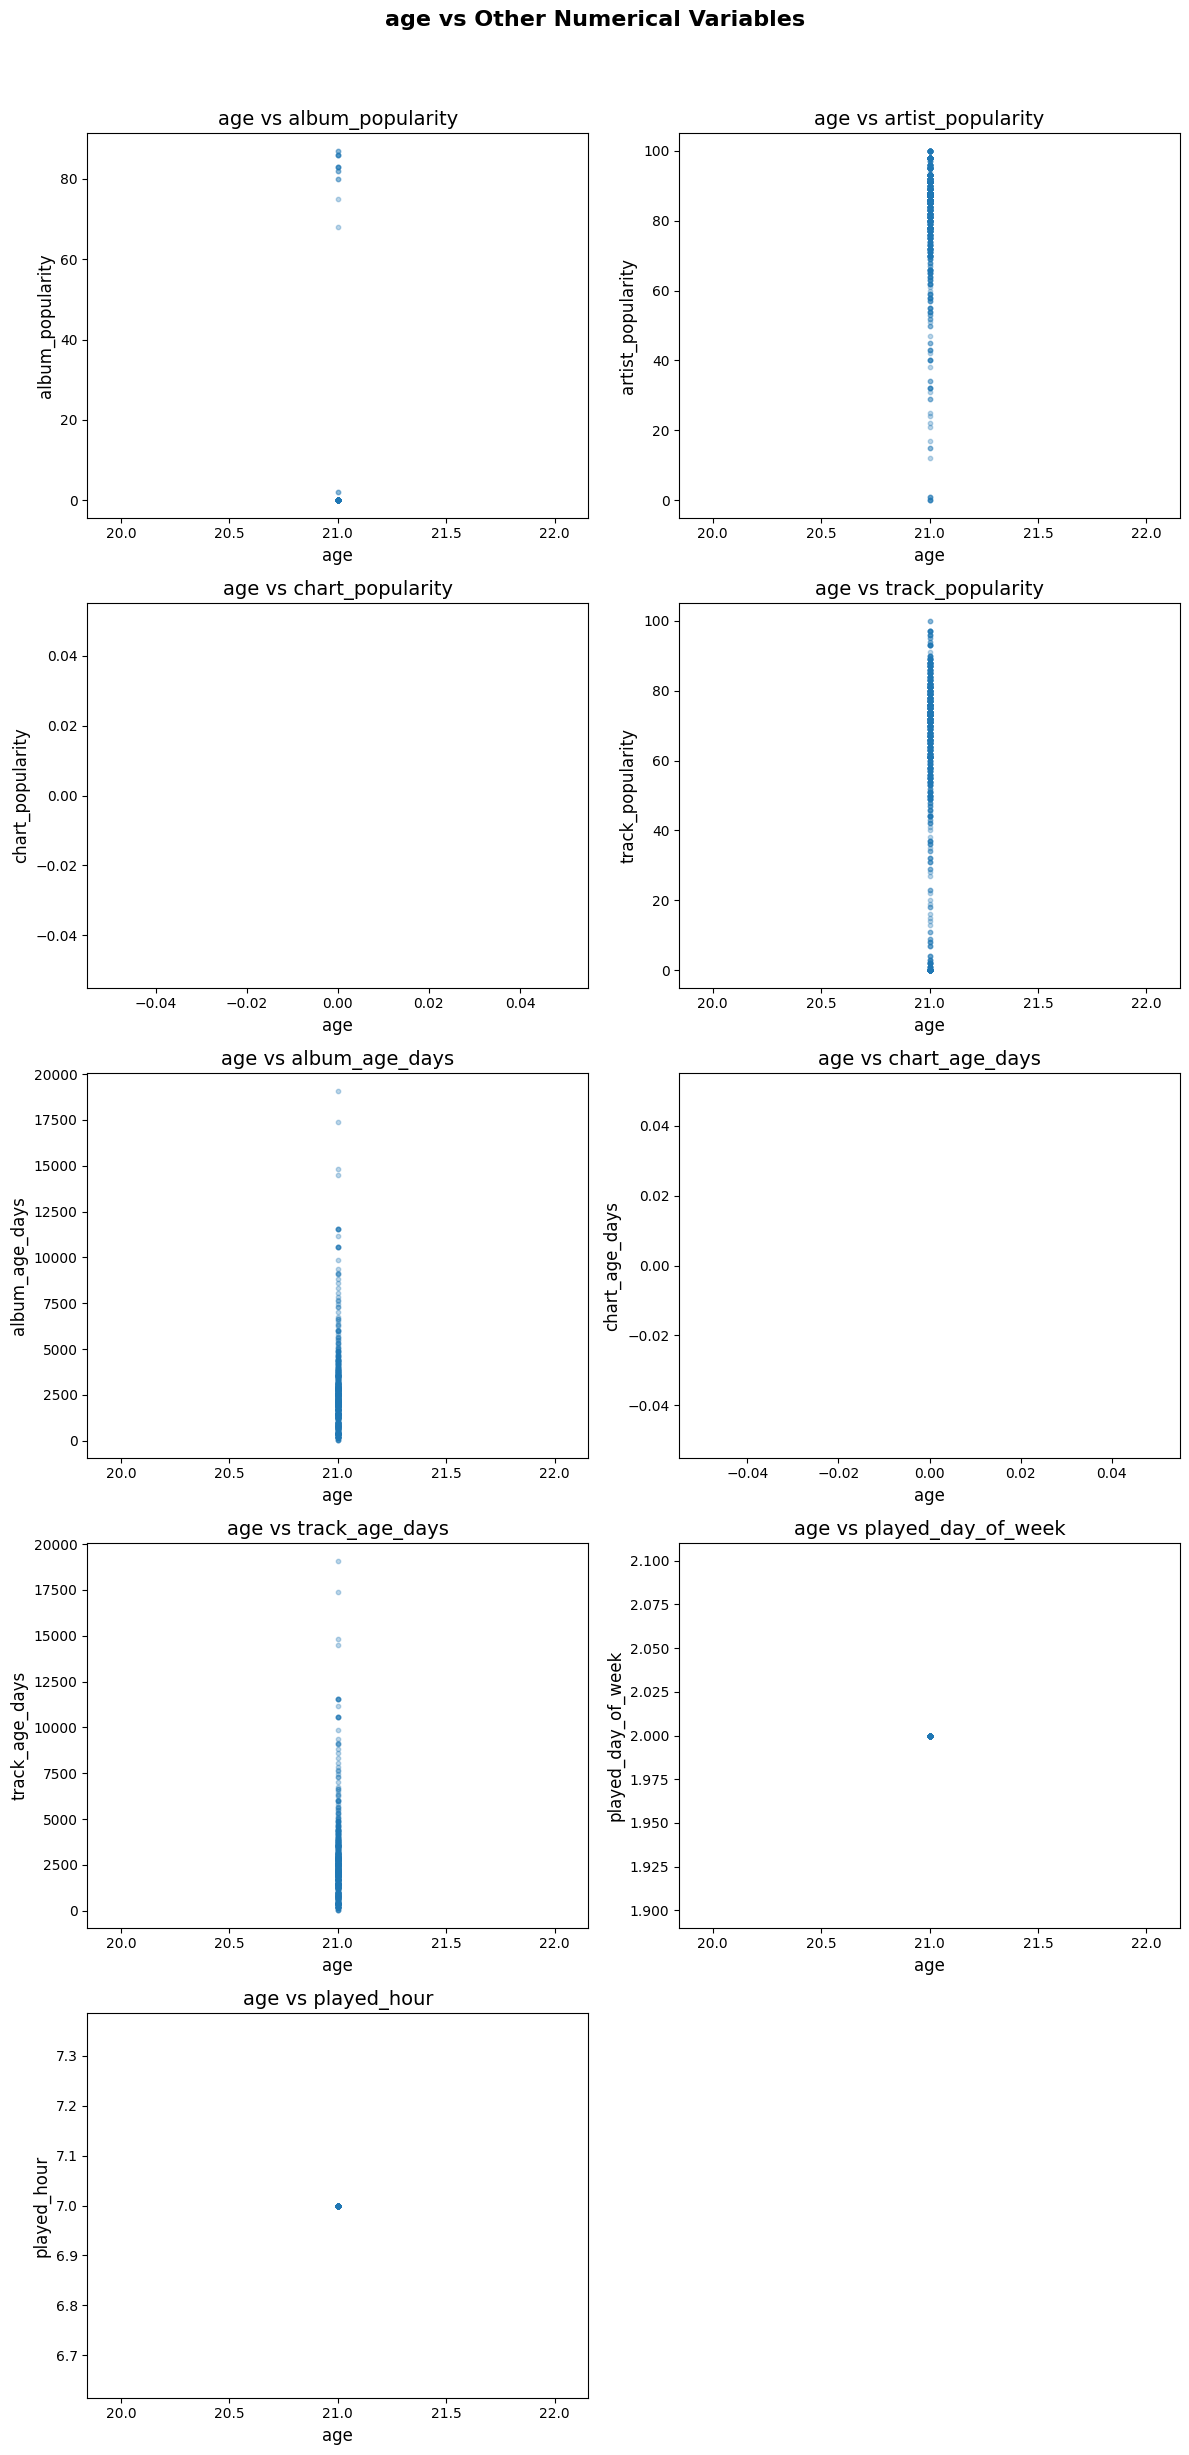

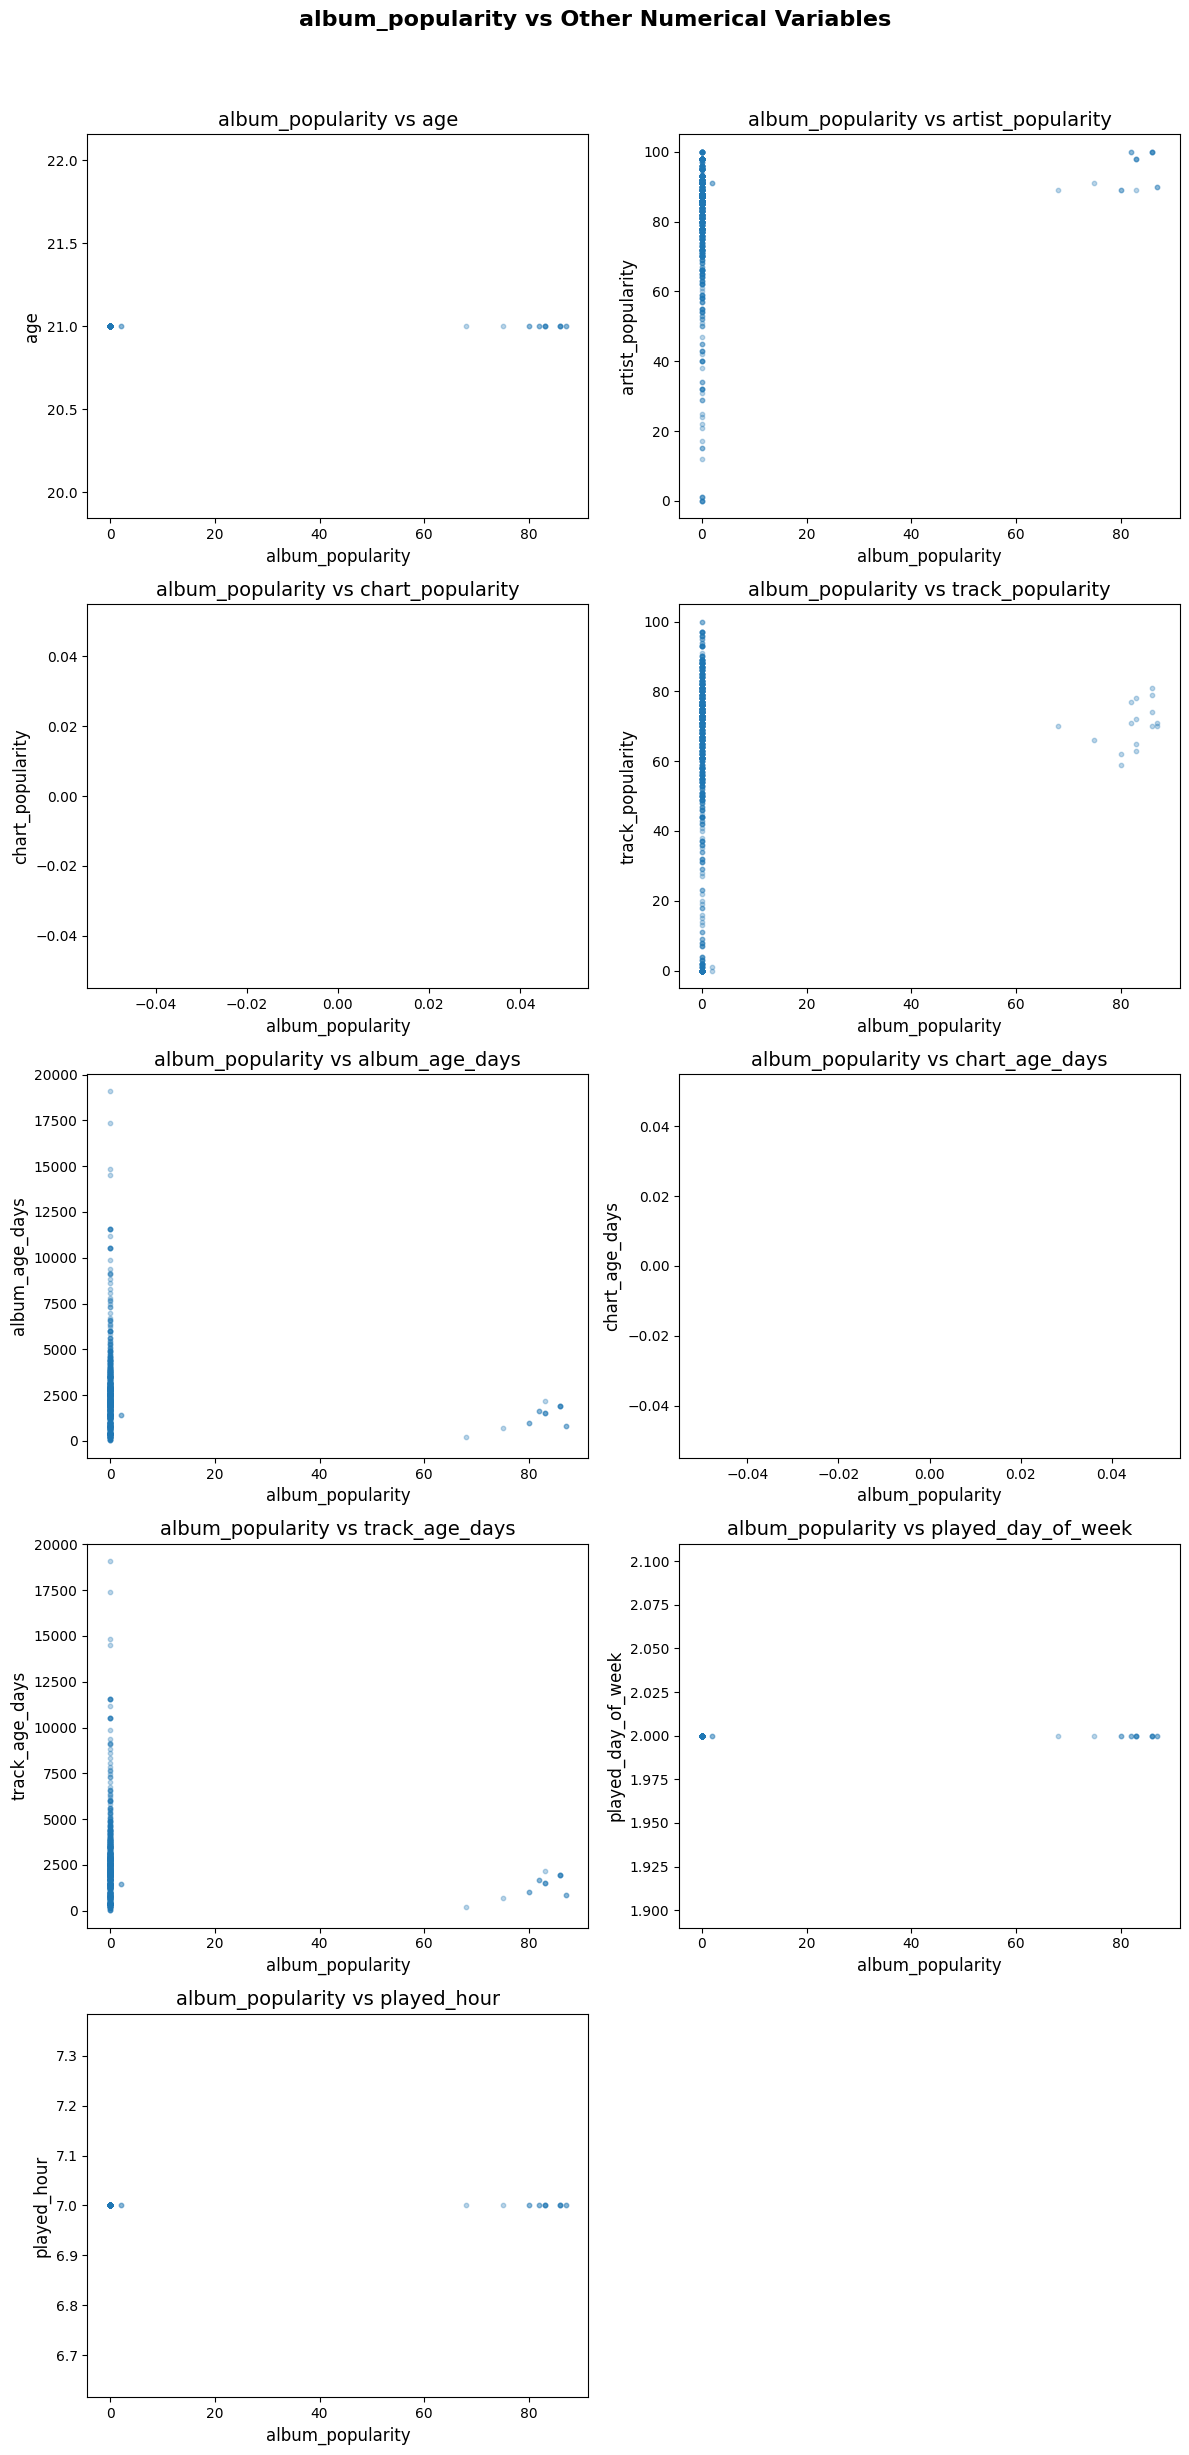

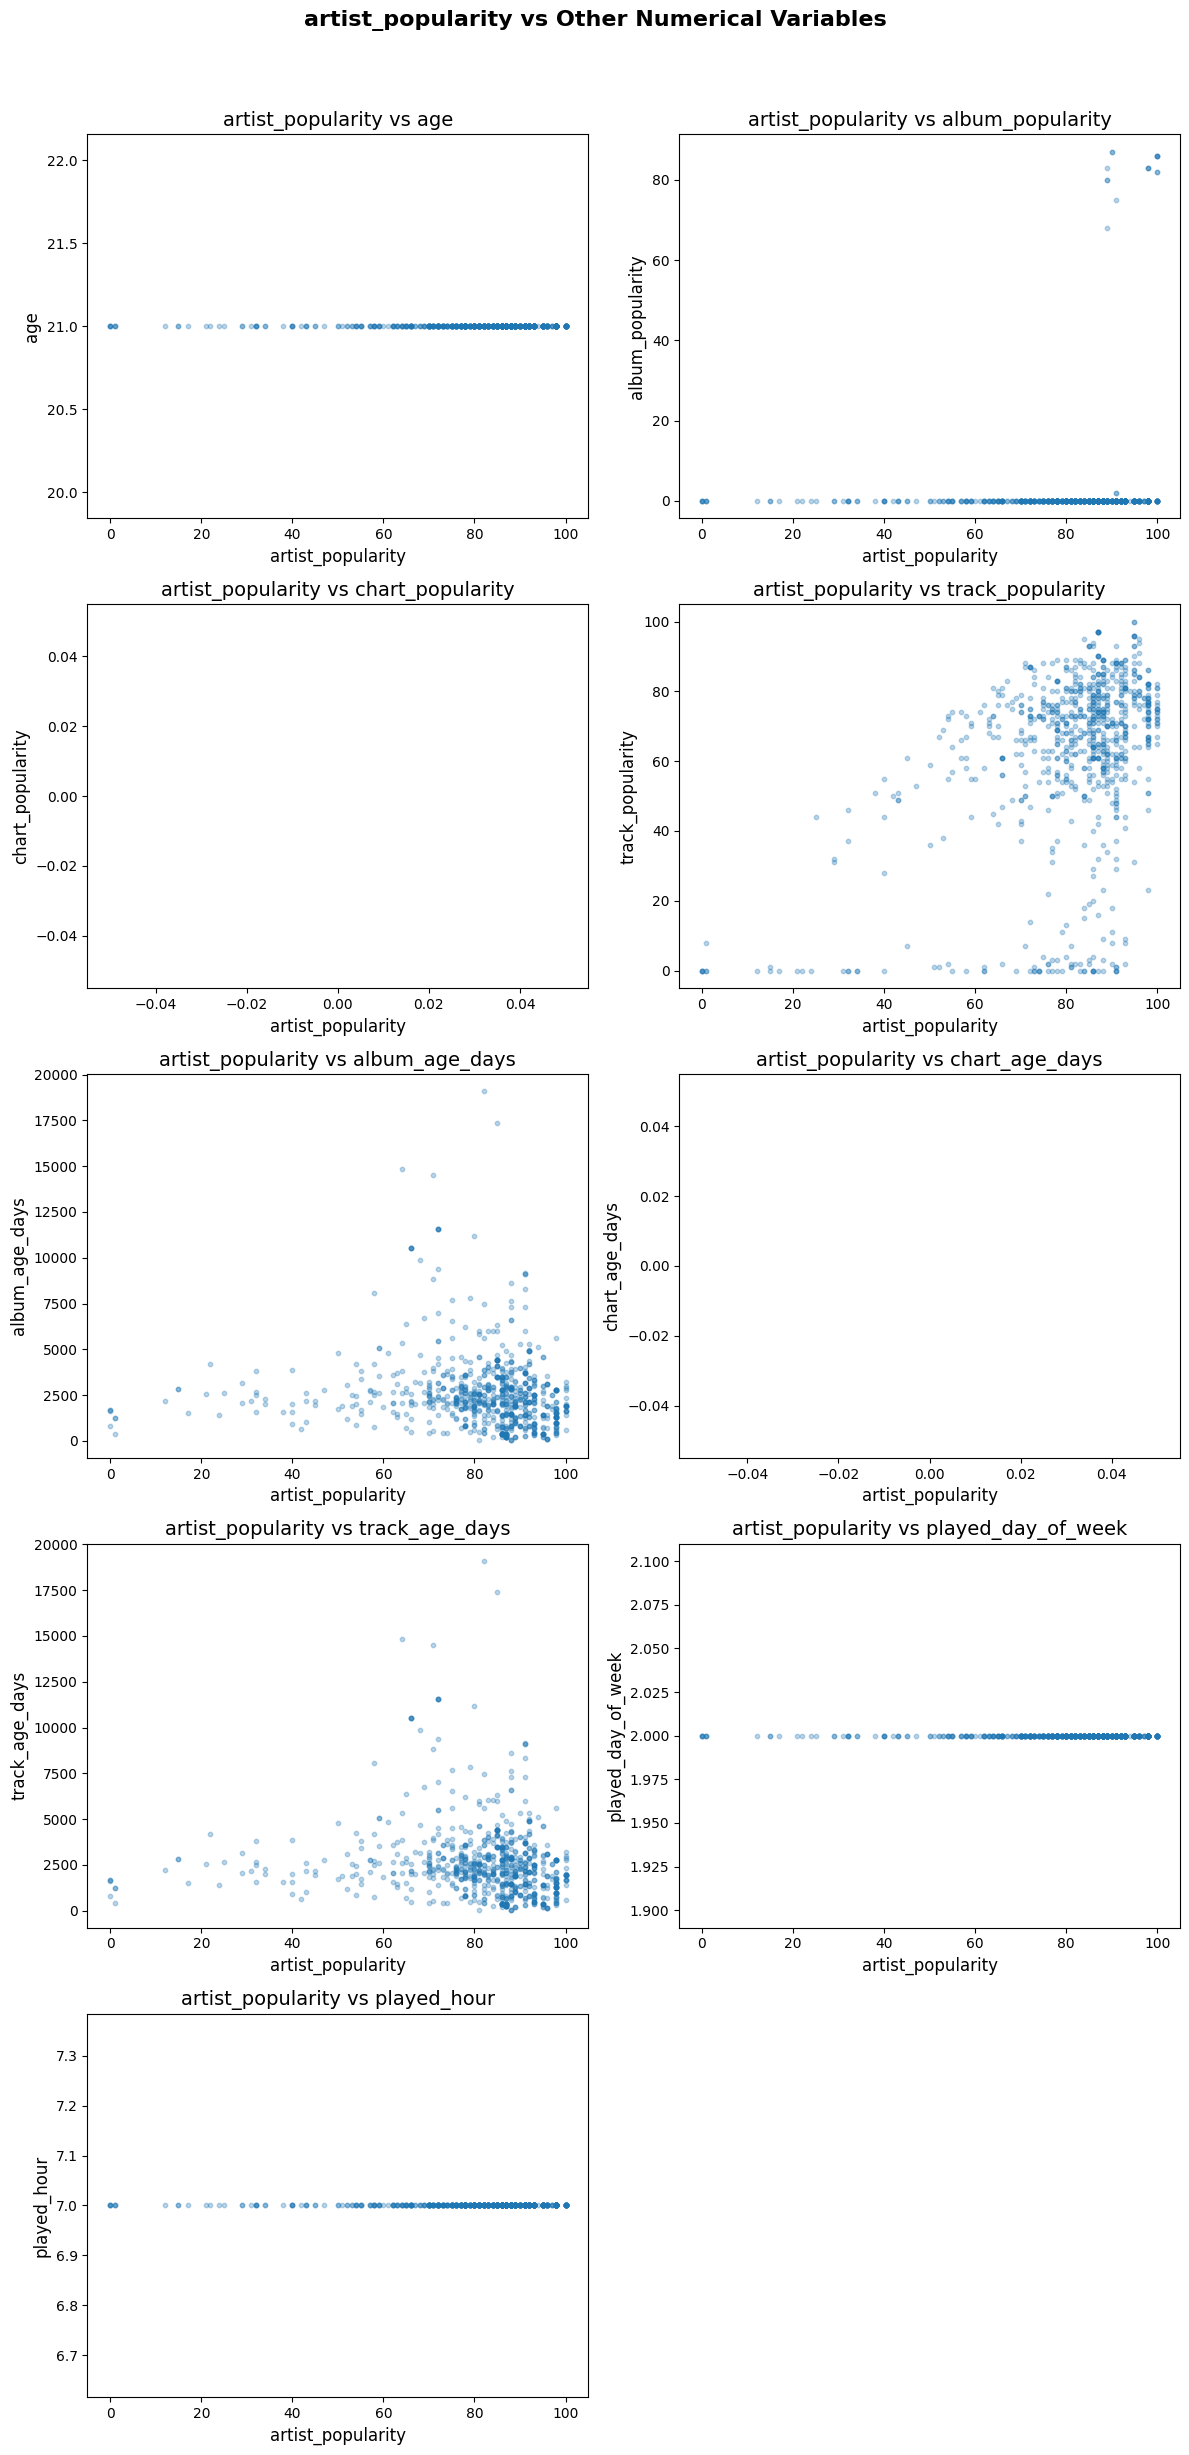

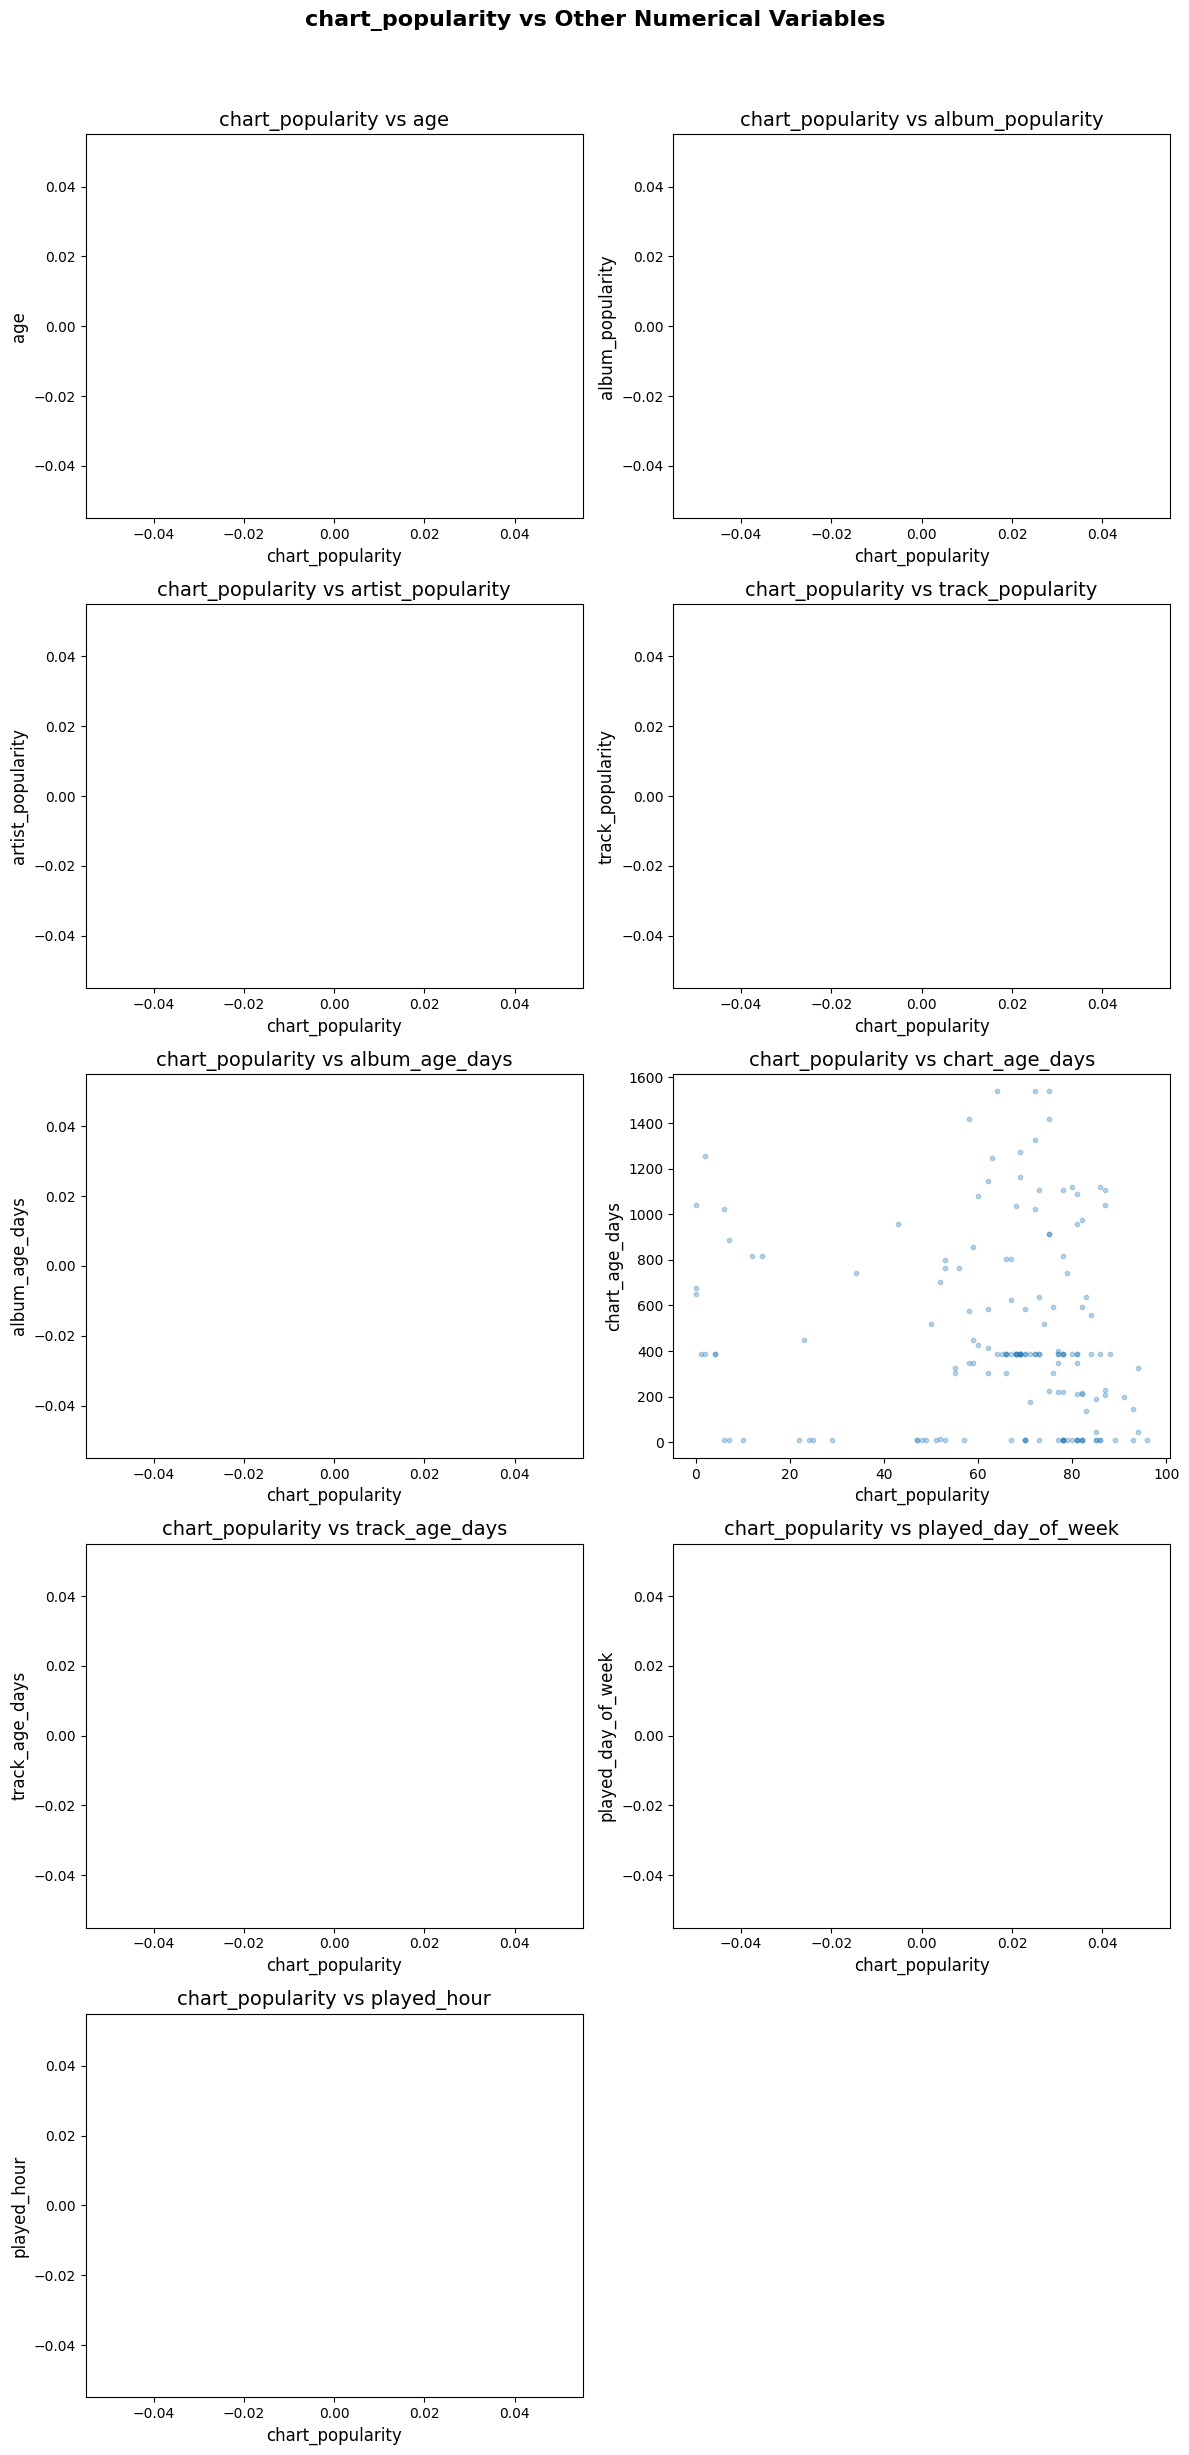

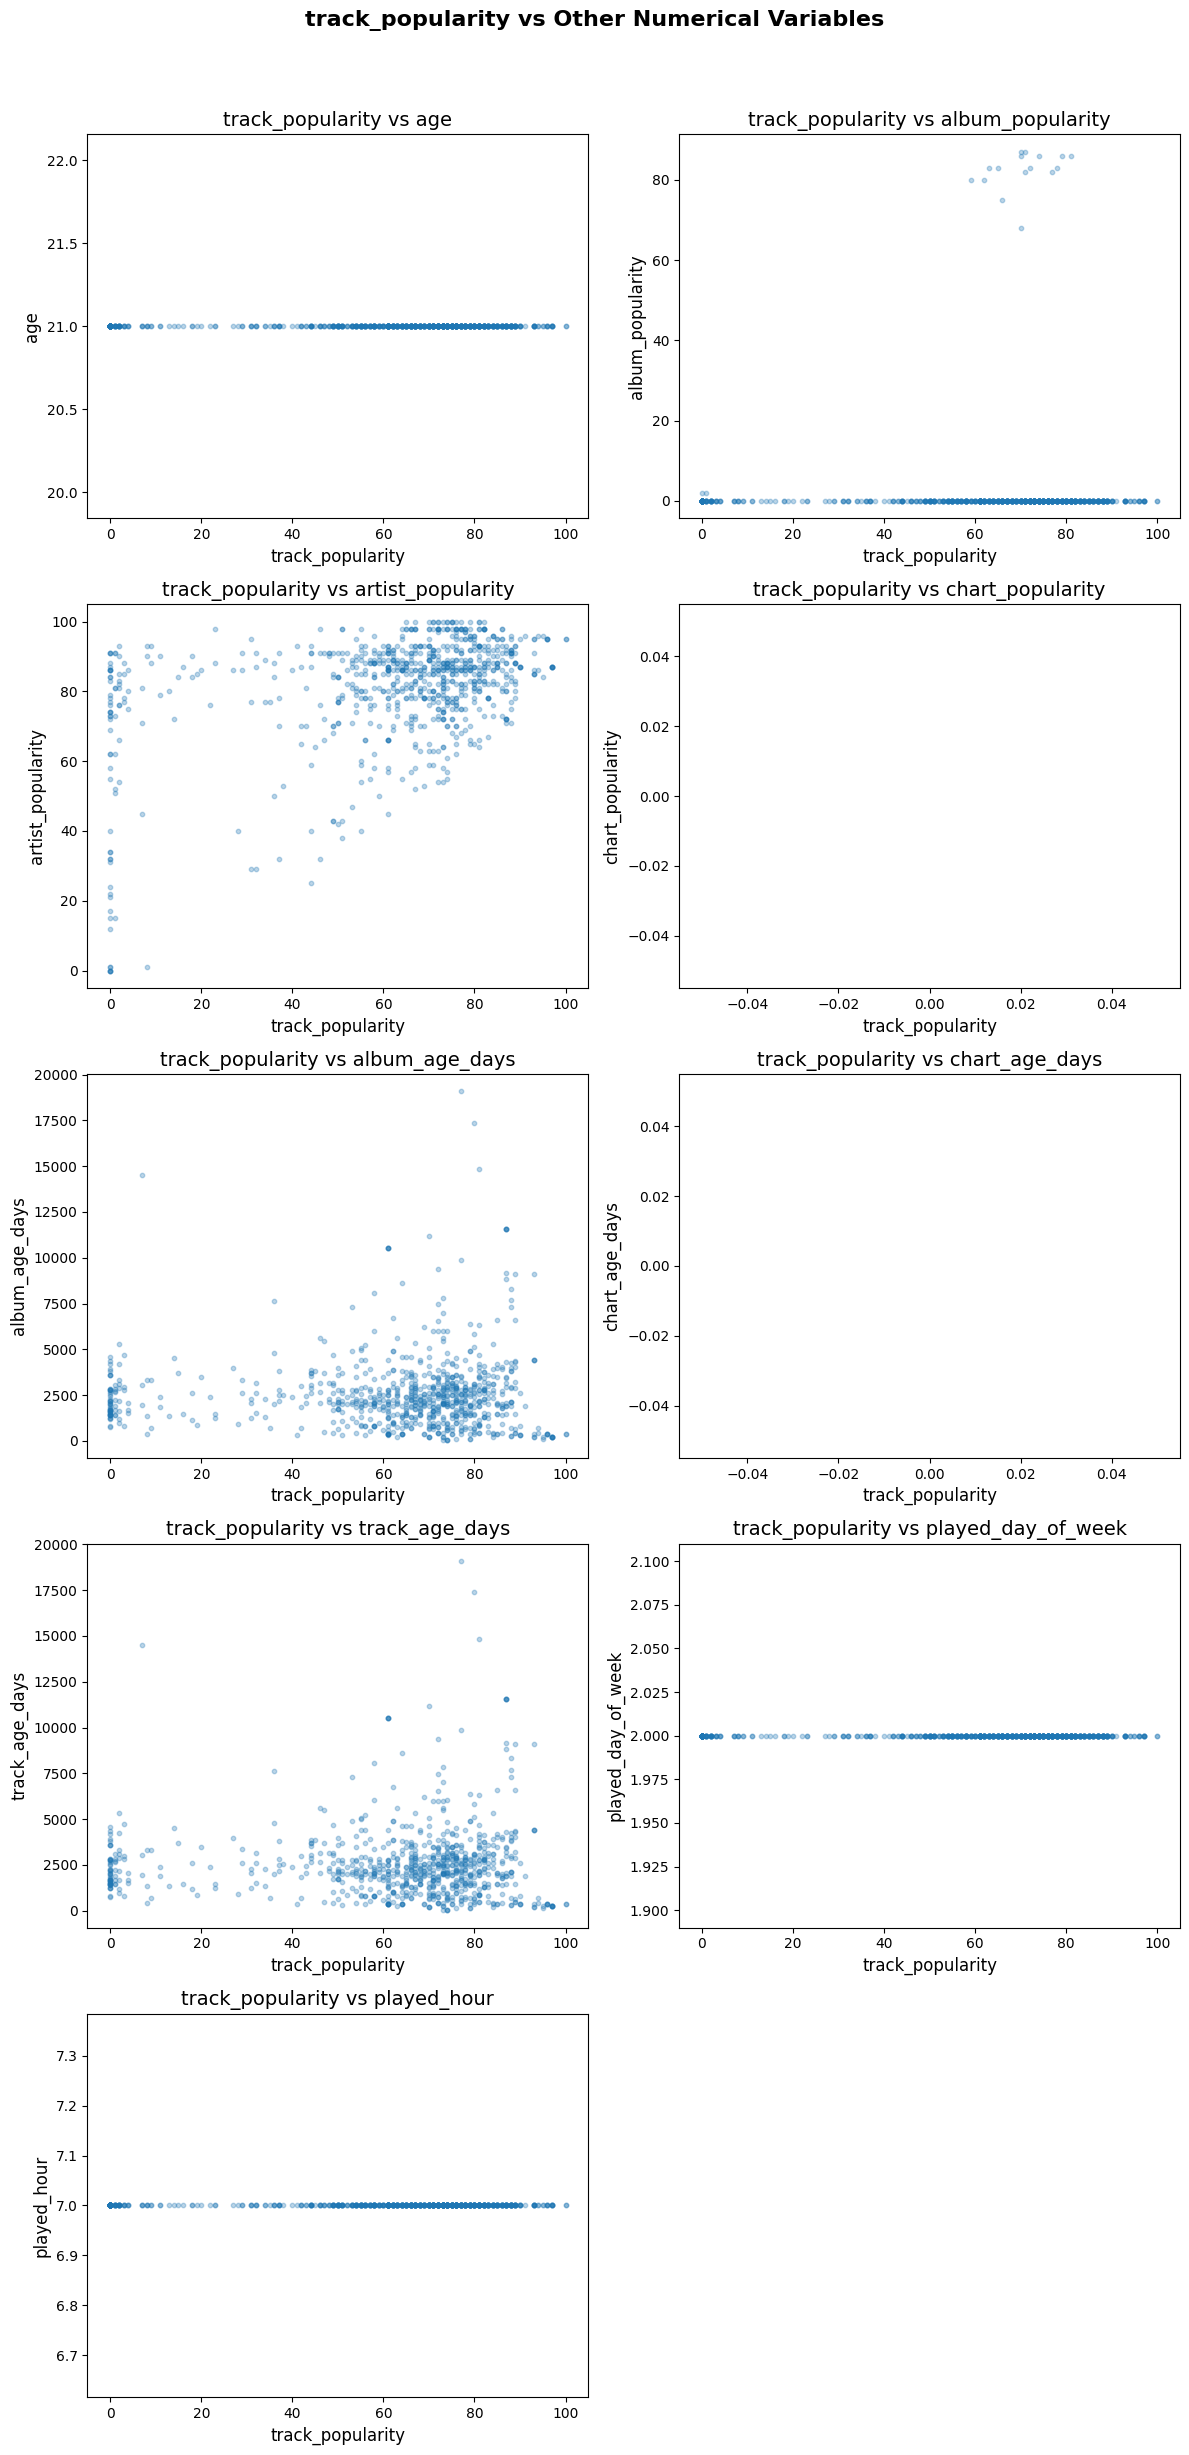

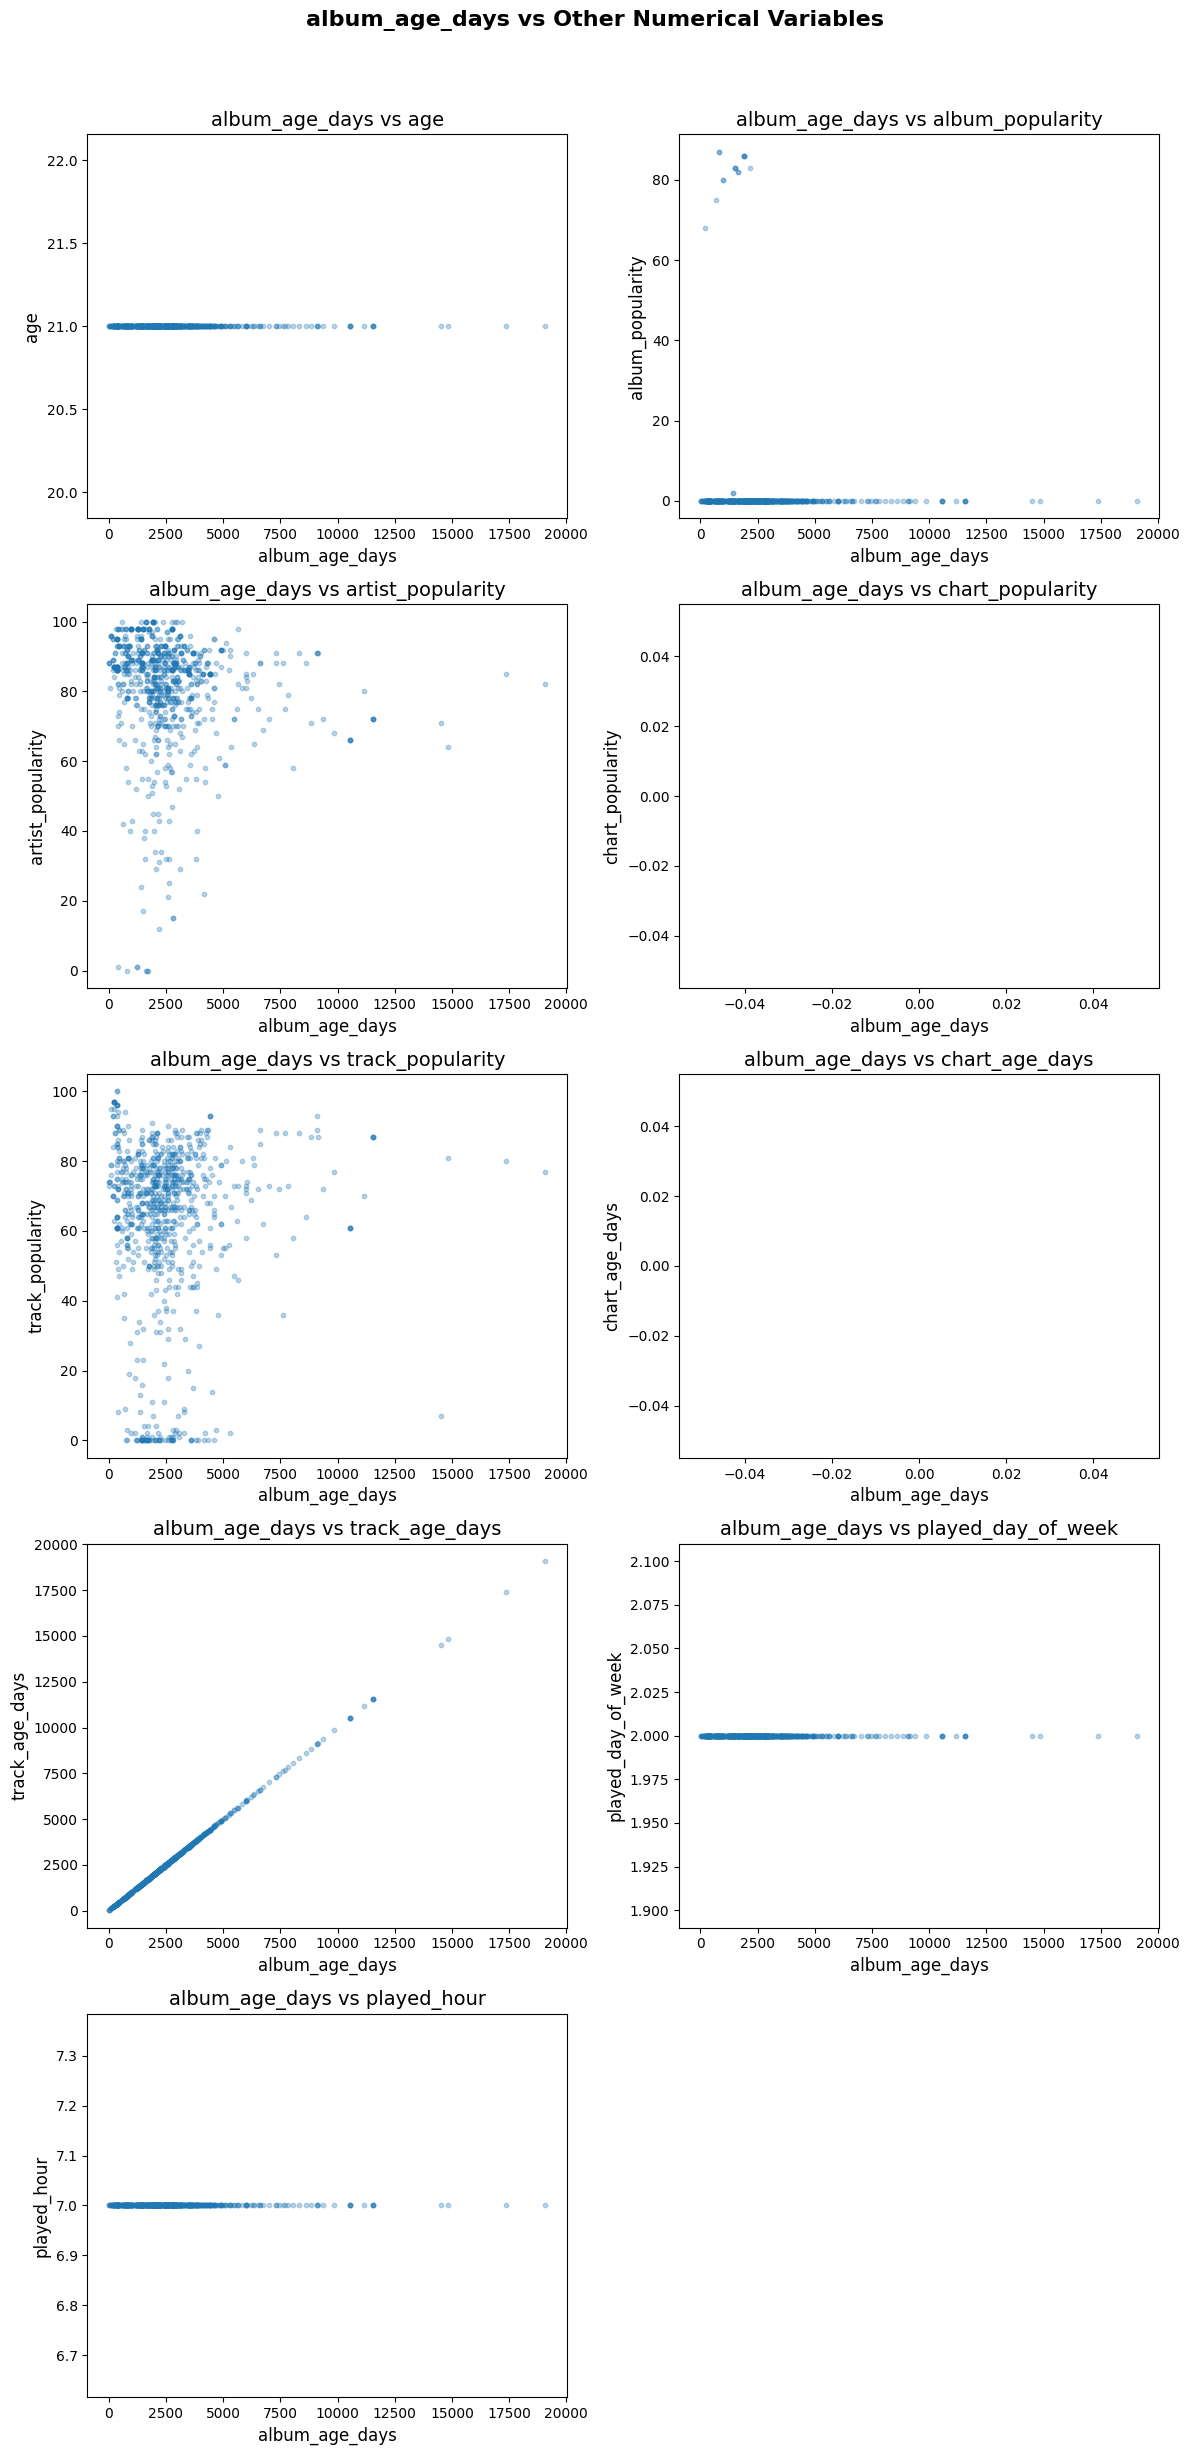

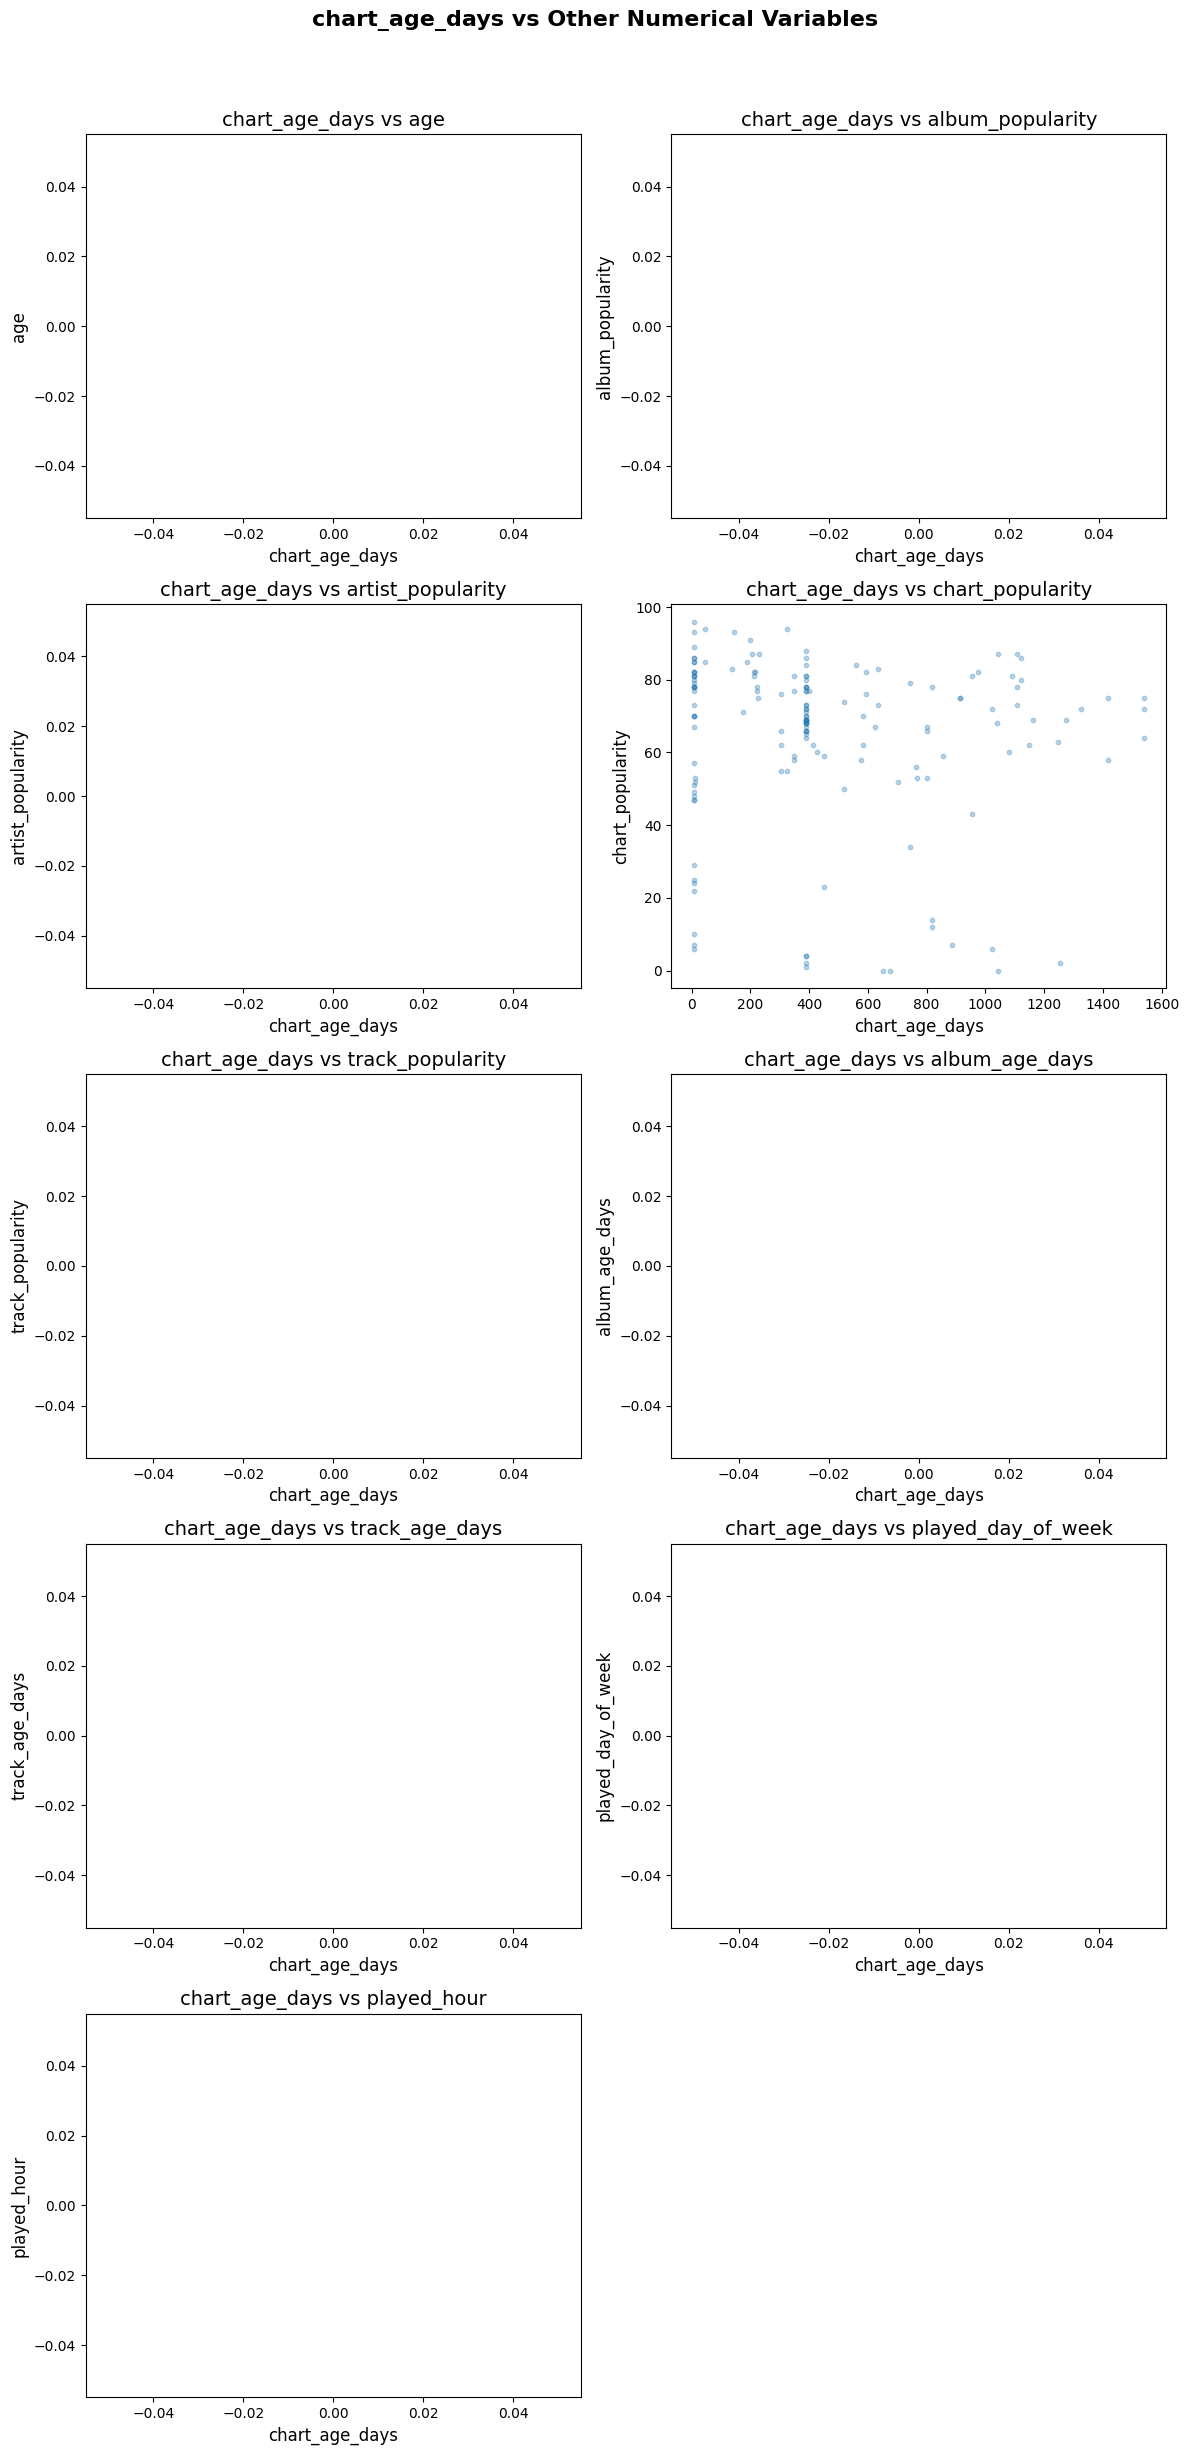

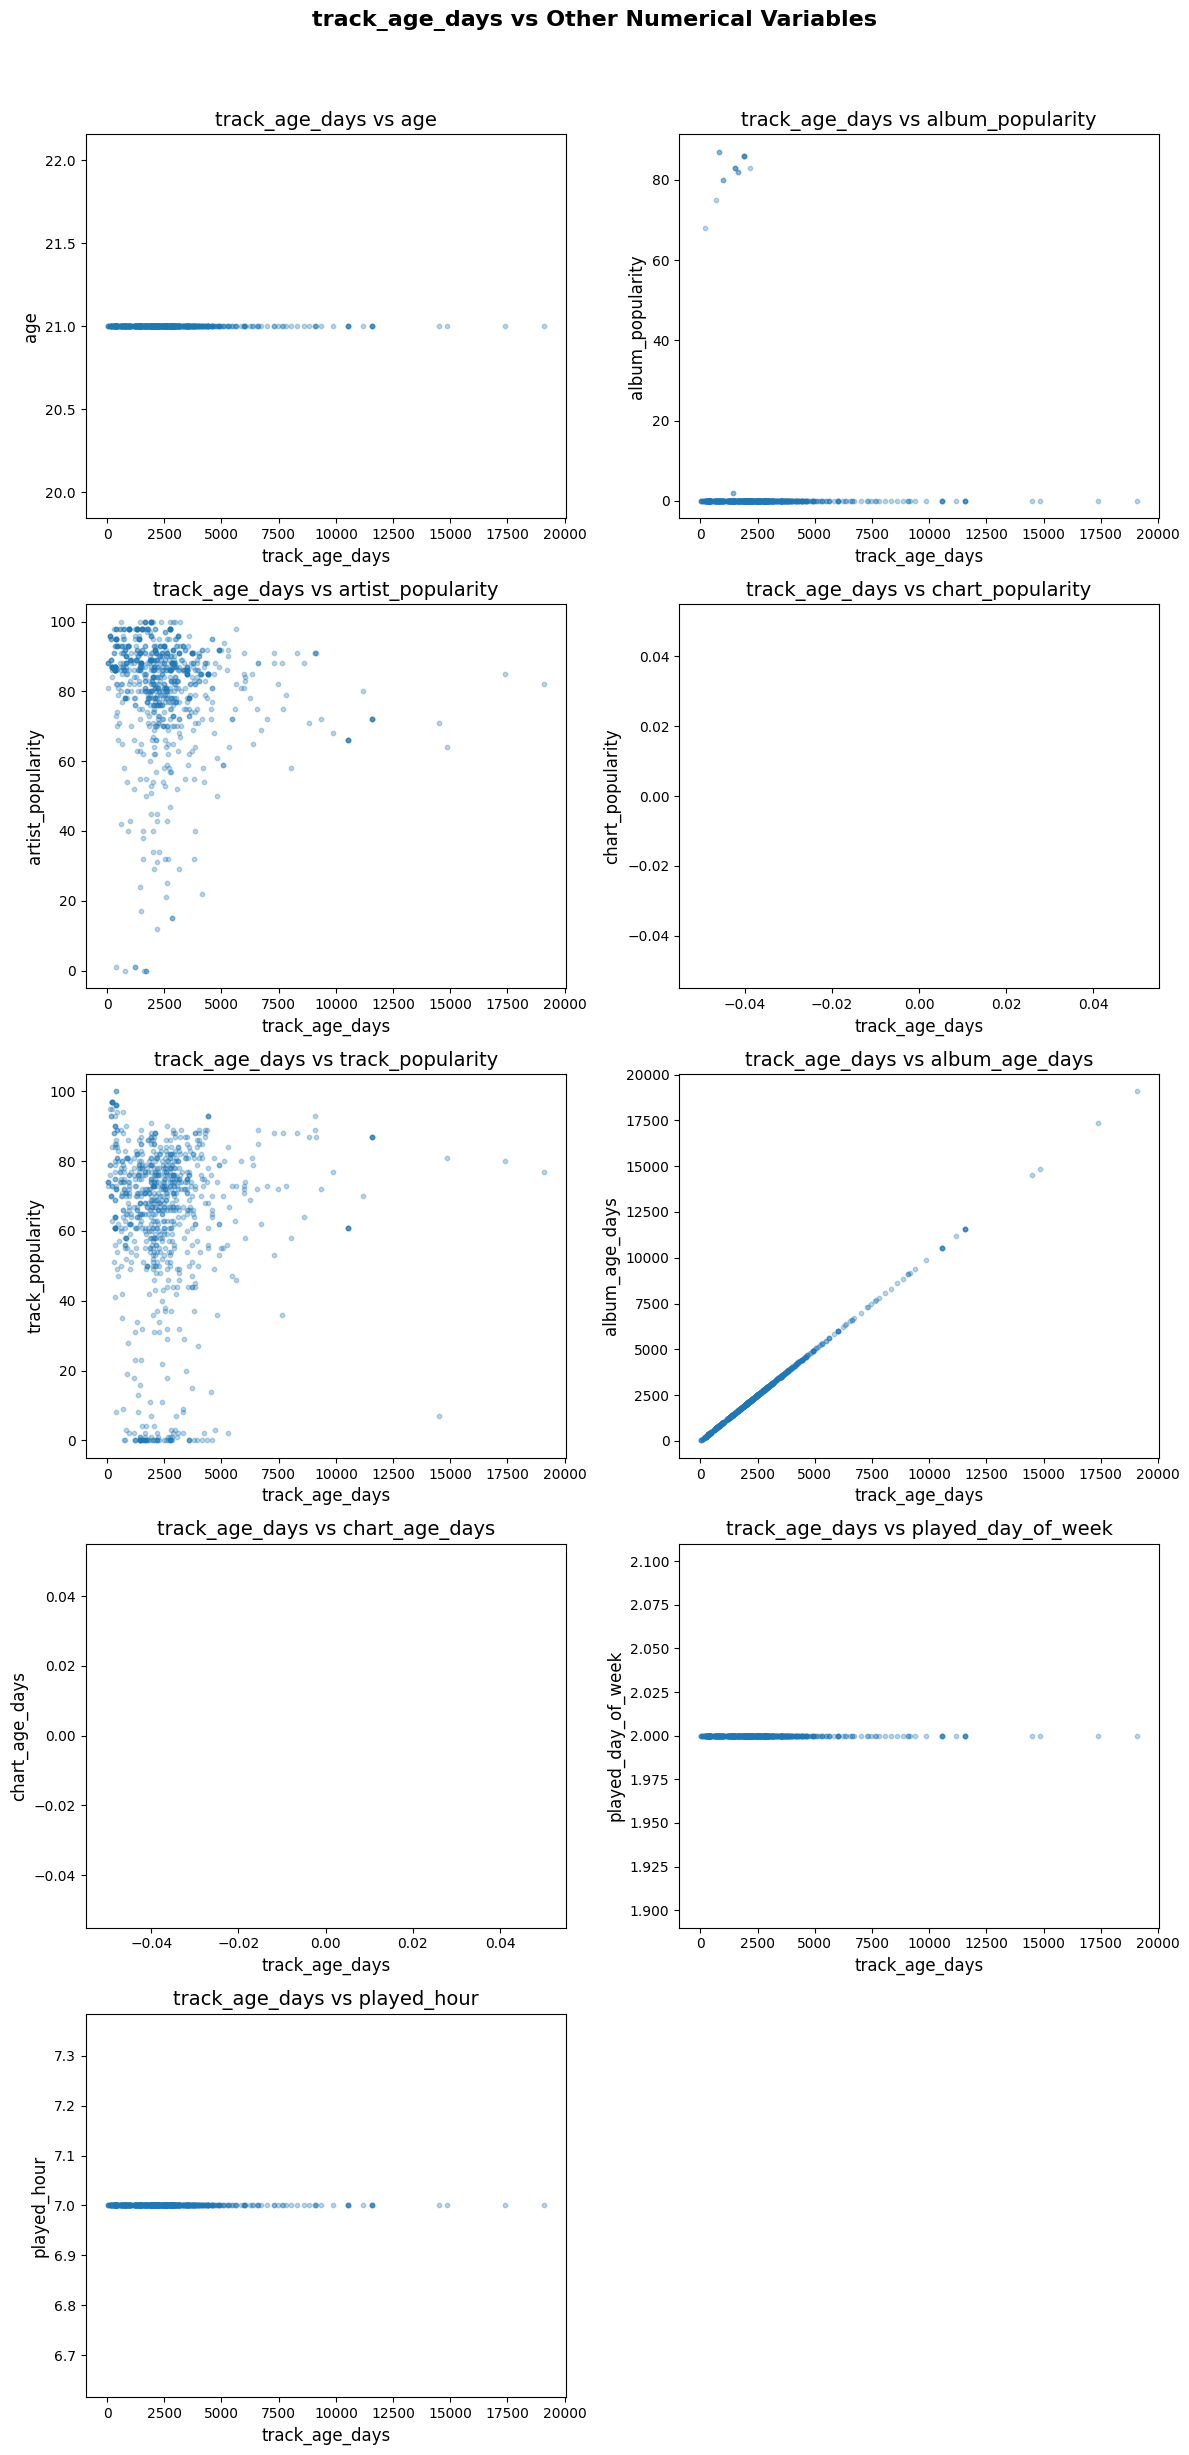

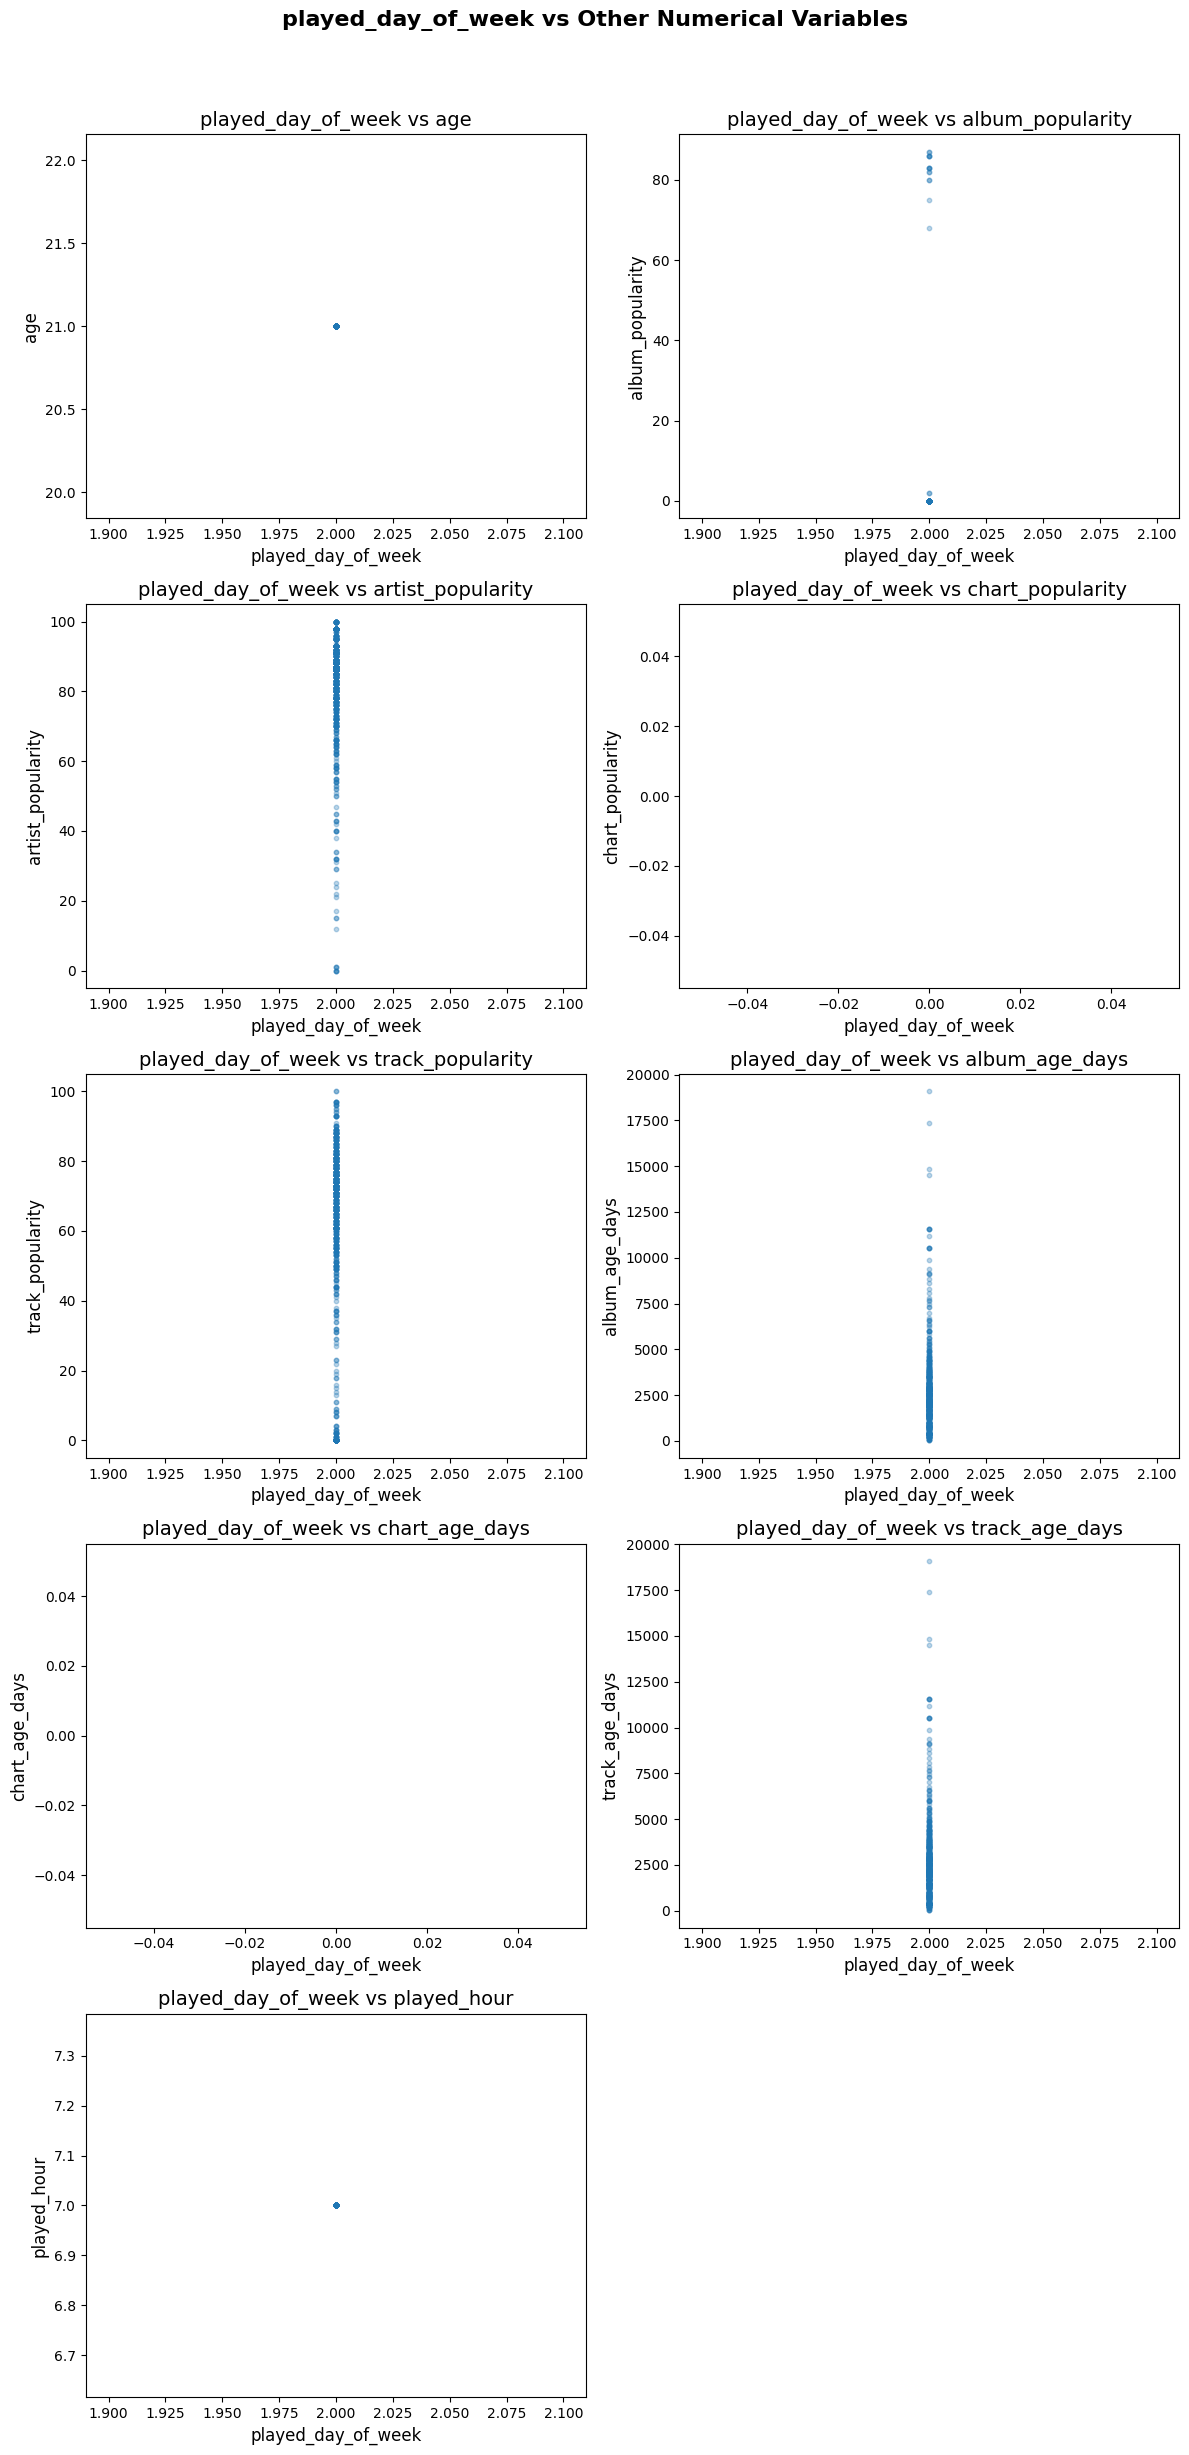

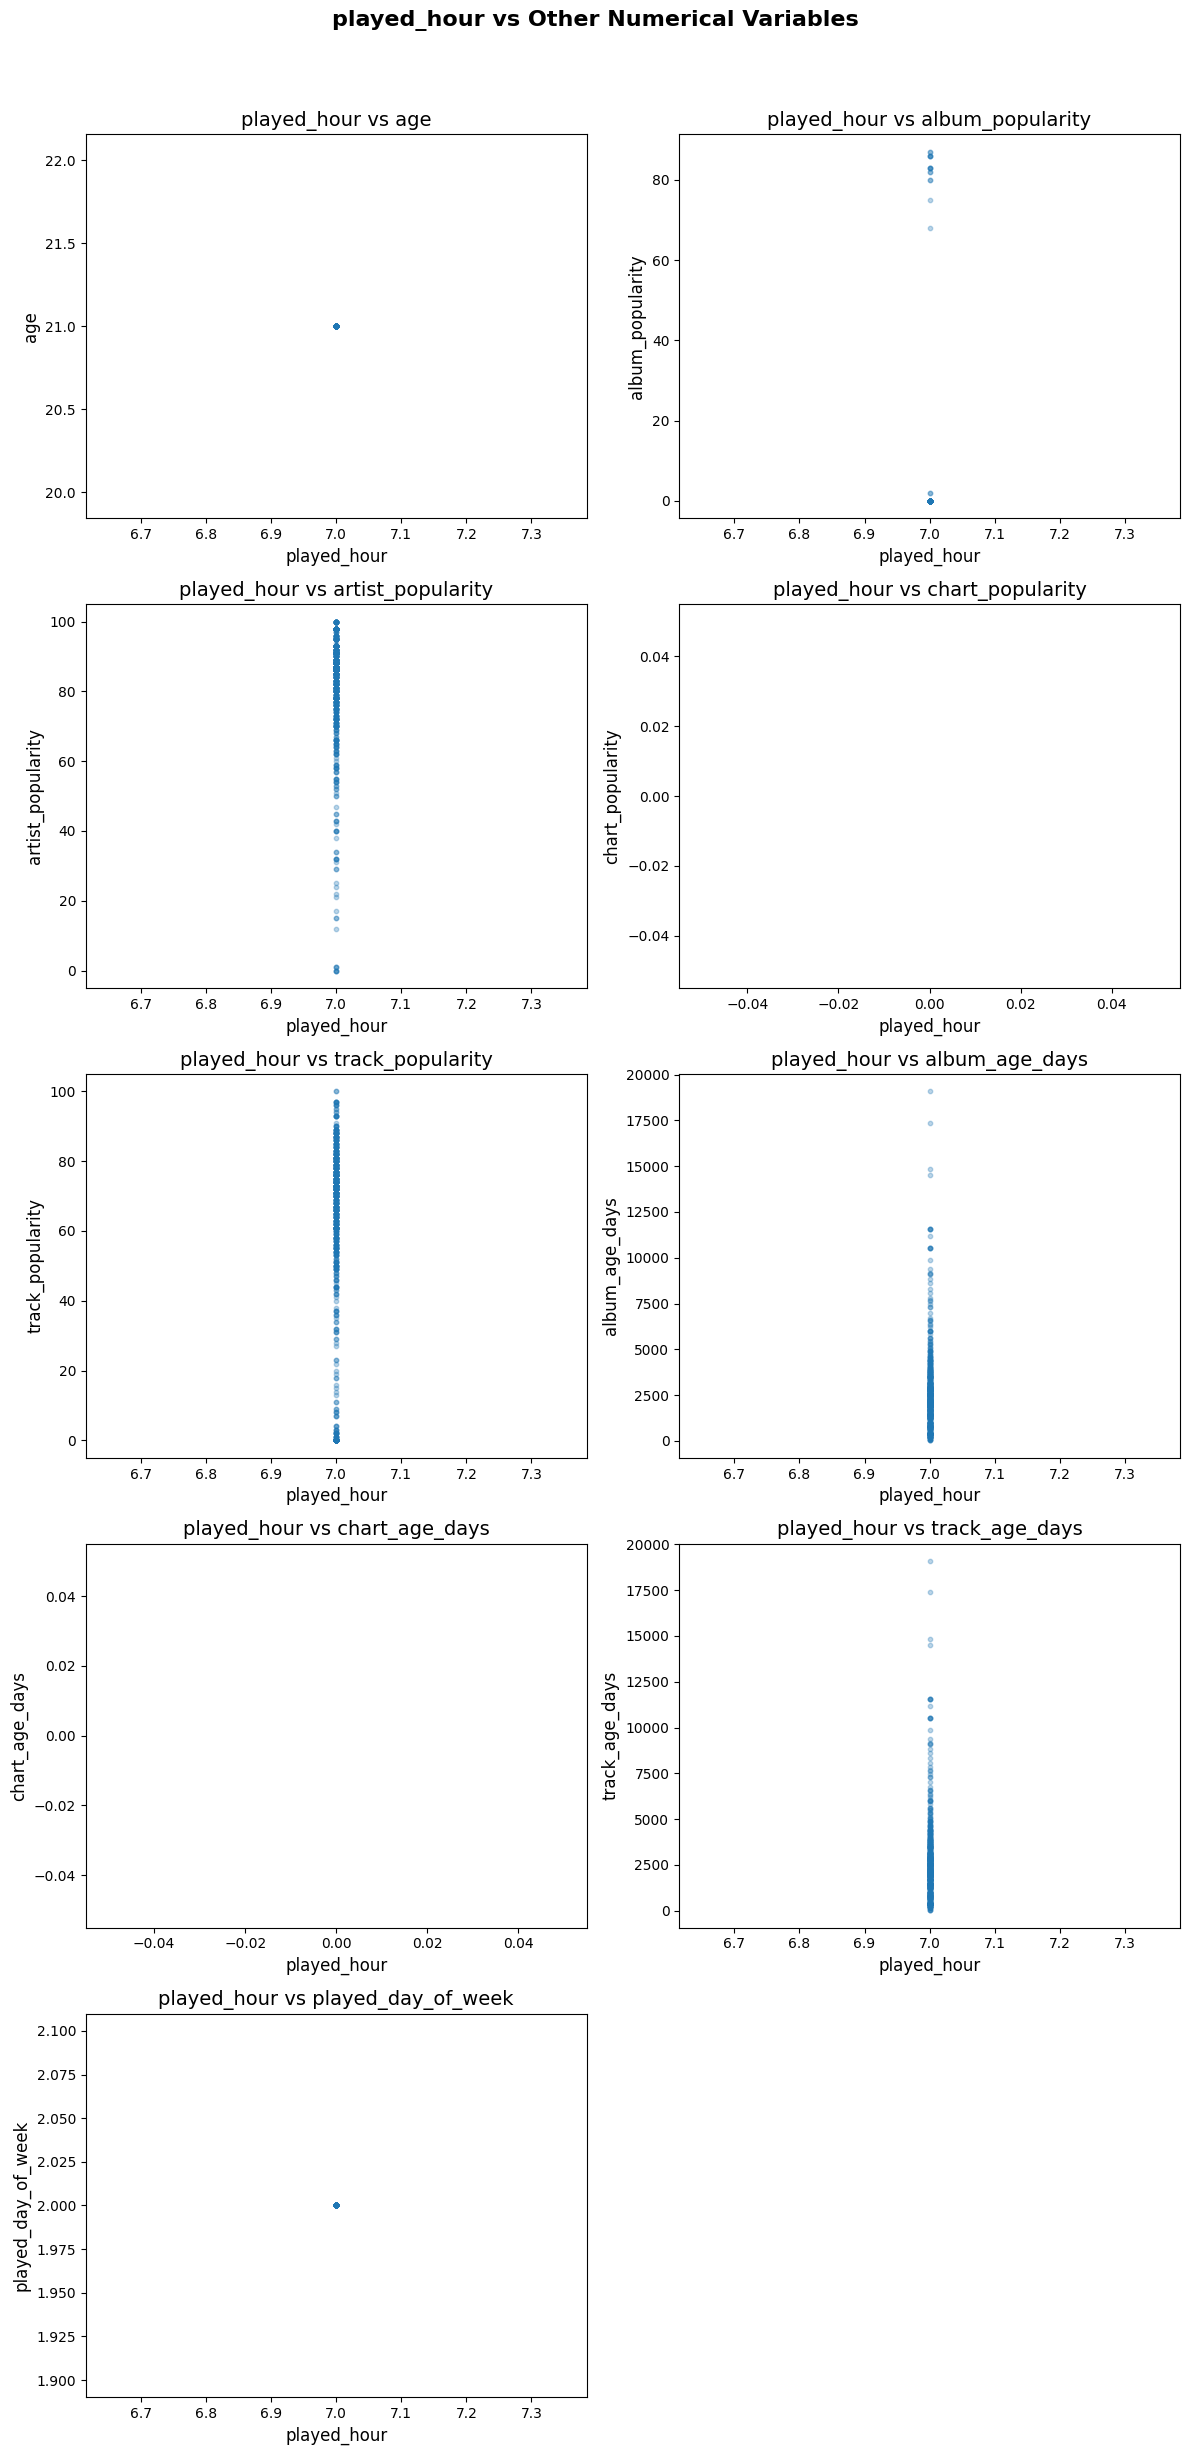

In [93]:
for col in numerical_columns:
    bivariate_analysis_num_vs_num(col, numerical_columns)

#### **Categorical vs Categorical Variables**


In [99]:
def bivariate_analysis_cat_vs_cat(target, categorical_columns, max_categories=10):
    """
    Analyze relationships between a categorical target column and other categorical columns.
    Skips columns (including target) with more than `max_categories` unique categories to avoid clutter.

    Parameters:
    - target: The categorical column to compare against others.
    - categorical_columns: List of categorical column names.
    - max_categories: Max number of categories to include in plots (default 10).
    """

    # Check target unique values first
    target_unique = algorhythm_df[target].nunique()
    if target_unique > max_categories:
        print(f"Target column '{target}' has {target_unique} unique values which is > {max_categories}. Skipping analysis.")
        return

    # Filter other categorical columns by unique counts
    cats = [
        col for col in categorical_columns
        if col != target and algorhythm_df[col].nunique() <= max_categories
    ]

    if not cats:
        print(f"No categorical columns with <= {max_categories} unique values to plot against '{target}'.")
        return

    plt.figure(figsize=(5 * len(cats), 5))  # Dynamic figure size based on number of columns
    plt.suptitle(f"{target} vs Other Categorical Variables", fontsize=14, fontweight="bold")

    for i, col in enumerate(cats, 1):
        plt.subplot(1, len(cats), i)

        cross_tab = pd.crosstab(algorhythm_df[target], algorhythm_df[col])
        cross_tab = cross_tab.apply(pd.to_numeric, errors='coerce').fillna(0)

        if cross_tab.values.sum() == 0:
            print(f"Skipping plot for {target} vs {col} due to no data")
            continue

        cross_tab.plot(
            kind="bar", stacked=True, ax=plt.gca(), colormap="coolwarm", legend=False
        )
        plt.title(f"{target} vs {col}")
        plt.xlabel(col)
        plt.ylabel("Count")

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    # Display crosstab tables with heatmap style for all columns considered
    for col in cats:
        display(
            pd.crosstab(algorhythm_df[target], algorhythm_df[col], margins=True)
            .style.background_gradient(cmap="coolwarm")
            .set_caption(f"Crosstab Heatmap: {target} vs {col}")
        )

Target column 'album_name' has 1326 unique values which is > 10. Skipping analysis.
Target column 'artist_genres' has 171 unique values which is > 10. Skipping analysis.
Target column 'artist_name' has 608 unique values which is > 10. Skipping analysis.
Skipping plot for chart_chart_name vs gender due to no data
Skipping plot for chart_chart_name vs location due to no data
Skipping plot for chart_chart_name vs music_profile due to no data


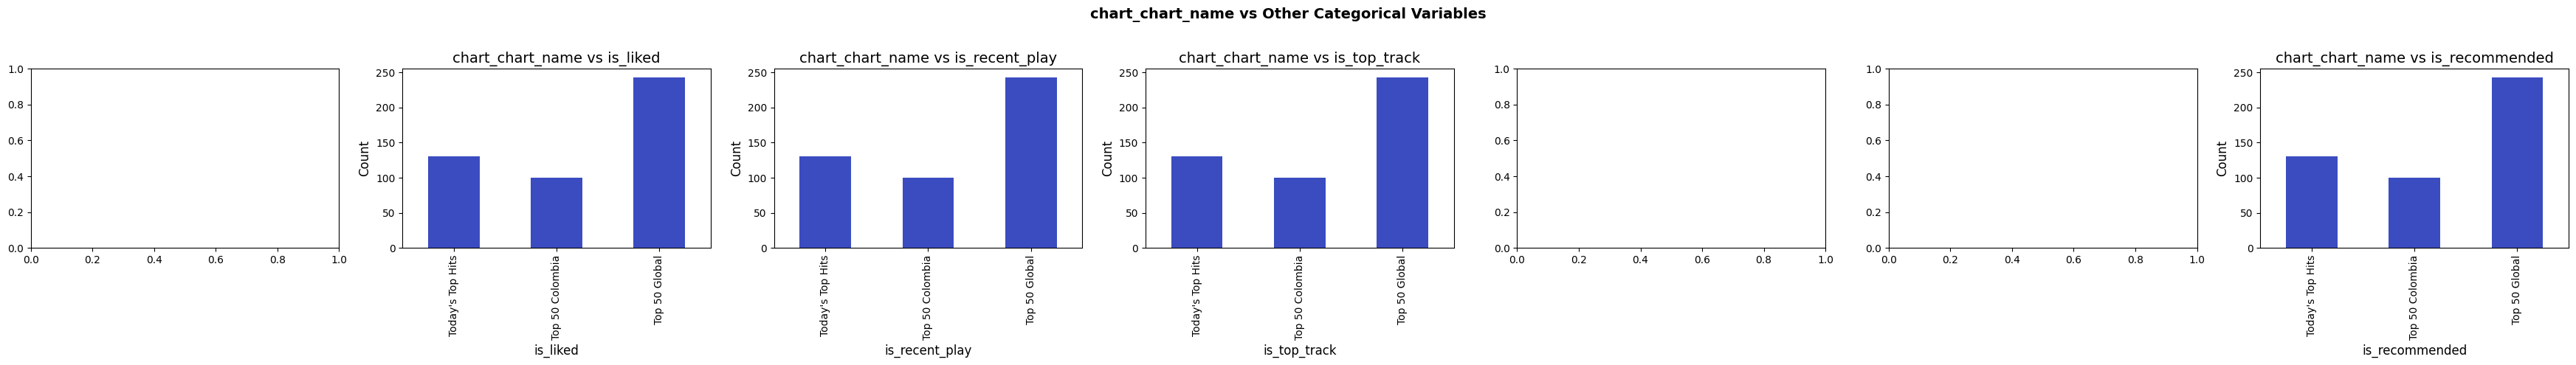

Target column 'chart_genres' has 65 unique values which is > 10. Skipping analysis.
Target column 'chart_track_name' has 440 unique values which is > 10. Skipping analysis.
Target column 'chart_position' has 243 unique values which is > 10. Skipping analysis.
Skipping plot for gender vs chart_chart_name due to no data


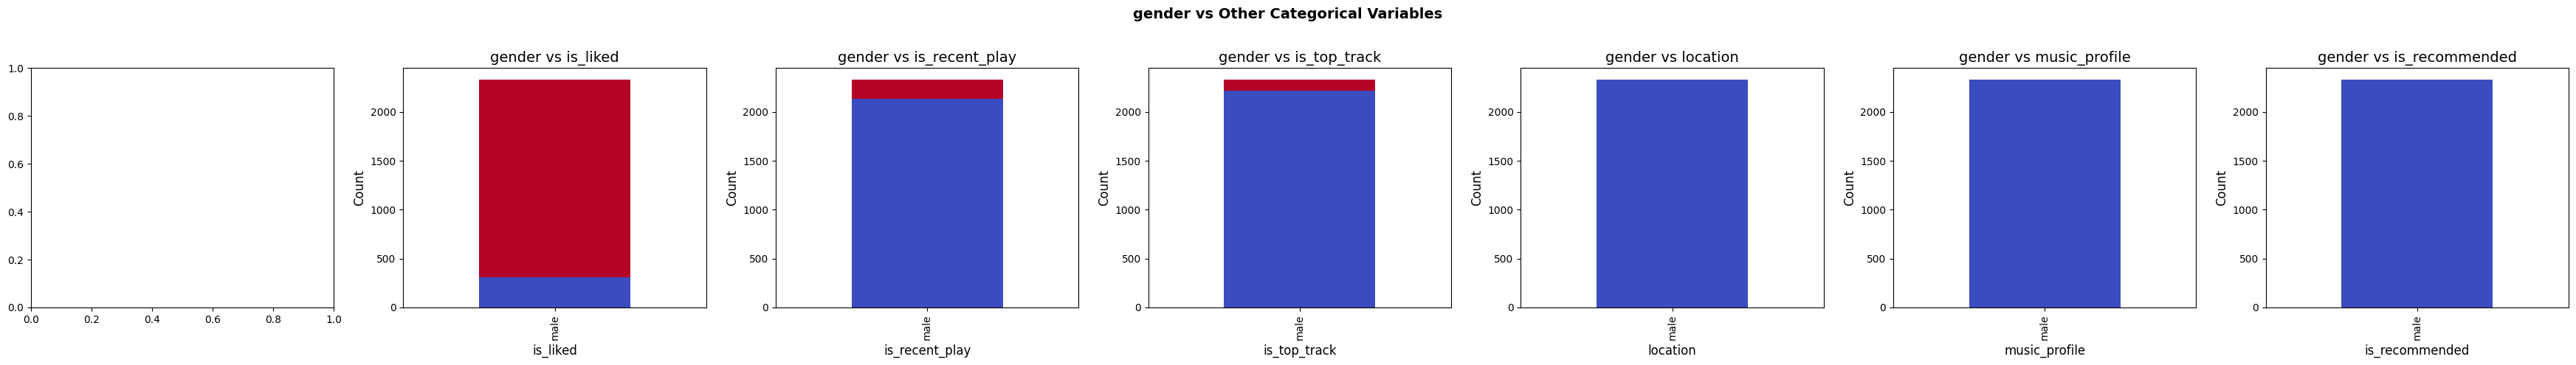

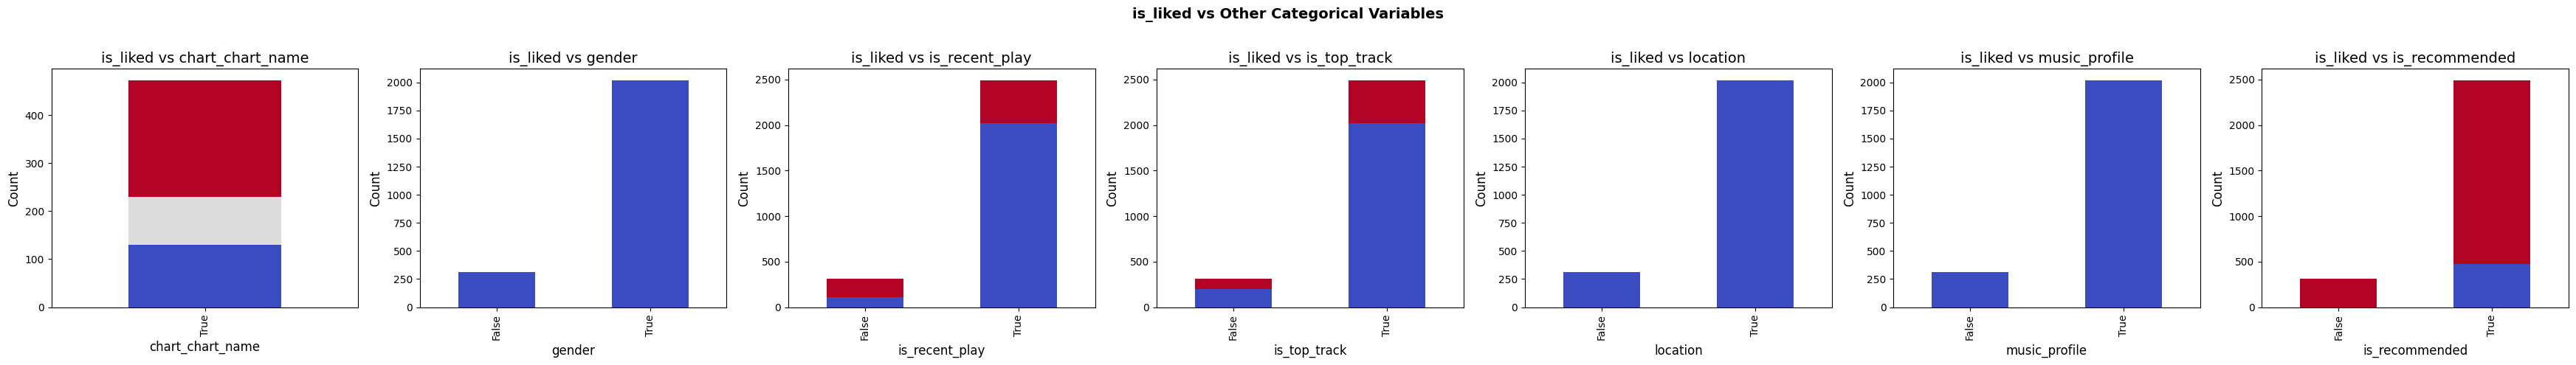

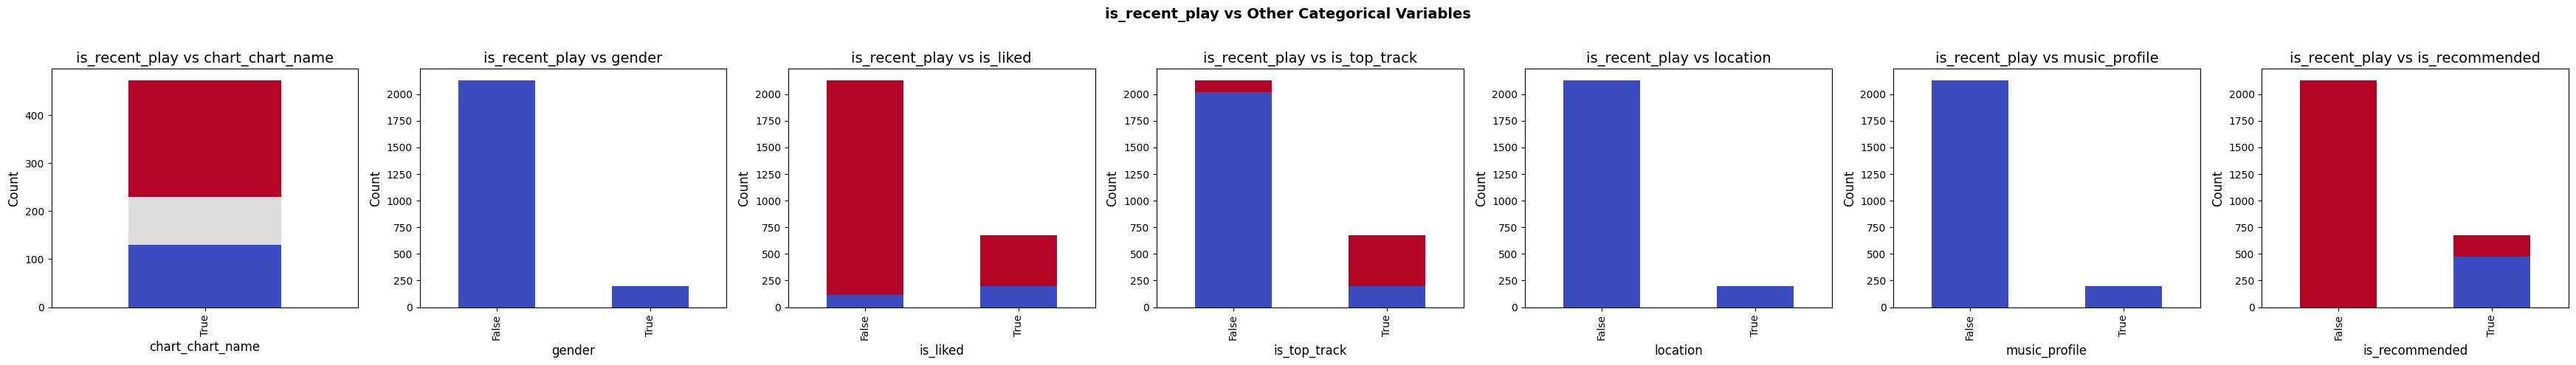

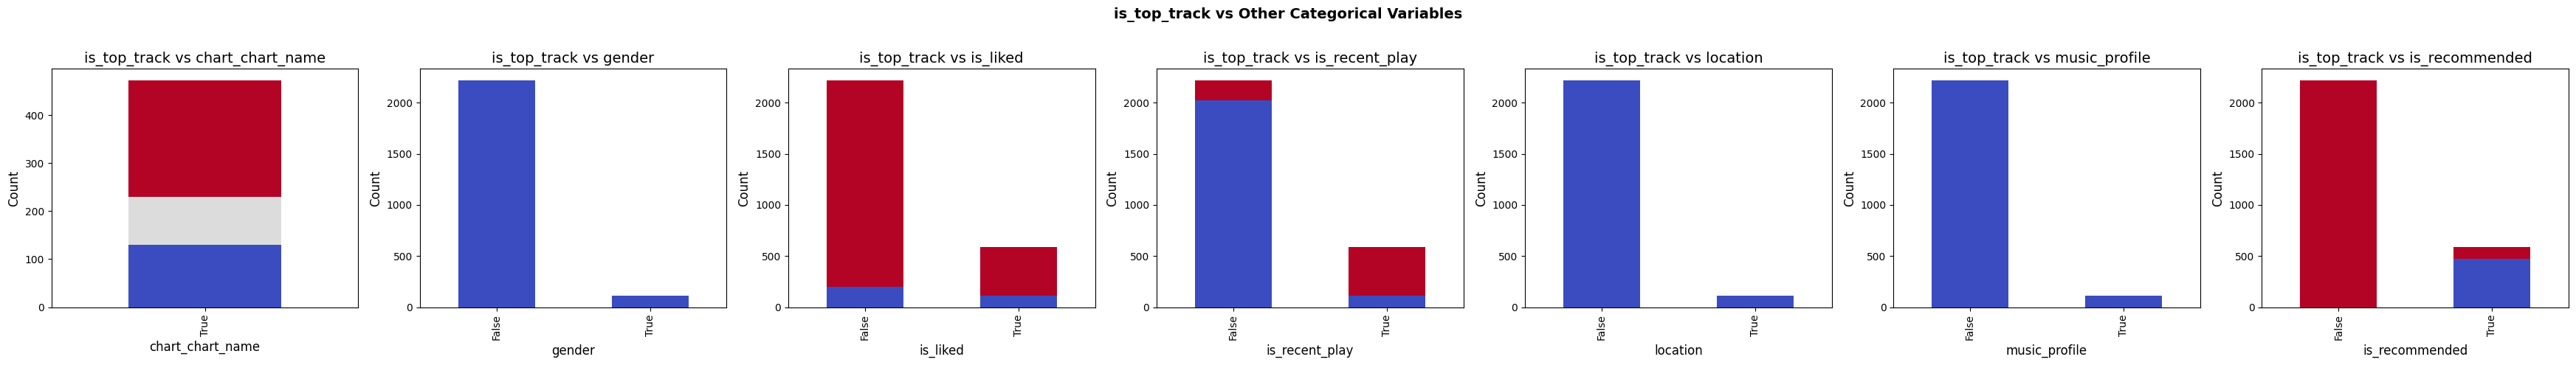

Skipping plot for location vs chart_chart_name due to no data


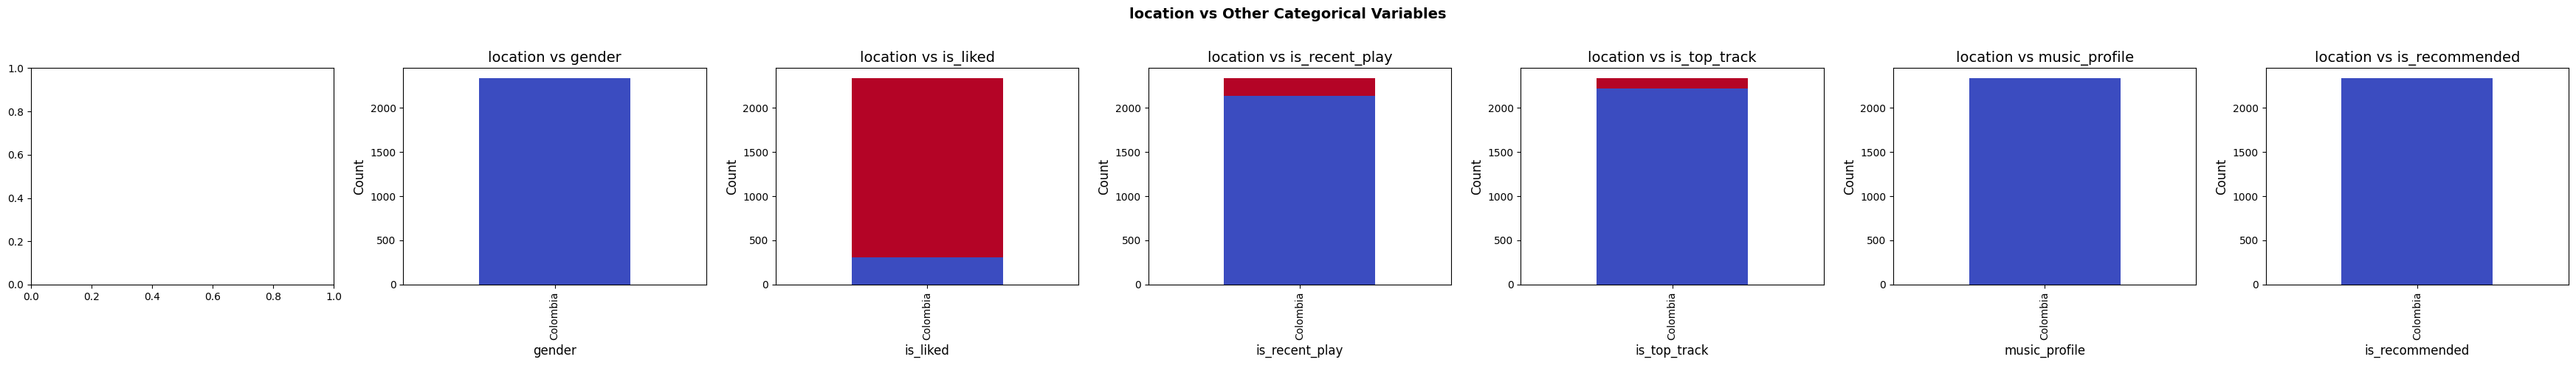

Skipping plot for music_profile vs chart_chart_name due to no data


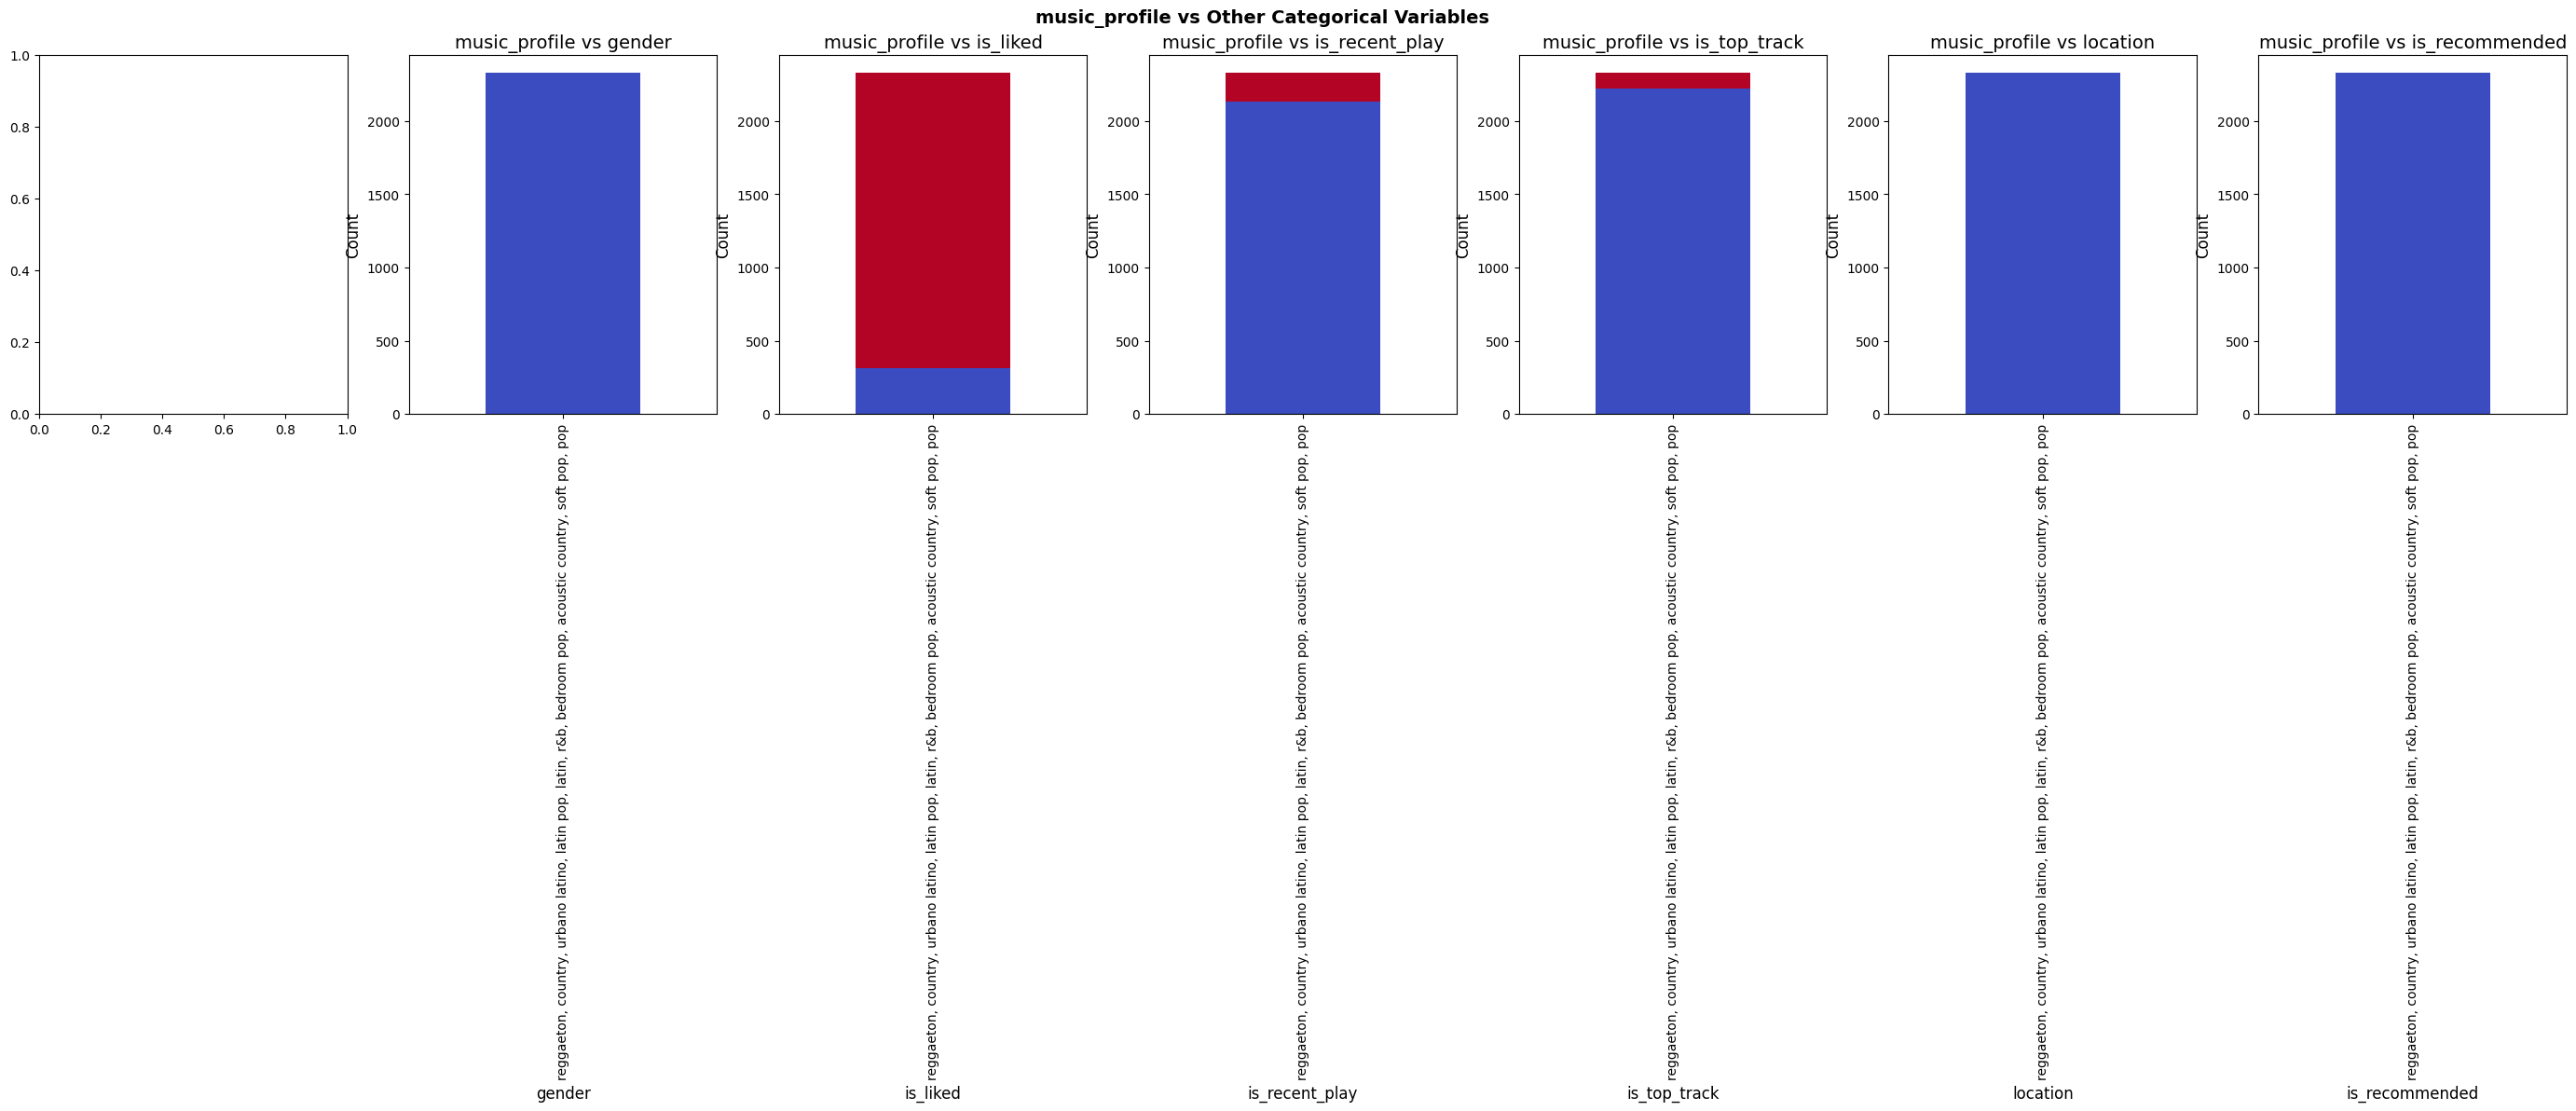

Target column 'track_name' has 1886 unique values which is > 10. Skipping analysis.


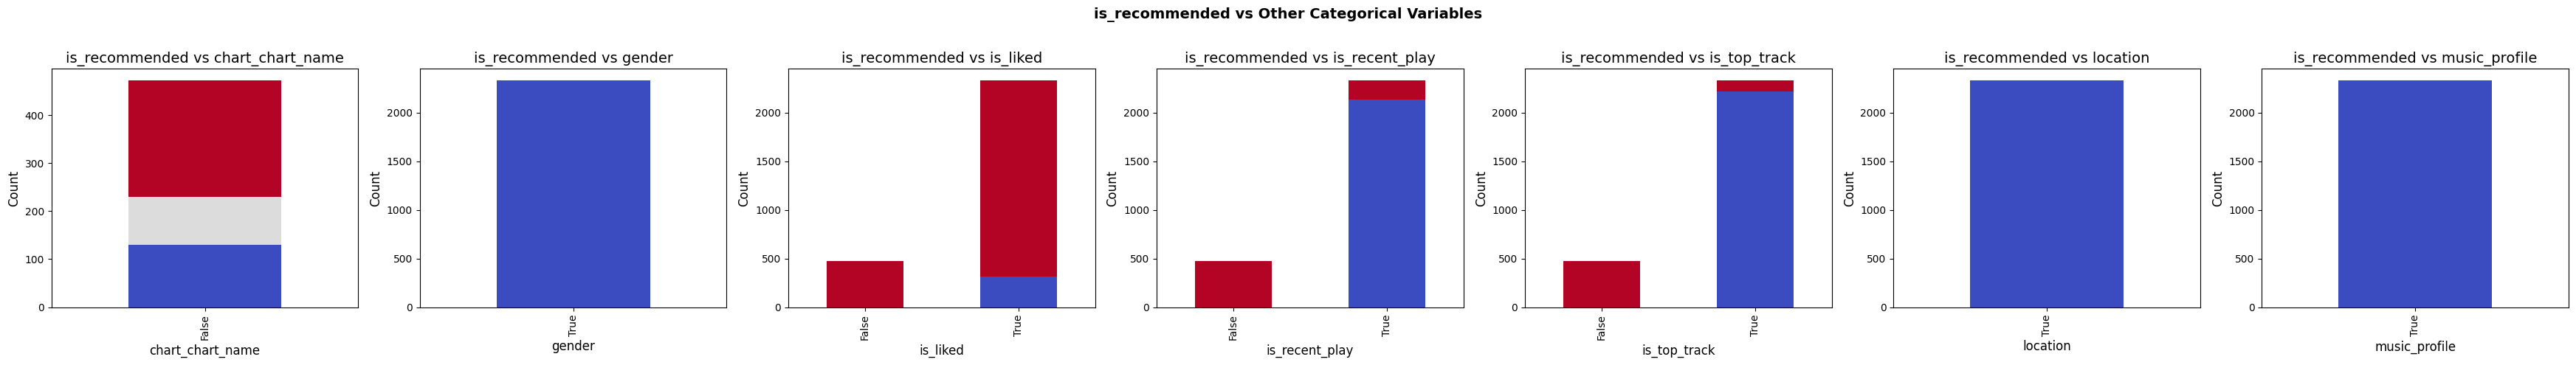

In [100]:
for col in categorical_columns:
    bivariate_analysis_cat_vs_cat(col, categorical_columns)

#### **Categorical vs Numerical Variables**


In [103]:
def bivariate_analysis_num_vs_cat(numerical_column, categorical_columns, max_categories=10):
    """
    Function to plot bivariate analysis between a numerical column and multiple categorical columns.
    Skips categorical columns with more than `max_categories` unique categories to avoid clutter.

    Parameters:
    - numerical_column: The numerical column to compare against categorical columns.
    - categorical_columns: List of categorical column names.
    - max_categories: Max number of unique categories allowed for plotting (default 10).
    """

    for cat_col in categorical_columns:
        # Skip high cardinality categorical columns
        n_unique = algorhythm_df[cat_col].nunique(dropna=True)
        if n_unique > max_categories:
            print(f"Skipping {cat_col} (unique categories: {n_unique} > {max_categories})")
            continue

        plt.figure(figsize=(8, 3))
        plt.suptitle(f"{numerical_column} vs {cat_col}", fontsize=12, fontweight="bold")

        # Boxplot: distribution of numerical column by categories
        plt.subplot(1, 2, 1)
        sns.boxplot(x=algorhythm_df[cat_col], y=algorhythm_df[numerical_column])
        plt.title("Boxplot", fontsize=9)
        plt.xlabel(cat_col, fontsize=9)
        plt.ylabel(numerical_column, fontsize=9)
        plt.xticks(rotation=45)

        # Barplot: mean numerical value per category with confidence intervals
        plt.subplot(1, 2, 2)
        sns.barplot(
            data=algorhythm_df,
            x=cat_col,
            y=numerical_column,
            ci=95,          # Confidence interval for error bars
            capsize=0.05,
            palette="coolwarm",
            errcolor='gray',
            errwidth=1,
        )
        plt.title("Mean and CI", fontsize=10)
        plt.xlabel(cat_col, fontsize=9)
        plt.ylabel(f"Mean {numerical_column}", fontsize=9)
        plt.xticks(rotation=45)
        plt.legend([], [], frameon=False)  # Hide legend as hue is same as x-axis

        # Adjust spacing for compactness and avoid label overlap
        plt.subplots_adjust(wspace=0.4, hspace=0.4)
        plt.tight_layout(rect=[0, 0, 1, 0.95])

        plt.show()

    return None

Skipping album_name (unique categories: 1326 > 10)
Skipping artist_genres (unique categories: 171 > 10)
Skipping artist_name (unique categories: 608 > 10)


/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1409: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


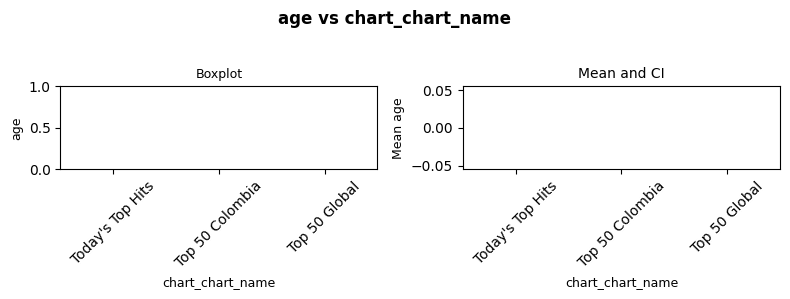

Skipping chart_genres (unique categories: 65 > 10)
Skipping chart_track_name (unique categories: 440 > 10)
Skipping chart_position (unique categories: 243 > 10)


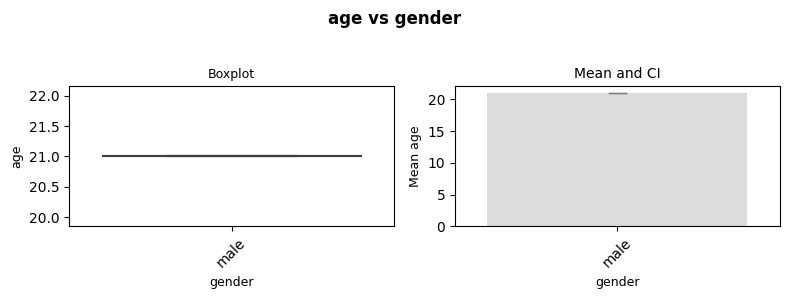

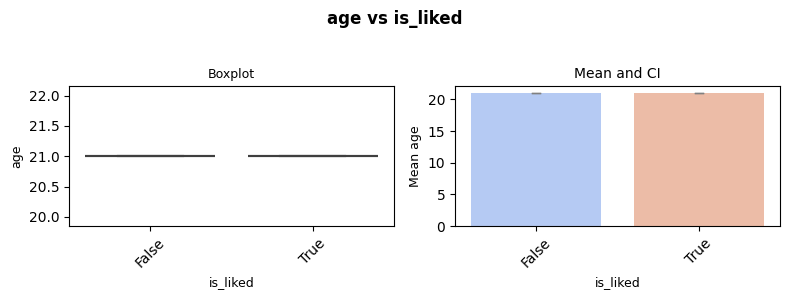

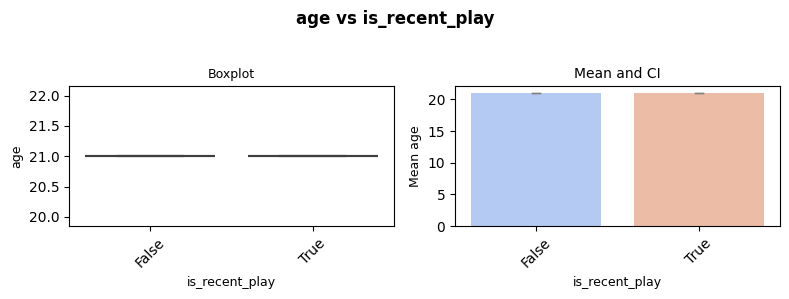

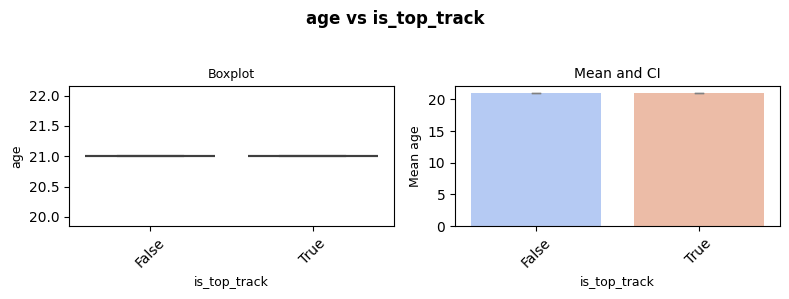

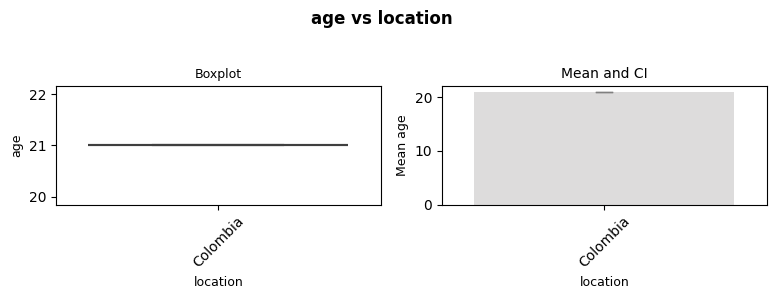

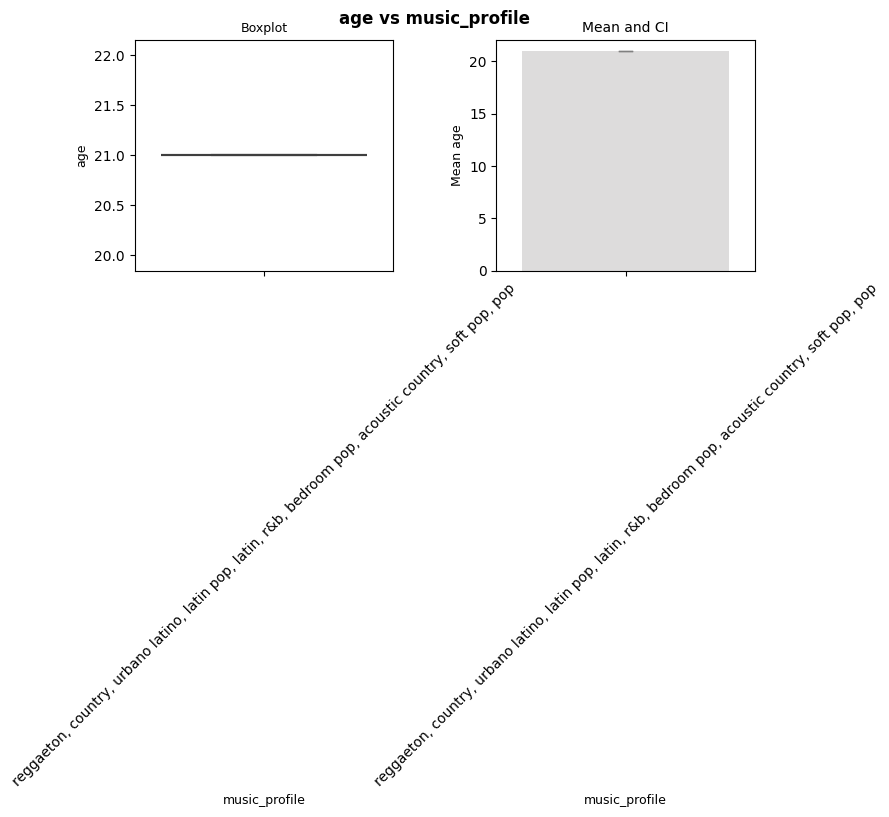

Skipping track_name (unique categories: 1886 > 10)


/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1409: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


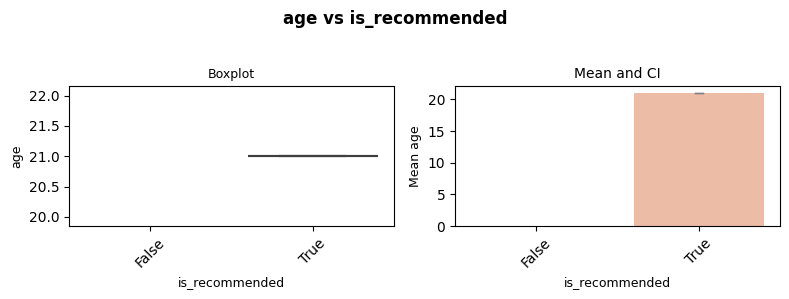

Skipping album_name (unique categories: 1326 > 10)
Skipping artist_genres (unique categories: 171 > 10)
Skipping artist_name (unique categories: 608 > 10)


/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1409: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


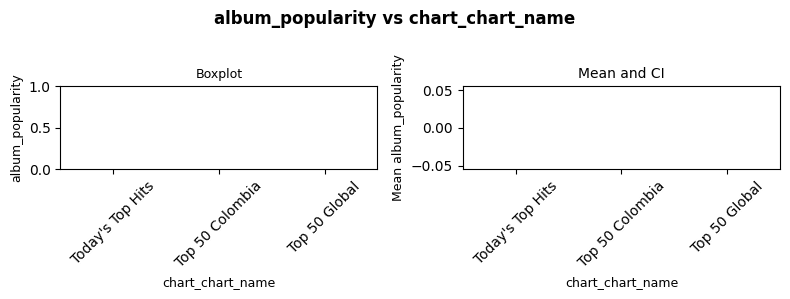

Skipping chart_genres (unique categories: 65 > 10)
Skipping chart_track_name (unique categories: 440 > 10)
Skipping chart_position (unique categories: 243 > 10)


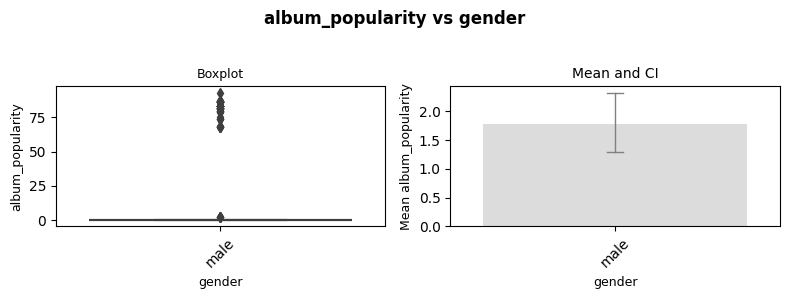

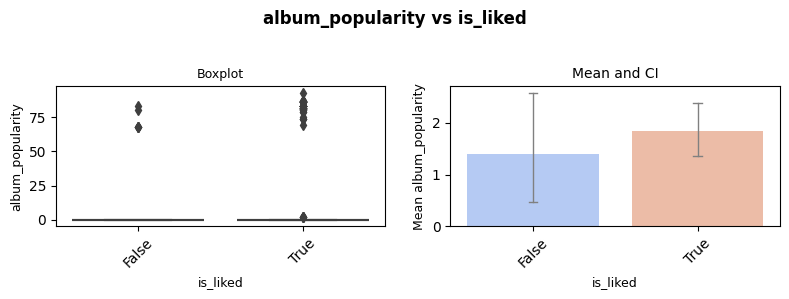

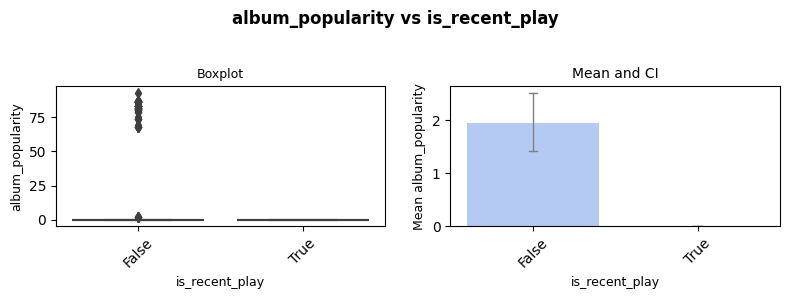

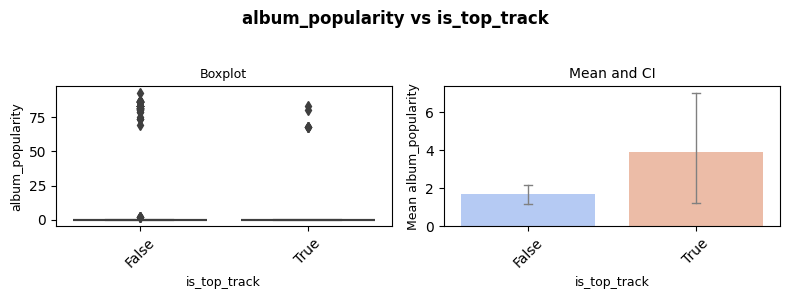

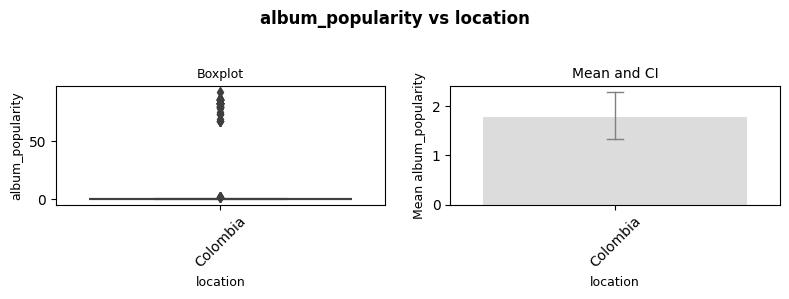

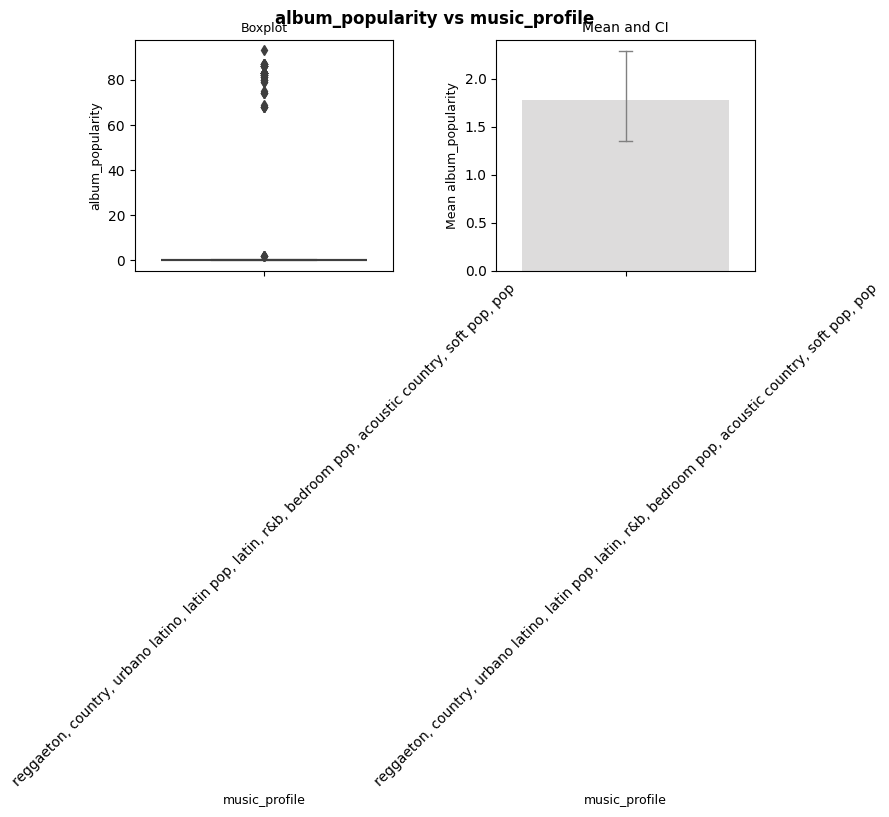

Skipping track_name (unique categories: 1886 > 10)


/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1409: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


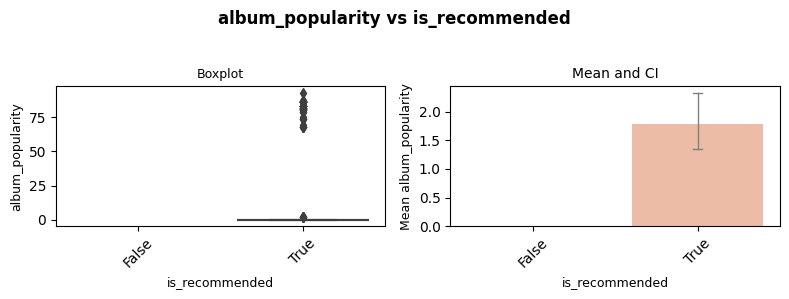

Skipping album_name (unique categories: 1326 > 10)
Skipping artist_genres (unique categories: 171 > 10)
Skipping artist_name (unique categories: 608 > 10)


/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1409: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


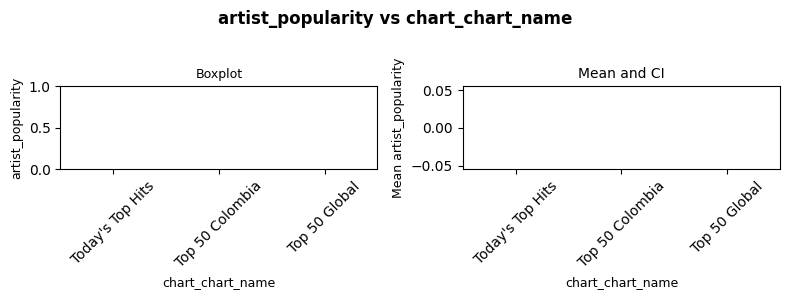

Skipping chart_genres (unique categories: 65 > 10)
Skipping chart_track_name (unique categories: 440 > 10)
Skipping chart_position (unique categories: 243 > 10)


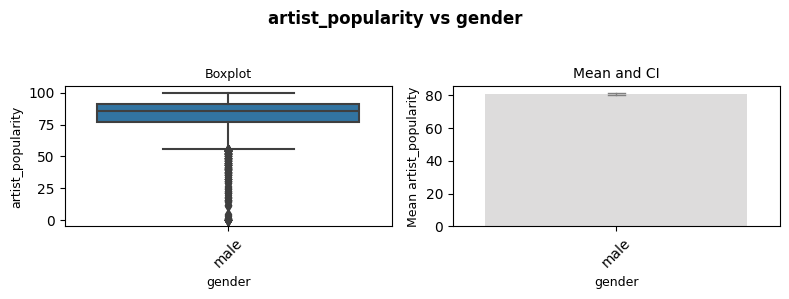

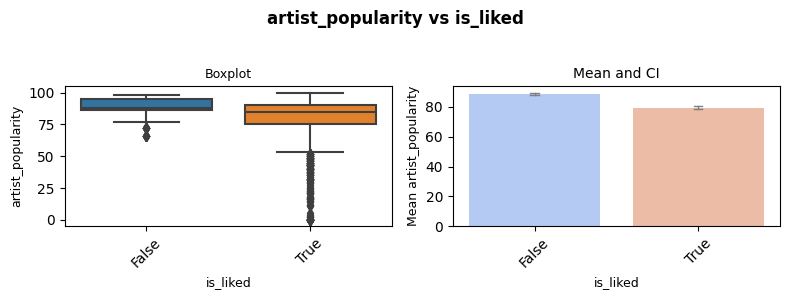

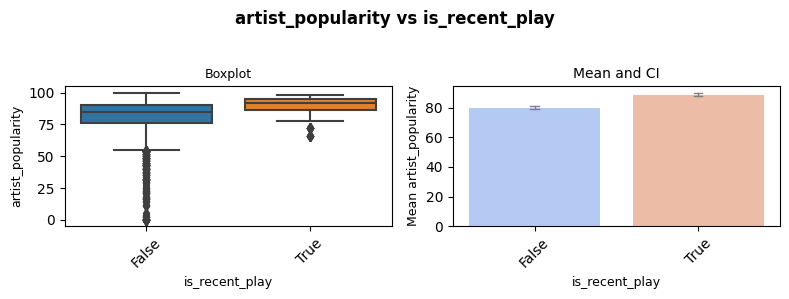

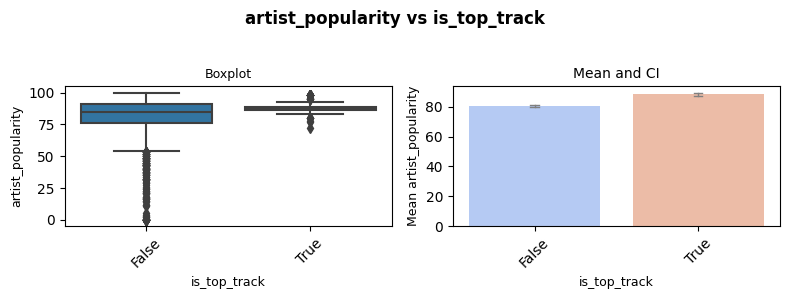

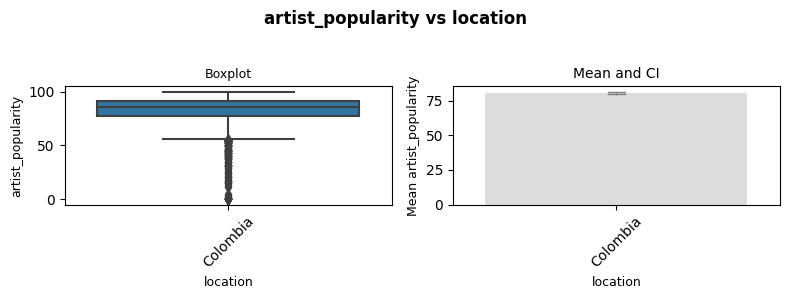

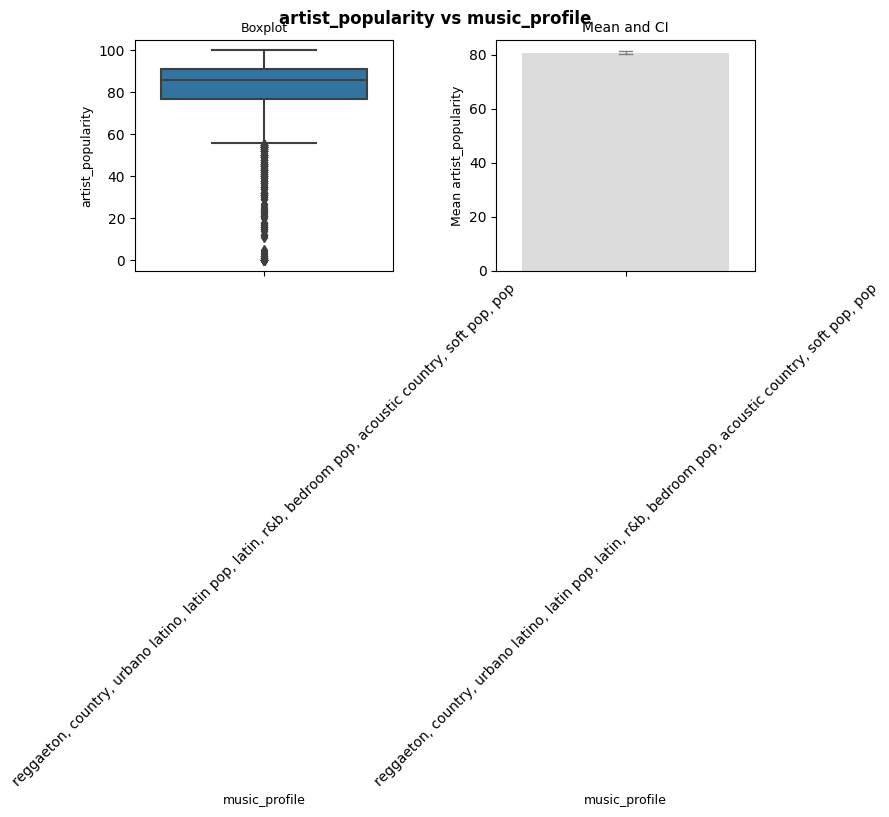

Skipping track_name (unique categories: 1886 > 10)


/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1409: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


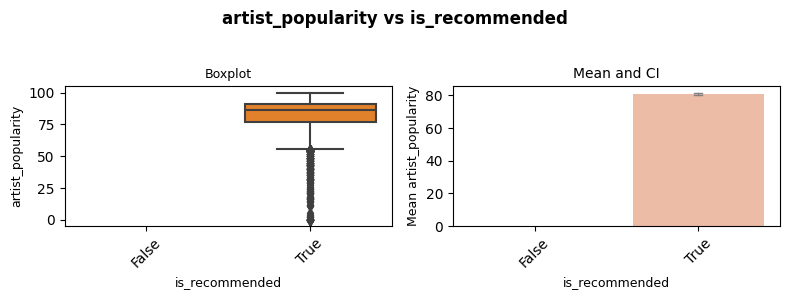

Skipping album_name (unique categories: 1326 > 10)
Skipping artist_genres (unique categories: 171 > 10)
Skipping artist_name (unique categories: 608 > 10)


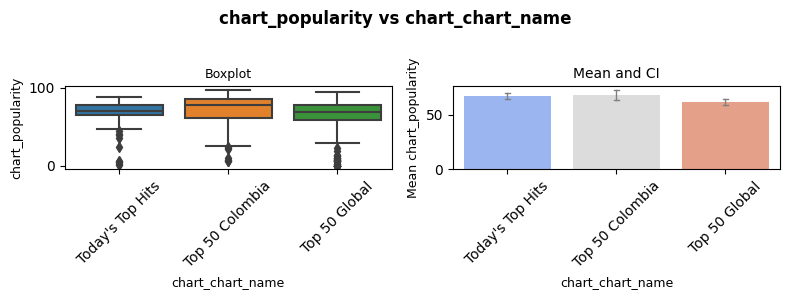

Skipping chart_genres (unique categories: 65 > 10)
Skipping chart_track_name (unique categories: 440 > 10)
Skipping chart_position (unique categories: 243 > 10)


/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1409: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


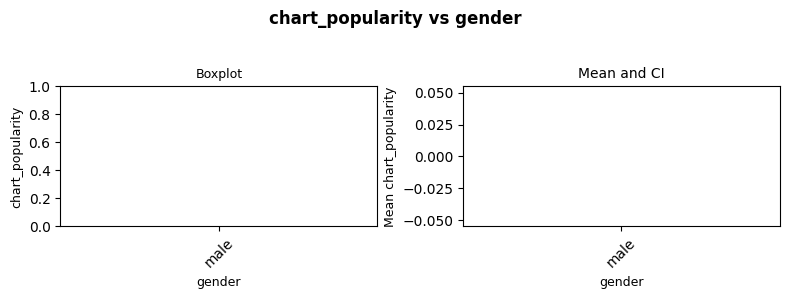

/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1409: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


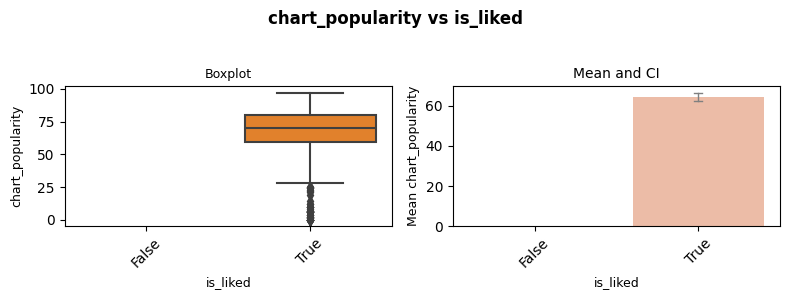

/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1409: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


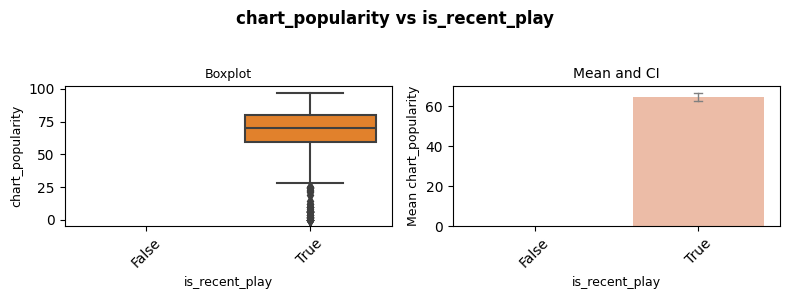

/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1409: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


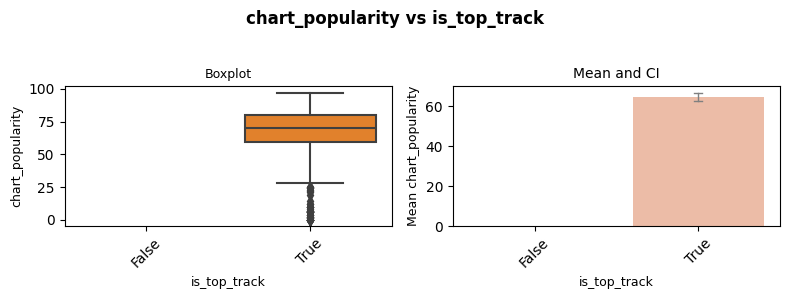

/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1409: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


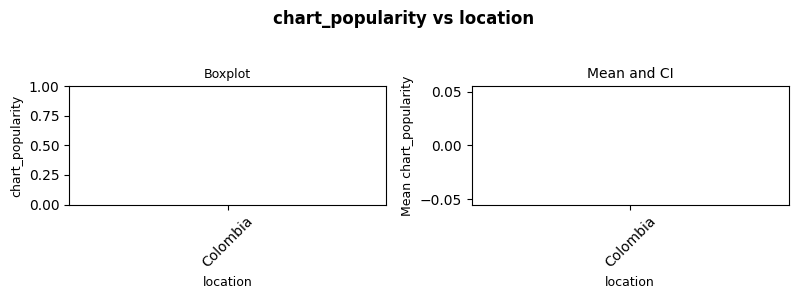

/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1409: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


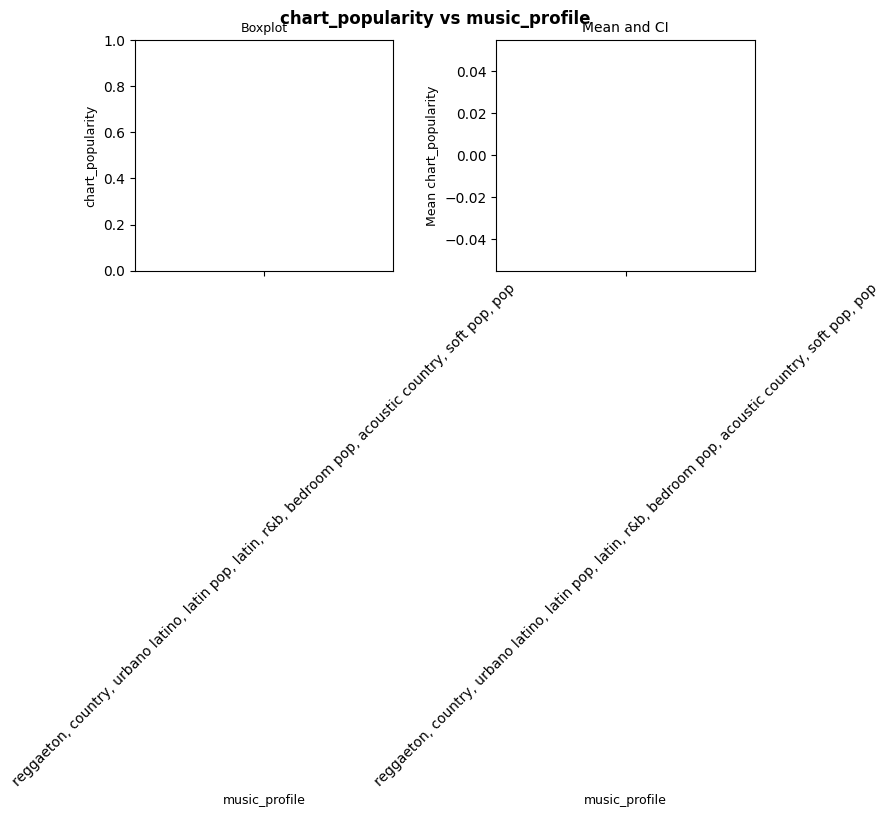

/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1409: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


Skipping track_name (unique categories: 1886 > 10)


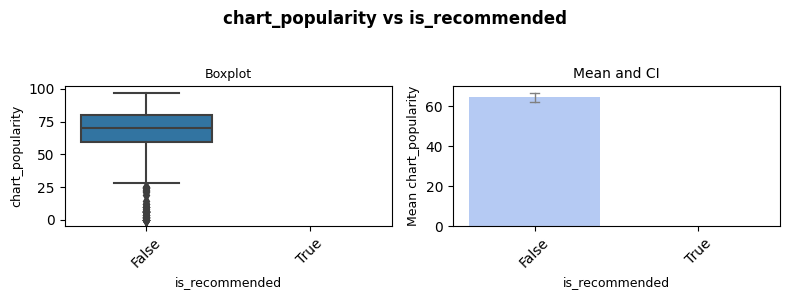

Skipping album_name (unique categories: 1326 > 10)
Skipping artist_genres (unique categories: 171 > 10)
Skipping artist_name (unique categories: 608 > 10)


/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1409: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


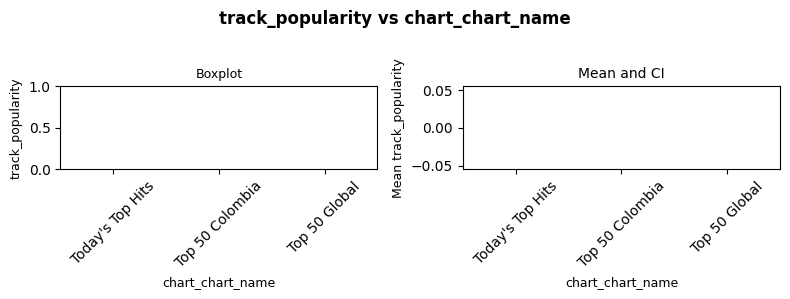

Skipping chart_genres (unique categories: 65 > 10)
Skipping chart_track_name (unique categories: 440 > 10)
Skipping chart_position (unique categories: 243 > 10)


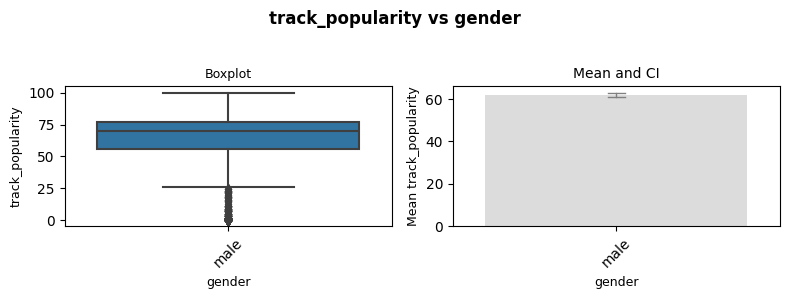

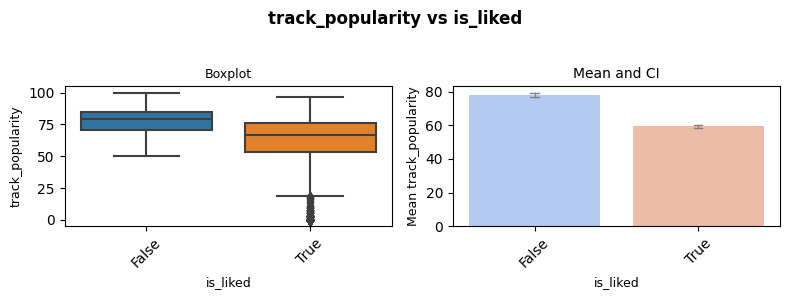

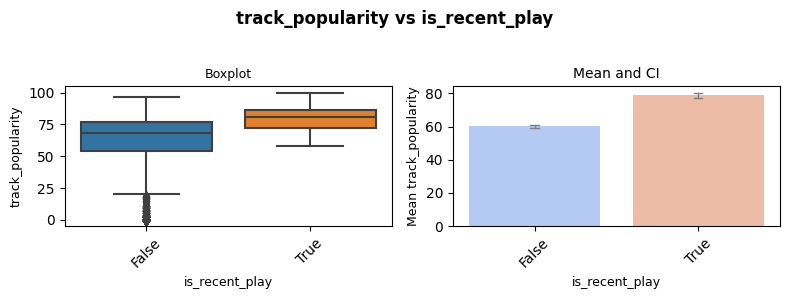

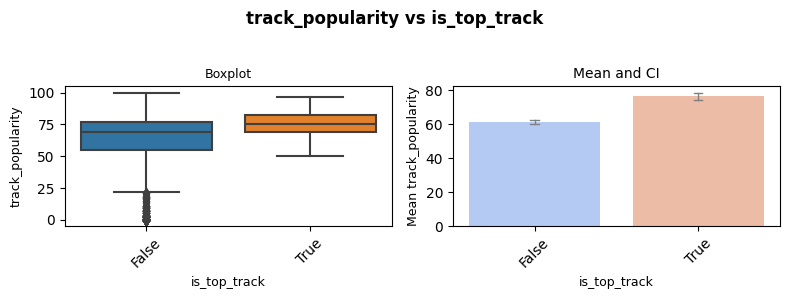

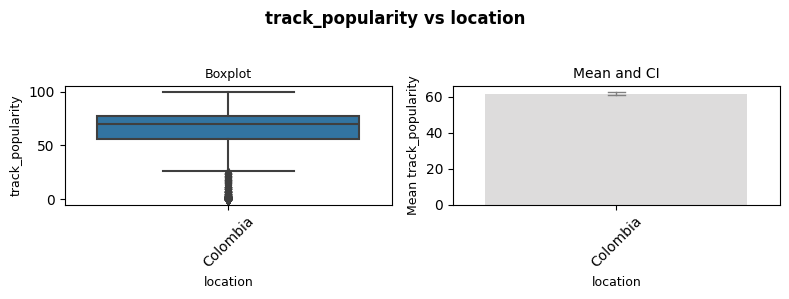

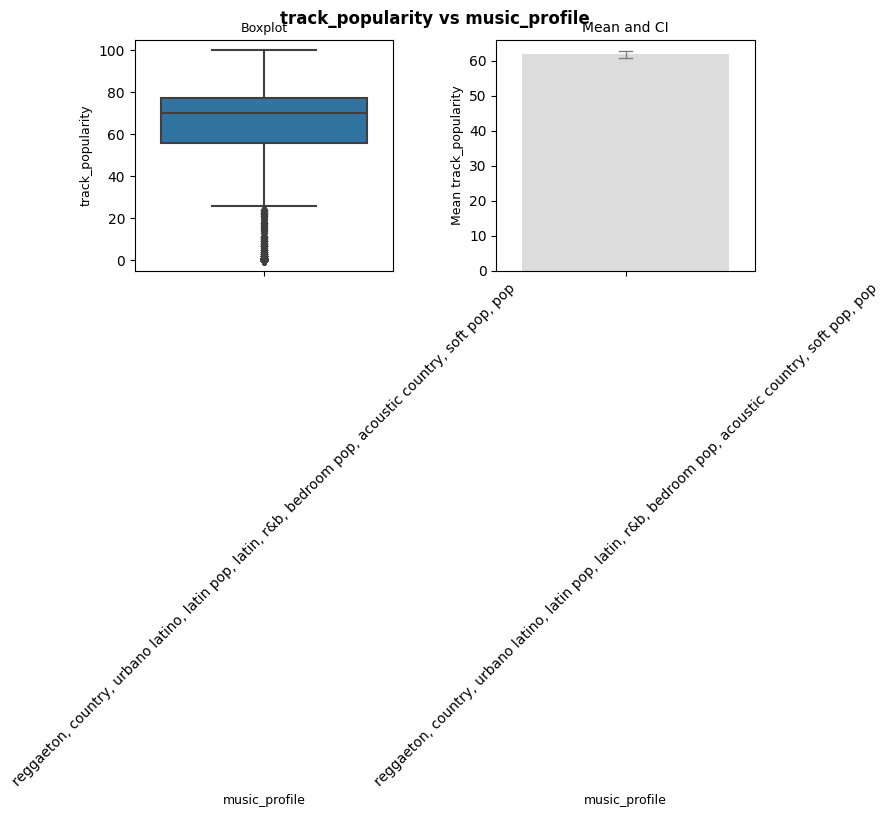

Skipping track_name (unique categories: 1886 > 10)


/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1409: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


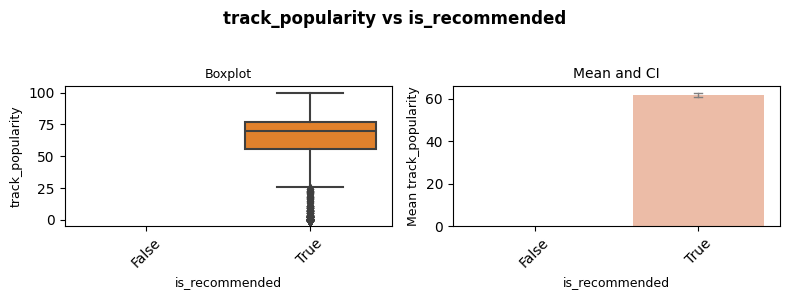

Skipping album_name (unique categories: 1326 > 10)
Skipping artist_genres (unique categories: 171 > 10)
Skipping artist_name (unique categories: 608 > 10)


/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1409: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


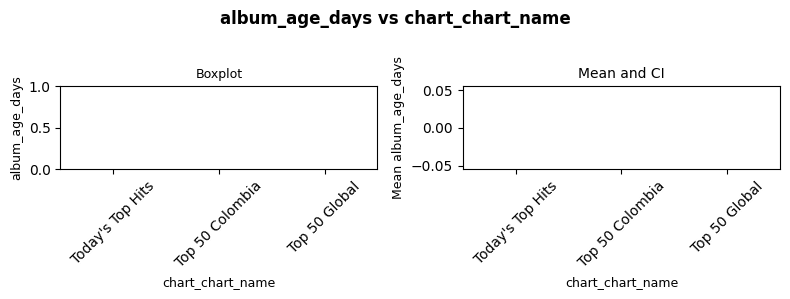

Skipping chart_genres (unique categories: 65 > 10)
Skipping chart_track_name (unique categories: 440 > 10)
Skipping chart_position (unique categories: 243 > 10)


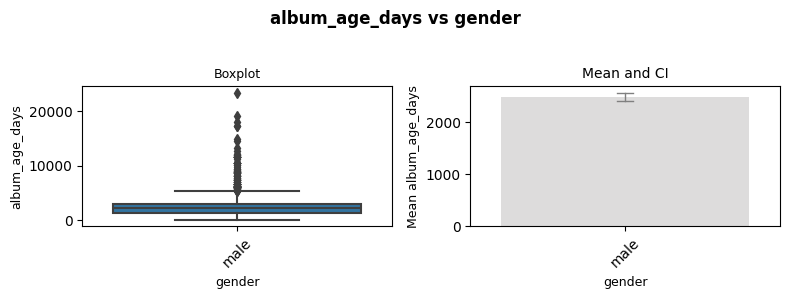

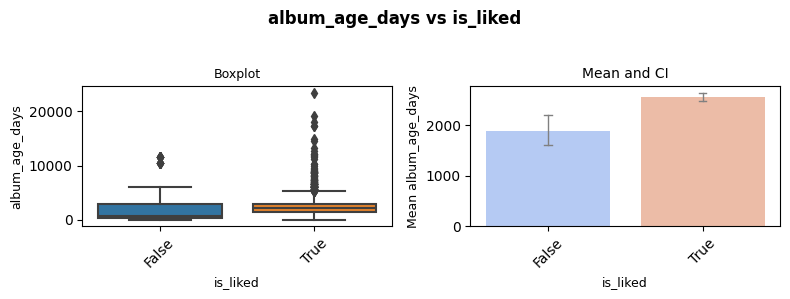

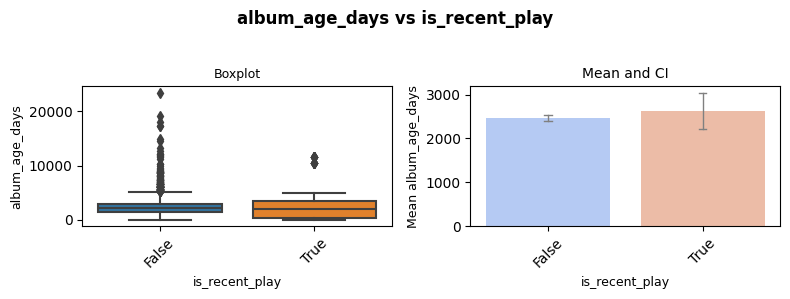

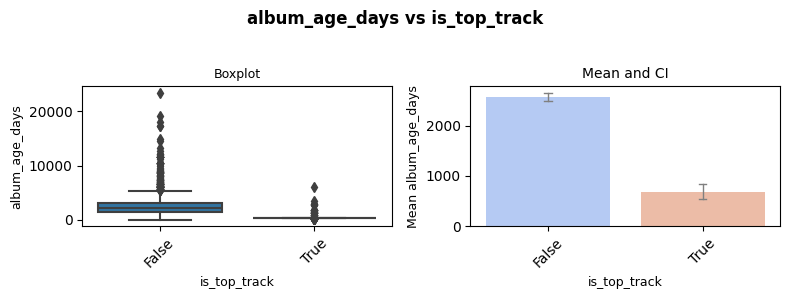

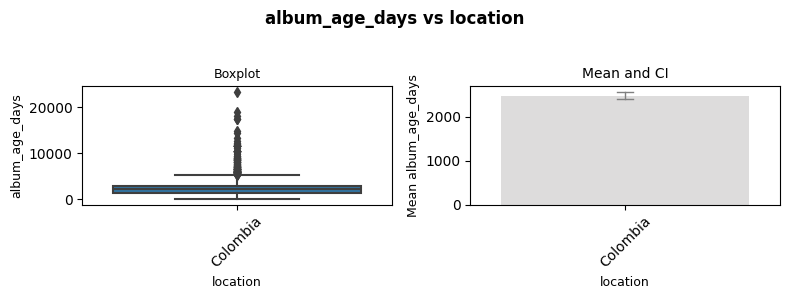

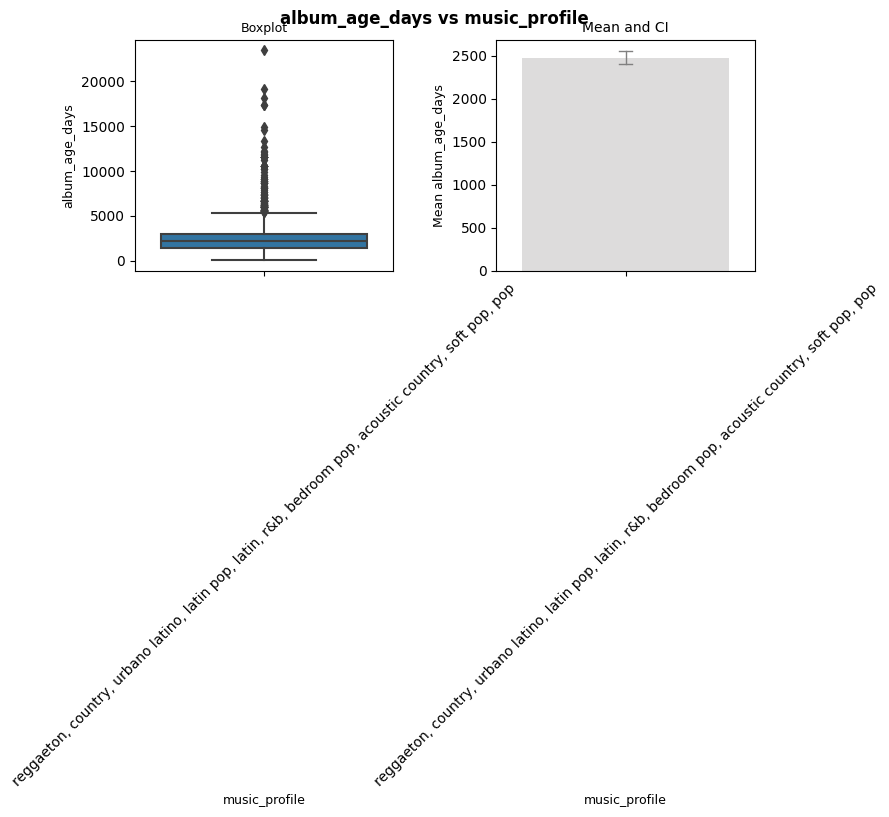

Skipping track_name (unique categories: 1886 > 10)


/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1409: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


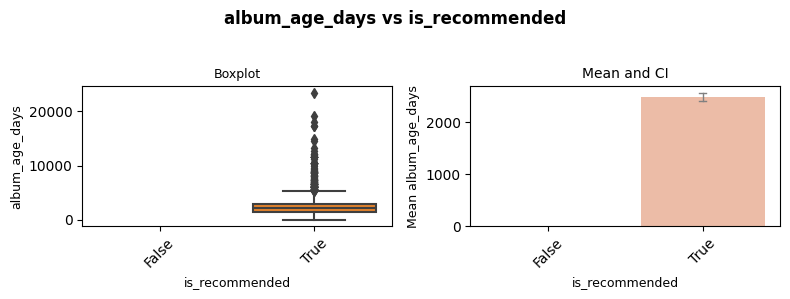

Skipping album_name (unique categories: 1326 > 10)
Skipping artist_genres (unique categories: 171 > 10)
Skipping artist_name (unique categories: 608 > 10)


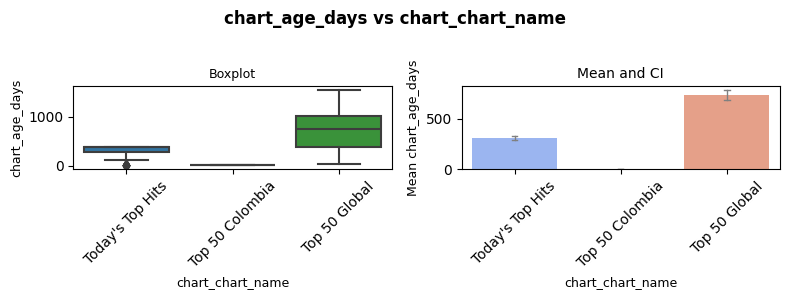

Skipping chart_genres (unique categories: 65 > 10)
Skipping chart_track_name (unique categories: 440 > 10)
Skipping chart_position (unique categories: 243 > 10)


/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1409: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


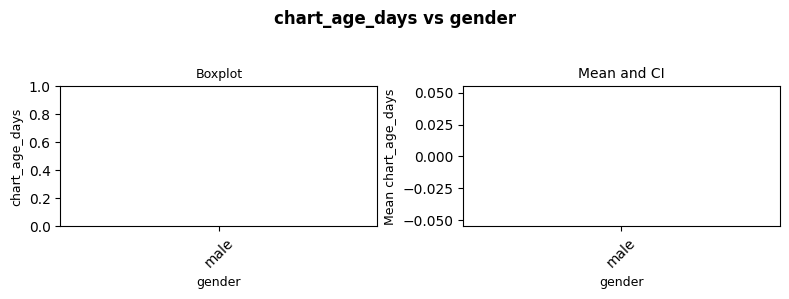

/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1409: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


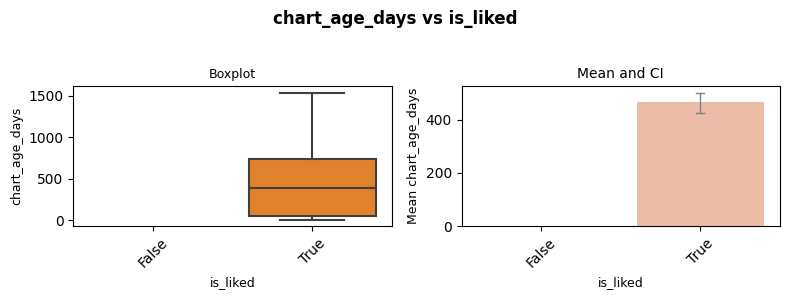

/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1409: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


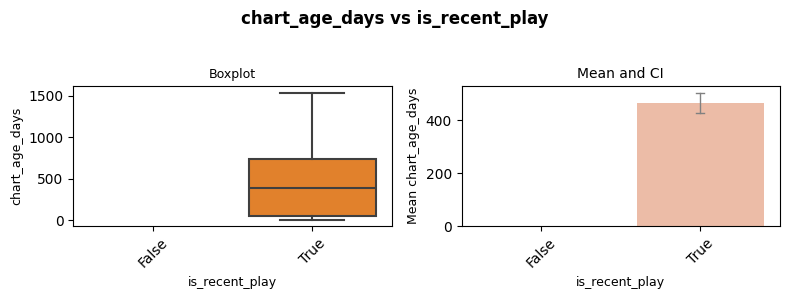

/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1409: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


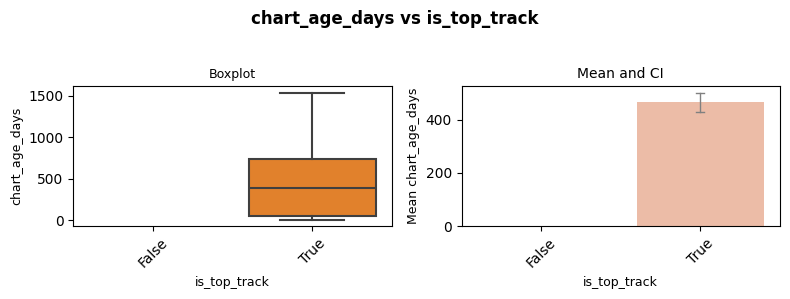

/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1409: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


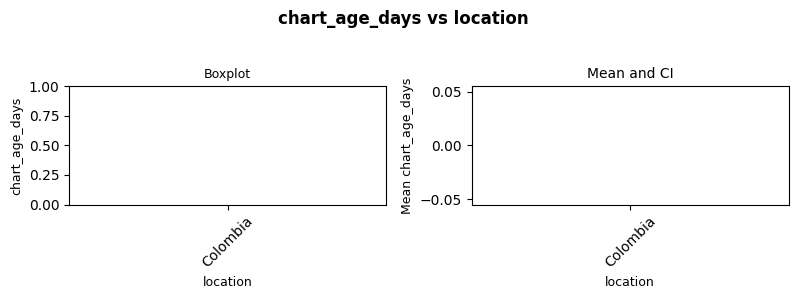

/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1409: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


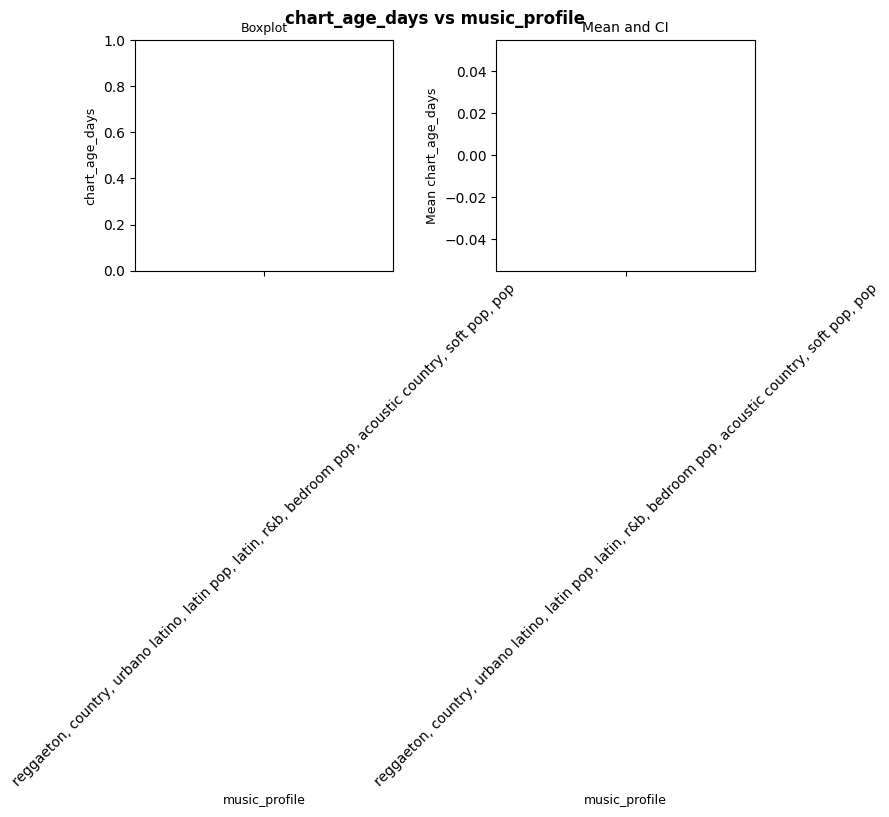

/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1409: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


Skipping track_name (unique categories: 1886 > 10)


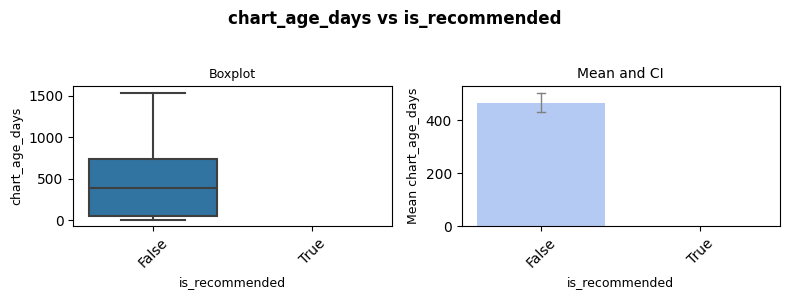

Skipping album_name (unique categories: 1326 > 10)
Skipping artist_genres (unique categories: 171 > 10)
Skipping artist_name (unique categories: 608 > 10)


/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1409: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


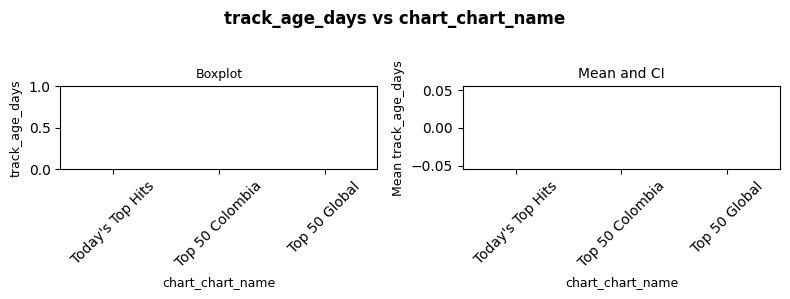

Skipping chart_genres (unique categories: 65 > 10)
Skipping chart_track_name (unique categories: 440 > 10)
Skipping chart_position (unique categories: 243 > 10)


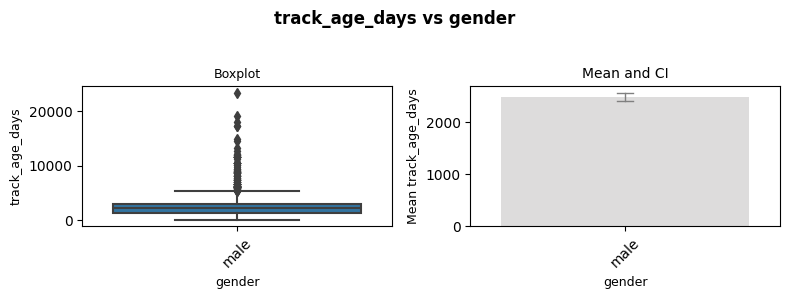

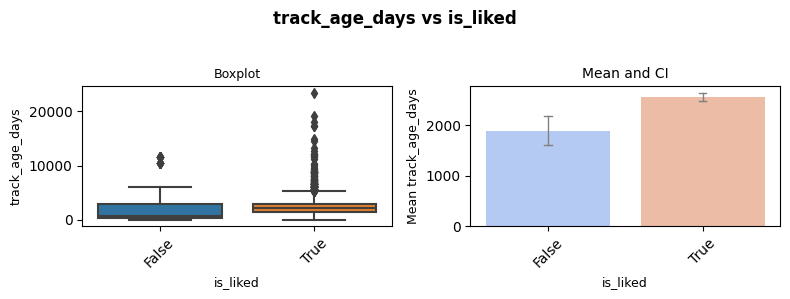

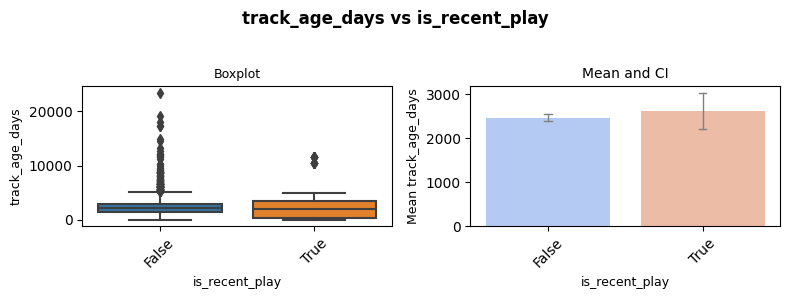

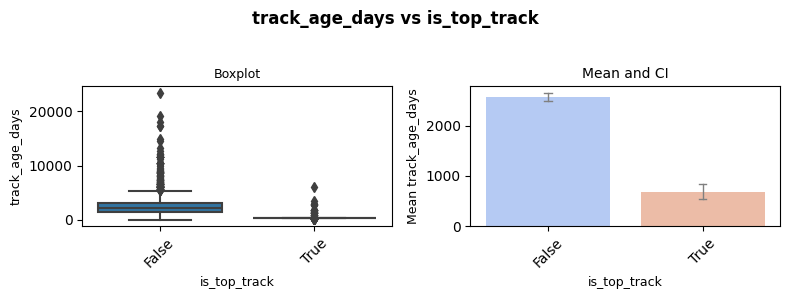

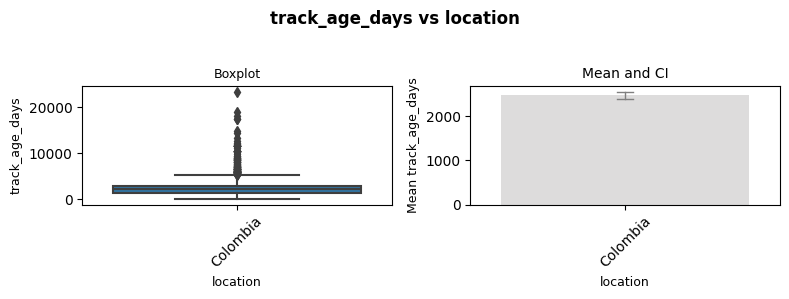

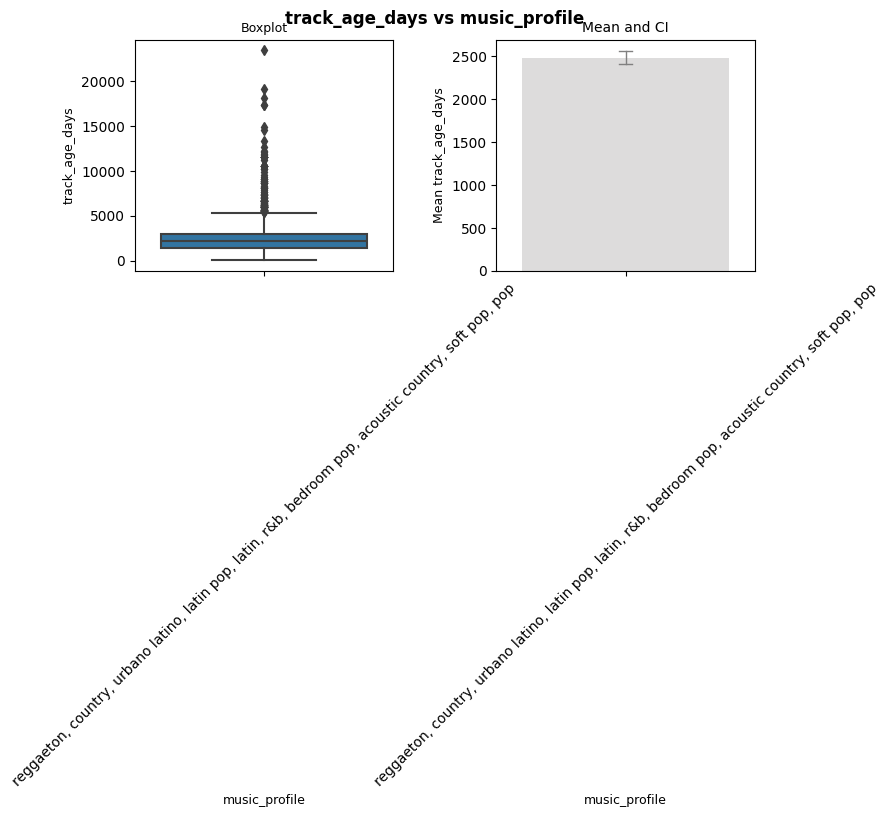

Skipping track_name (unique categories: 1886 > 10)


/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1409: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


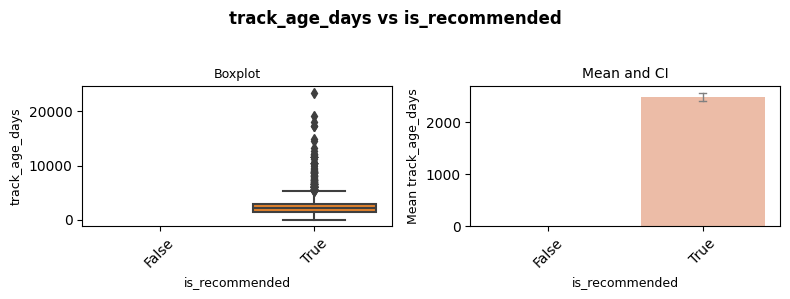

Skipping album_name (unique categories: 1326 > 10)
Skipping artist_genres (unique categories: 171 > 10)
Skipping artist_name (unique categories: 608 > 10)


/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1409: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


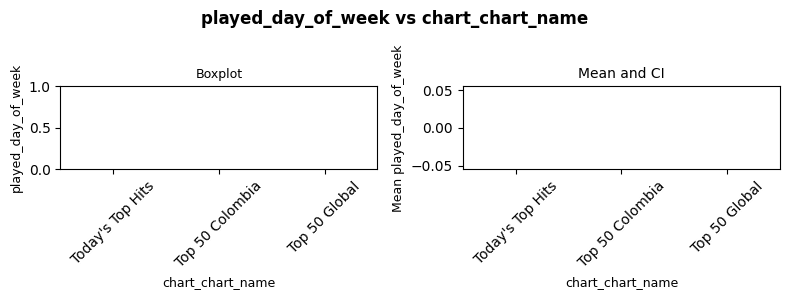

Skipping chart_genres (unique categories: 65 > 10)
Skipping chart_track_name (unique categories: 440 > 10)
Skipping chart_position (unique categories: 243 > 10)


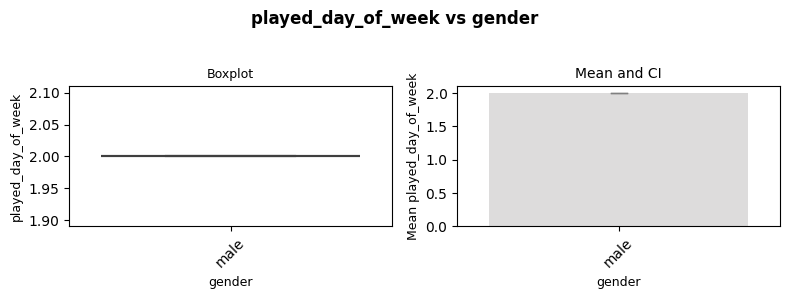

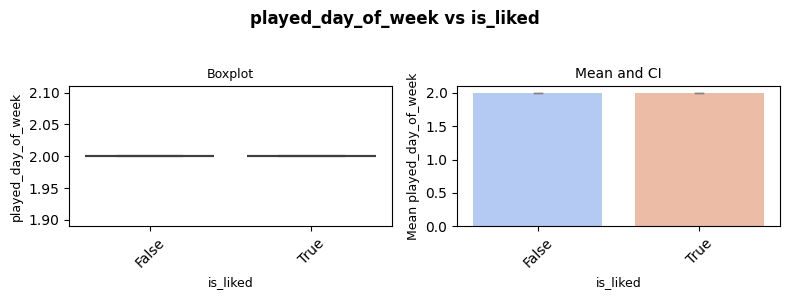

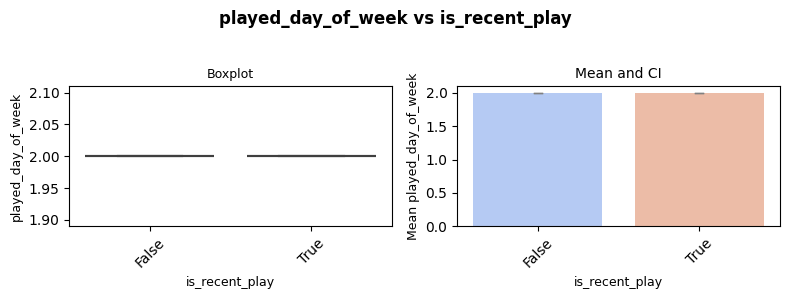

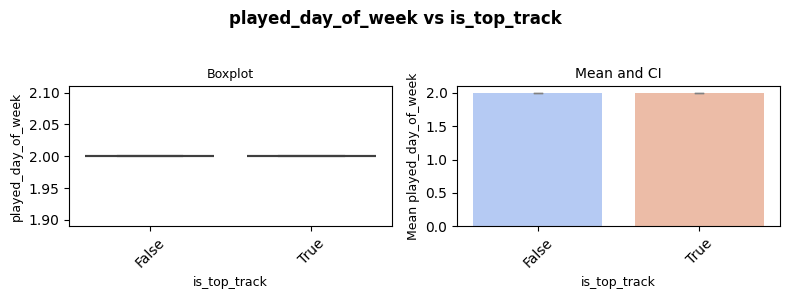

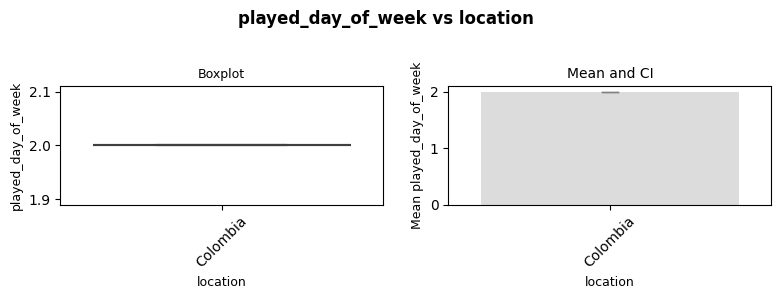

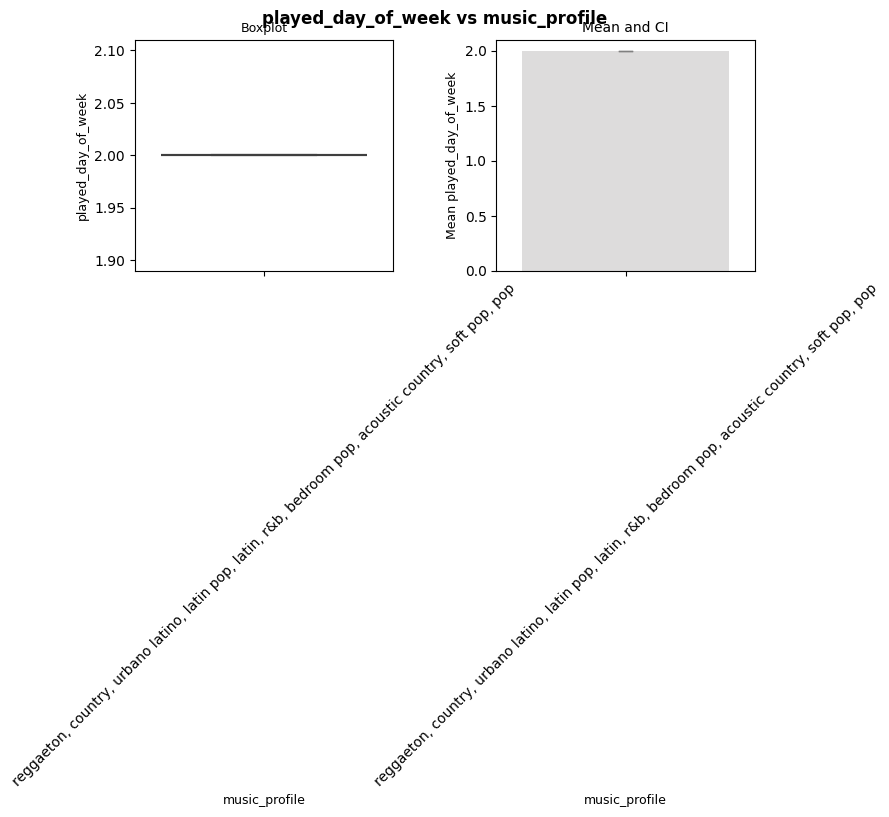

Skipping track_name (unique categories: 1886 > 10)


/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1409: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


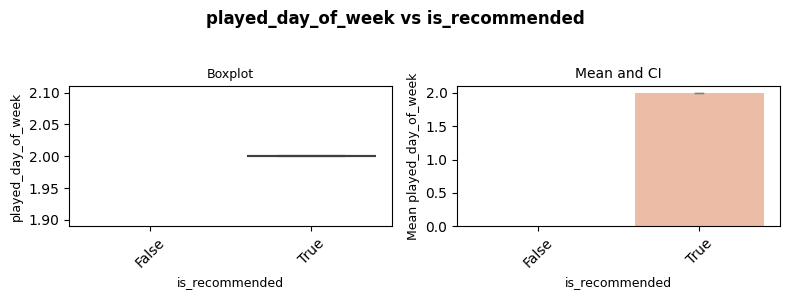

Skipping album_name (unique categories: 1326 > 10)
Skipping artist_genres (unique categories: 171 > 10)
Skipping artist_name (unique categories: 608 > 10)


/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1409: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


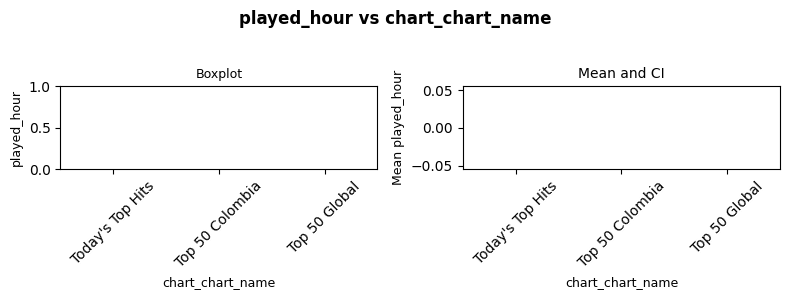

Skipping chart_genres (unique categories: 65 > 10)
Skipping chart_track_name (unique categories: 440 > 10)
Skipping chart_position (unique categories: 243 > 10)


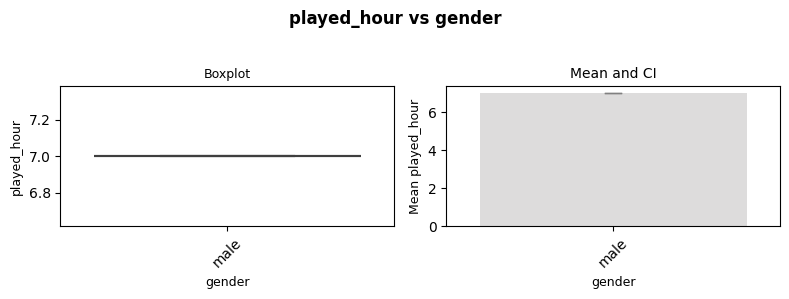

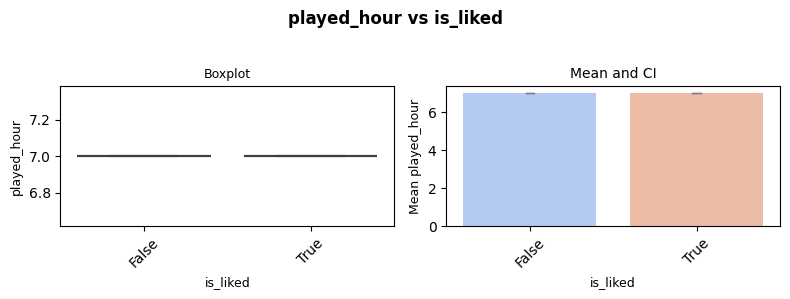

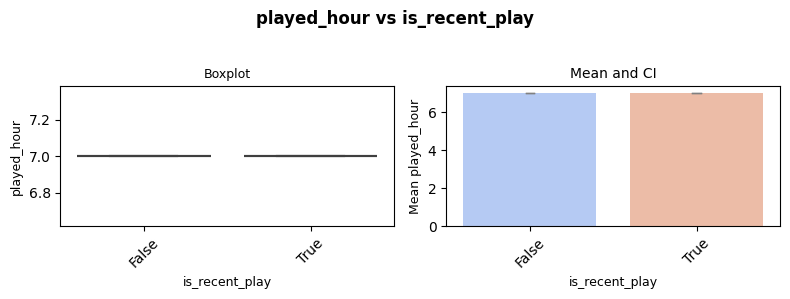

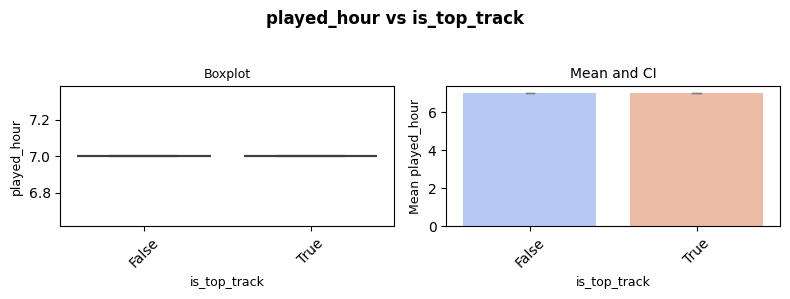

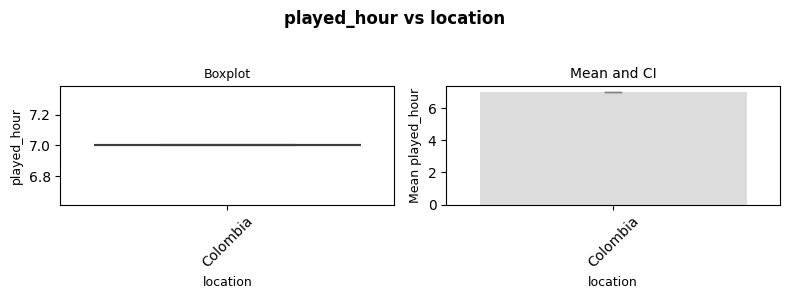

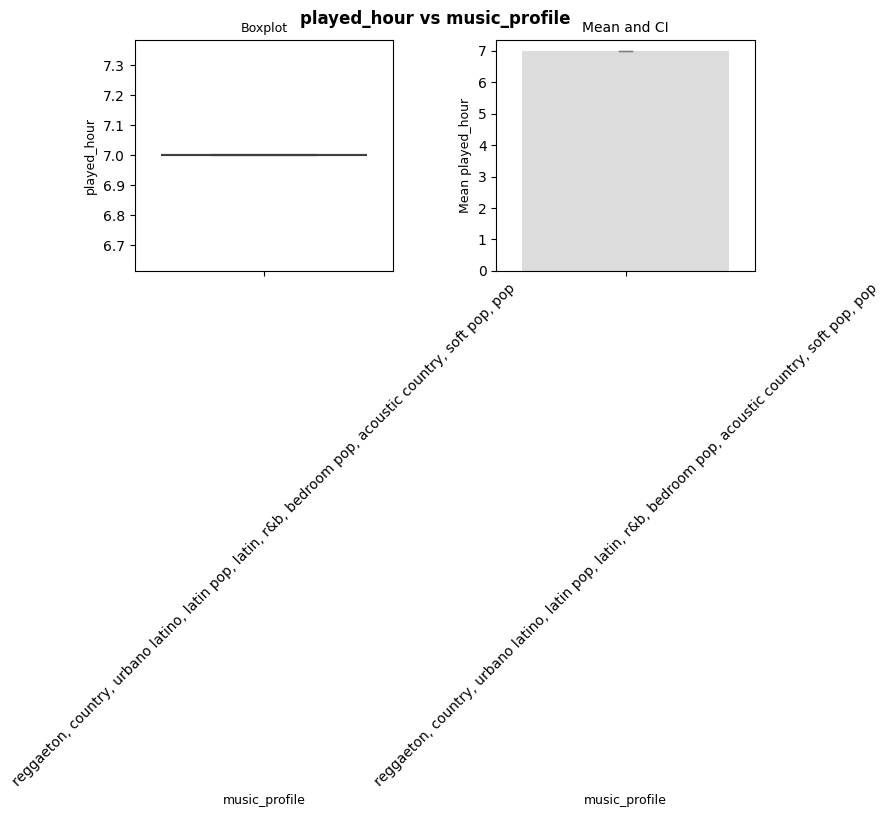

Skipping track_name (unique categories: 1886 > 10)


/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1409: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


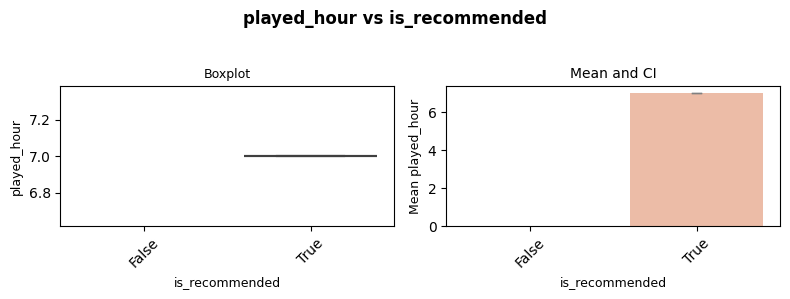

In [104]:
for num_col in numerical_columns:
    bivariate_analysis_num_vs_cat(num_col, categorical_columns)

### **6. Multivariate Analysis**


#### **Numerical vs All Numerical Variables**


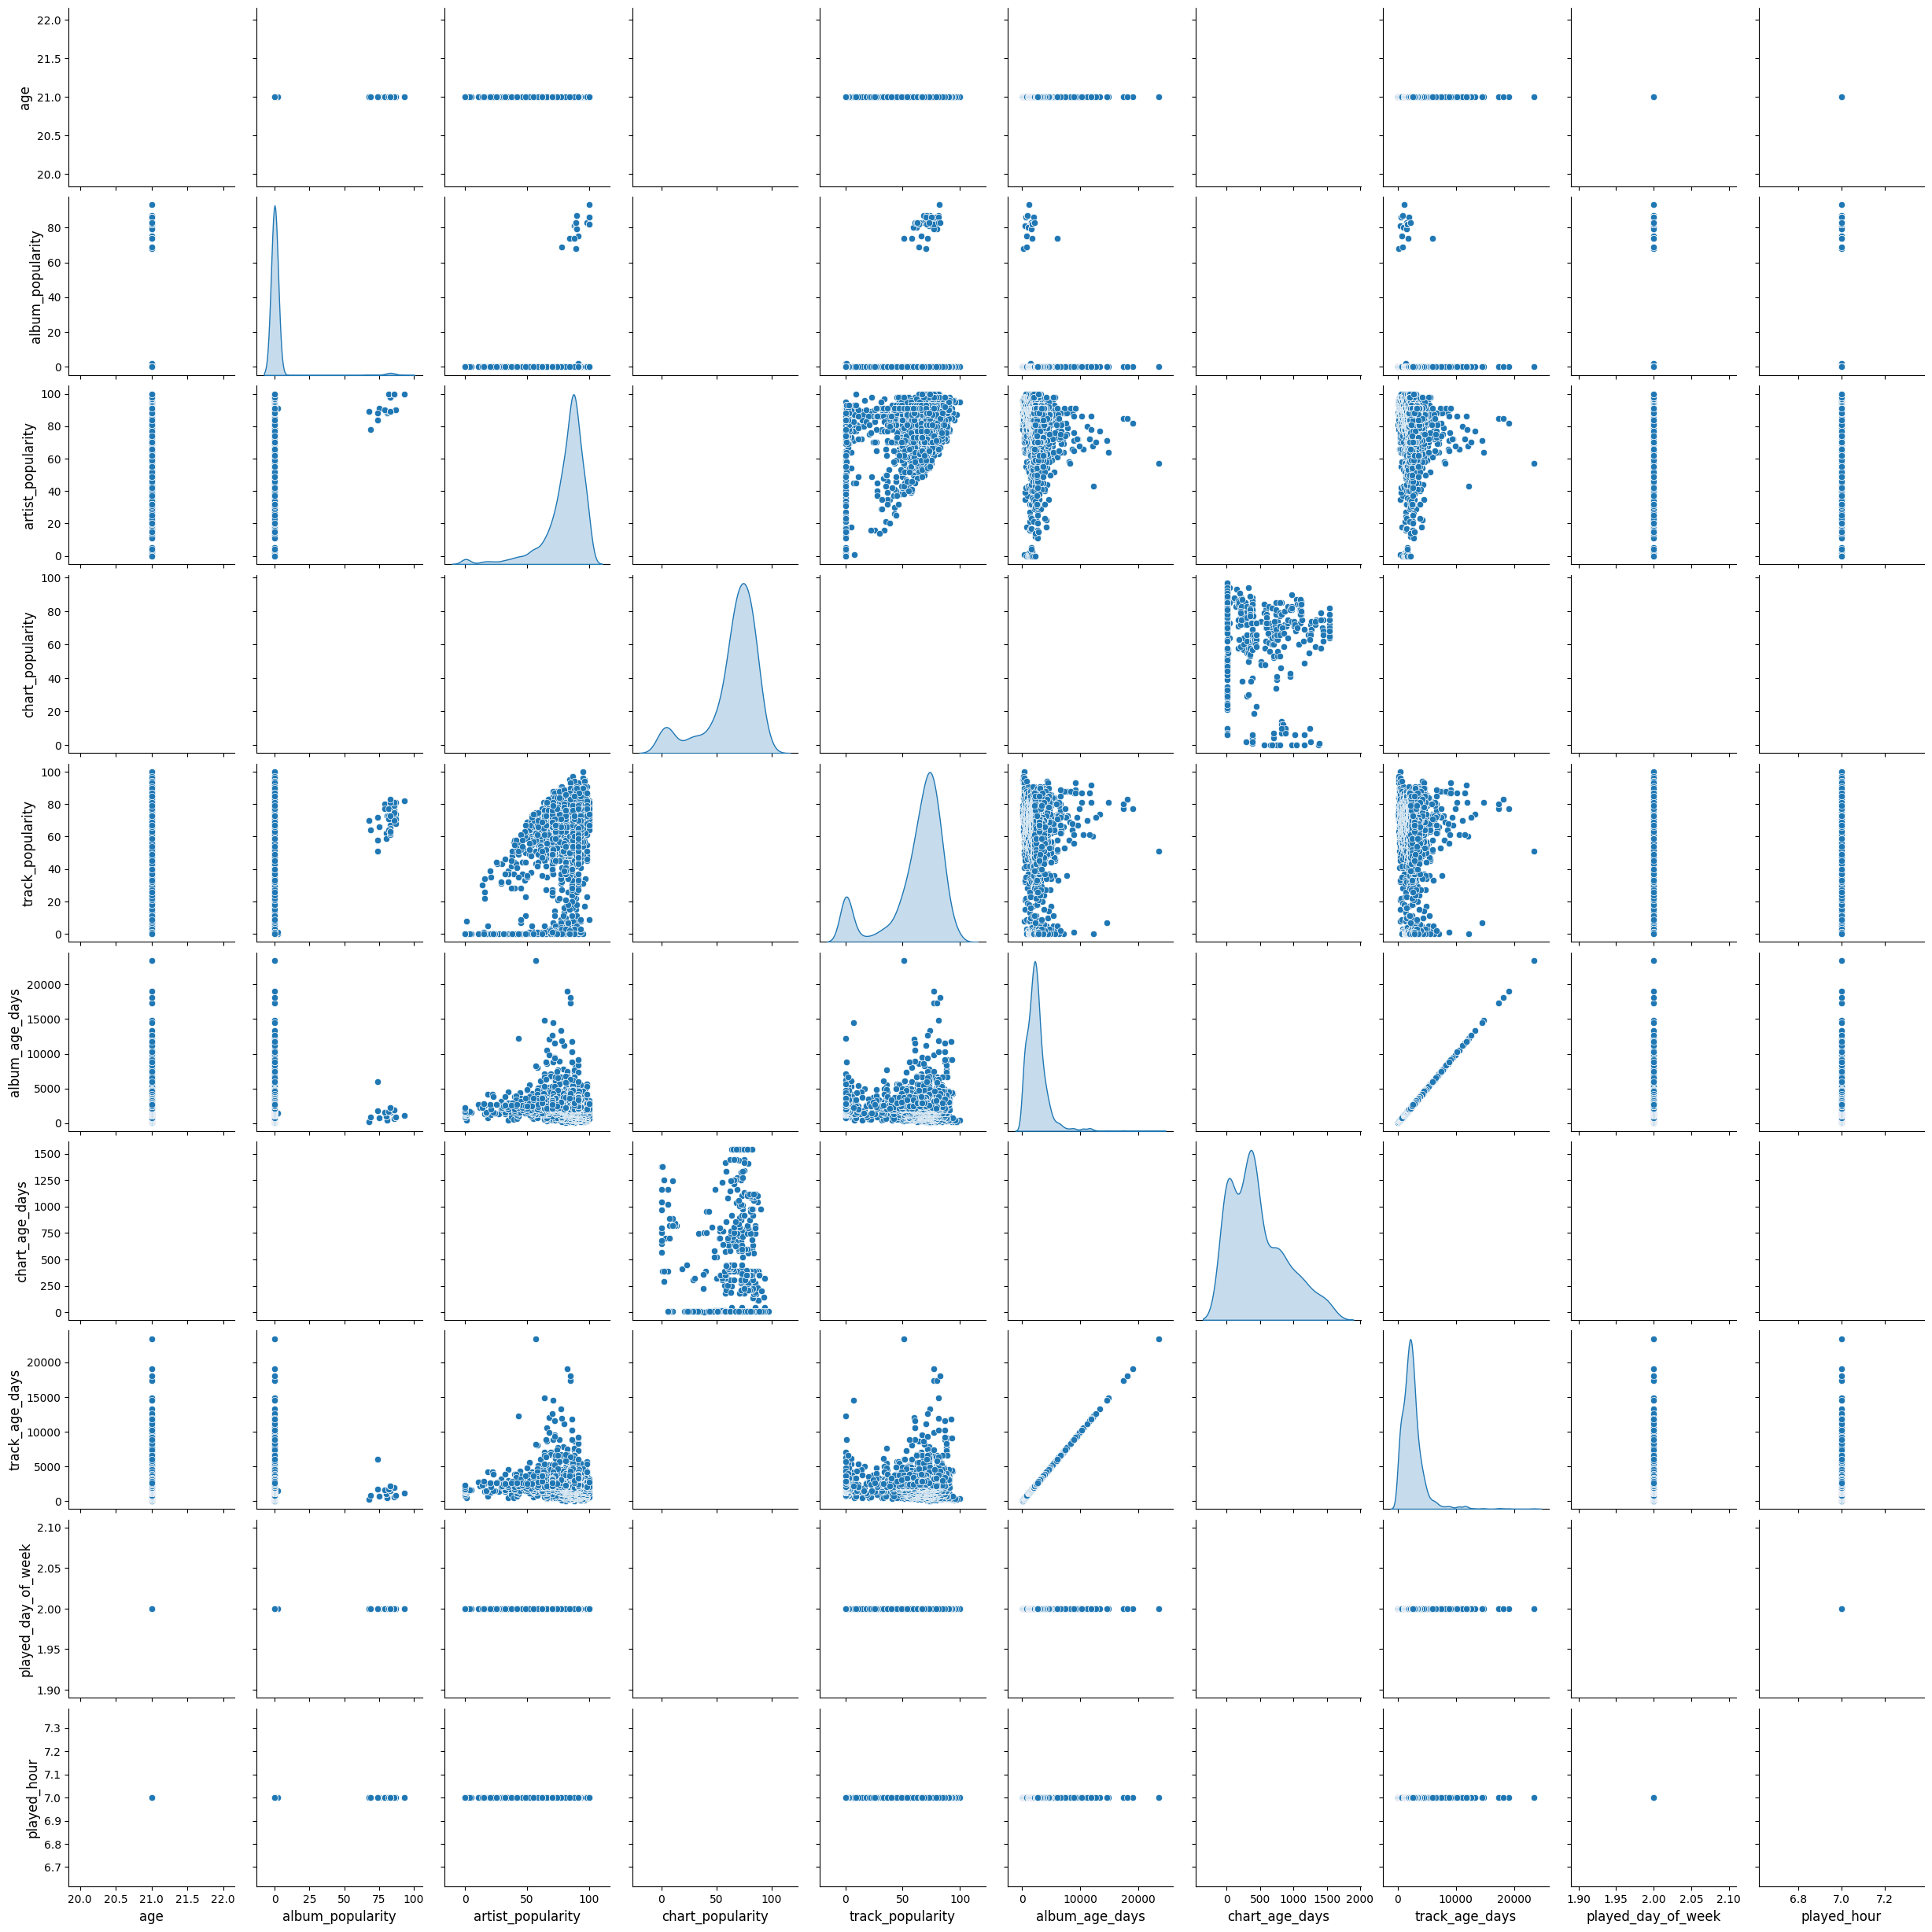

In [105]:
sns.pairplot(algorhythm_df[numerical_columns], diag_kind="kde")

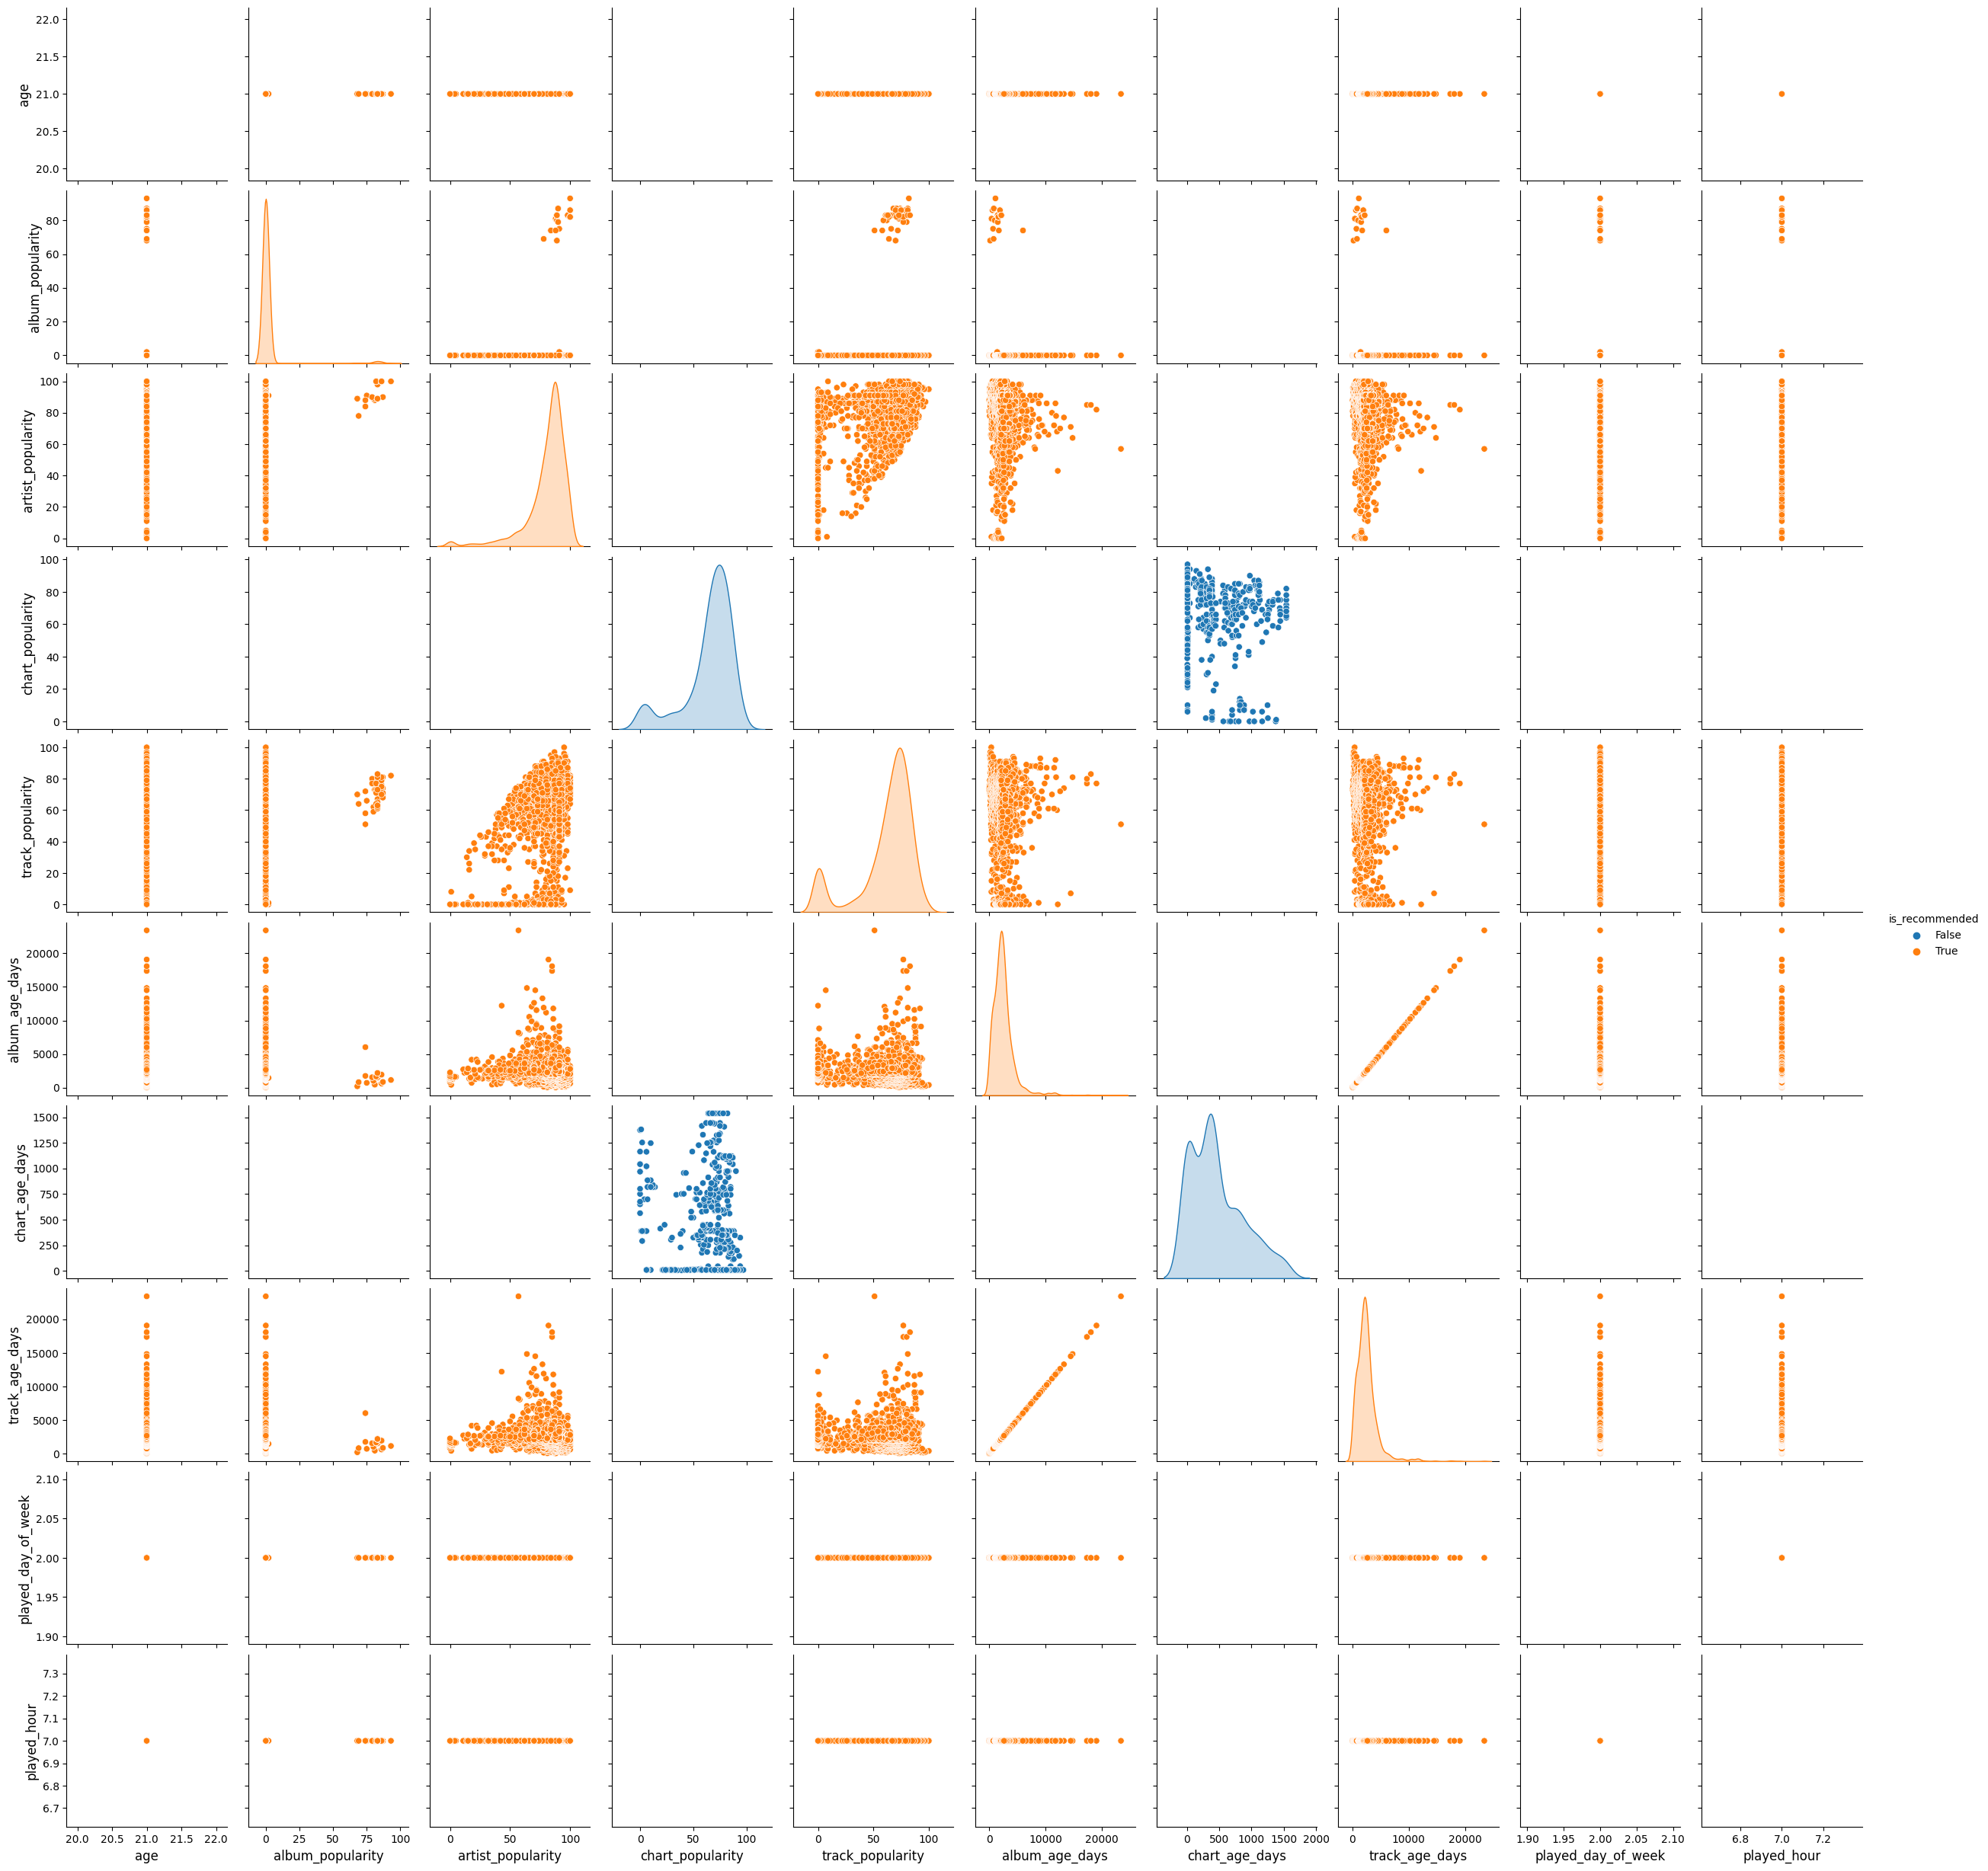

In [106]:
is_recommended = algorhythm_df[[*numerical_columns, "is_recommended"]]
sns.pairplot(is_recommended, hue="is_recommended", diag_kind="kde")

### **7. Heuristics**

Watching and analyzing the results after experimenting with the data and getting to know its correlations and tendences, I took some conclusions to make this heuristic model from the EDA analysis.


In [114]:
def algorhythm_heuristic(
    album_popularity: float,
    artist_popularity: float,
    track_popularity: float,
    is_liked: bool,
    is_top_track: bool,
    played_hour: int,
) -> int:
    """
    Simple heuristic model to predict if a track should be recommended.

    Rules based on data observations and anomalies:
    - Recommend if track popularity is high (above 70).
    - Recommend if artist popularity is high (above 70).
    - Recommend if album popularity is high (above 70).
    - Recommend if user liked the track (is_liked=True).
    - Recommend if track is among top tracks (is_top_track=True).
    - Bonus: Recommend if played during peak listening hours (18 to 23).

    Returns:
    - 1 if recommendation criteria are met.
    - 0 otherwise.
    """

    score = 0

    if track_popularity >= 70:
        score += 1
    if artist_popularity >= 70:
        score += 1
    if album_popularity >= 70:
        score += 1
    if is_liked:
        score += 2  # Higher weight for explicit user preference
    if is_top_track:
        score += 1
    if 18 <= played_hour <= 23:
        score += 1

    # Threshold: recommend if score >= 3
    return 1 if score >= 3 else 0


# Apply heuristic model on DataFrame, dropping rows with NaNs in required columns
df_heuristic = algorhythm_df.dropna(
    subset=["album_popularity", "artist_popularity", "track_popularity", "is_liked", "is_top_track", "played_hour"]
).copy()

df_heuristic["heuristic_recommendation"] = df_heuristic.apply(
    lambda row: algorhythm_heuristic(
        row["album_popularity"],
        row["artist_popularity"],
        row["track_popularity"],
        row["is_liked"],
        row["is_top_track"],
        row["played_hour"],
    ),
    axis=1
)

# Show counts of heuristic recommendations
print(df_heuristic["heuristic_recommendation"].value_counts())

heuristic_recommendation
1    1834
0     498
Name: count, dtype: int64


In [115]:
# Ground truth and prediction vectors
y_true = df_heuristic["is_recommended"]
y_pred = df_heuristic["heuristic_recommendation"]

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report with labels matching your use case
print(classification_report(y_true, y_pred, target_names=["Not Recommended", "Recommended"]))

Accuracy: 0.7864
                 precision    recall  f1-score   support

Not Recommended       0.00      0.00      0.00         0
    Recommended       1.00      0.79      0.88      2332

       accuracy                           0.79      2332
      macro avg       0.50      0.39      0.44      2332
   weighted avg       1.00      0.79      0.88      2332



The heuristic recommendation model achieves 78.6% accuracy, but the precision and recall metrics reveal an important limitation: it predicts almost exclusively the “Recommended” class, completely missing the “Not Recommended” class. This results in a recall of 79% for recommended tracks, showing it captures many true positive recommendations, but 0% recall for not recommended tracks, meaning it fails to identify tracks that should not be recommended.

This behavior indicates the heuristic is too lenient or biased towards recommending tracks, ignoring clear distinctions needed to separate the two classes well. The model’s simplicity relies mainly on popularity thresholds, user liking, top-track status, and listening time, but it lacks discriminative rules that adequately filter out less relevant tracks.


### **7. Results and conclusions**


- The target variable **is_recommended** is imbalanced, with a majority of tracks being recommended, which affects model evaluation and interpretation.

- Popularity scores (**album_popularity, artist_popularity, track_popularity**) tend to have a right-skewed distribution, indicating most tracks have moderate popularity with fewer extremely popular tracks.

- Listening behavior shows peak activity during evening hours (**played_hour** between 18 and 23), supporting the inclusion of this feature in the heuristic model.

- Most categorical features like **album_name, artist_name, and genres** have high cardinality, making direct categorical analysis and modeling more complex.

- Boolean features such as **is_liked** and **is_top_track** provide strong signals and were weighted higher in the heuristic.

- The heuristic model achieves **78.6% accuracy**, but predominantly predicts the "Recommended" class, failing to capture the "Not Recommended" tracks.

- This indicates the heuristic is biased towards recommending tracks and lacks sufficient conditions to exclude less relevant tracks, likely due to simplistic thresholding.

- Refining the heuristic to balance precision and recall, possibly by adding negative rules or lowering thresholds, could improve discrimination between classes.

- Overall, the heuristic validates key insights from the dataset but shows the need for more sophisticated, data-driven models to improve recommendation reliability and user experience.
